In [2]:
import matplotlib.pyplot as plt
import SimpleITK as sitk

from myshow import myshow, myshow3d
import os
import glob
import numpy as np

from  scipy import ndimage

from skimage.io import imread, imshow
from skimage import *
import skimage

In [3]:
dcm_list=glob.glob('../data/dvt/01013843/*.dcm')
img_T1 = sitk.ReadImage(dcm_list)
img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)

In [4]:
# testimg=dcm_list[122:]
testimg=dcm_list
timg_T1 = sitk.ReadImage(testimg)
timg_T1_255 = sitk.Cast(sitk.RescaleIntensity(timg_T1), sitk.sitkUInt8)

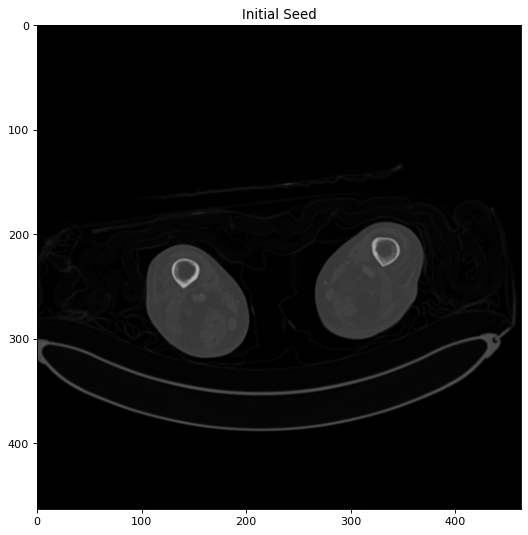

In [11]:
seed = (250,250,0)
seg = sitk.Image(timg_T1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(timg_T1)
seg[seed] = 1
# seg = sitk.BinaryDilate(seg, 3)
myshow(sitk.LabelOverlay(timg_T1_255, seg), "Initial Seed")


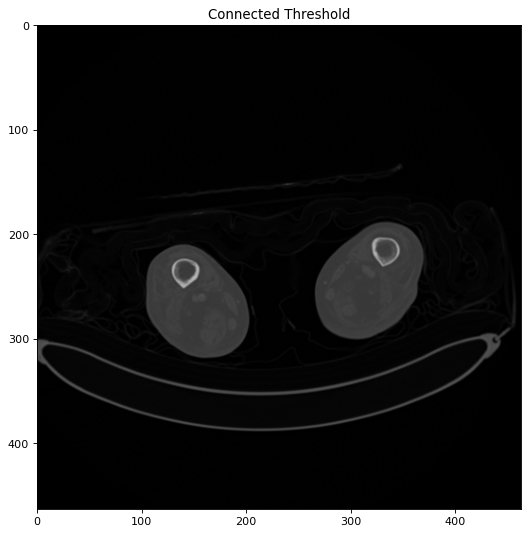

In [6]:
seg = sitk.ConnectedThreshold(timg_T1, seedList=[seed], lower=200, upper=600)

myshow(sitk.LabelOverlay(timg_T1_255, seg), "Connected Threshold")

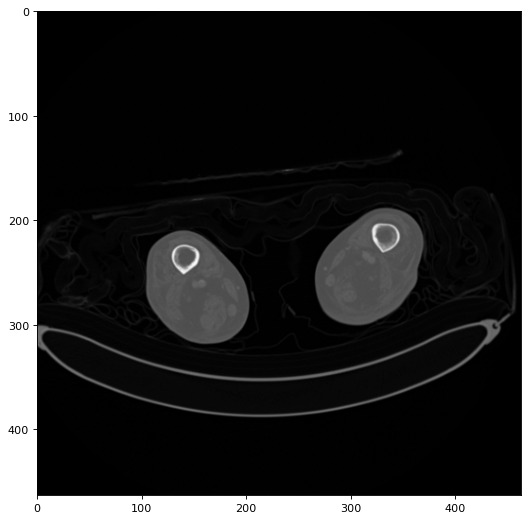

In [71]:
myshow(img_T1_255)

In [40]:
help(sitk.ConfidenceConnected)

Help on function ConfidenceConnected in module SimpleITK.SimpleITK:

ConfidenceConnected(*args, **kwargs)
    ConfidenceConnected(Image image1, VectorUIntList seedList=std::vector< std::vector< unsigned int > >(), unsigned int numberOfIterations=4, double multiplier=4.5, unsigned int initialNeighborhoodRadius=1, uint8_t replaceValue=1) -> Image



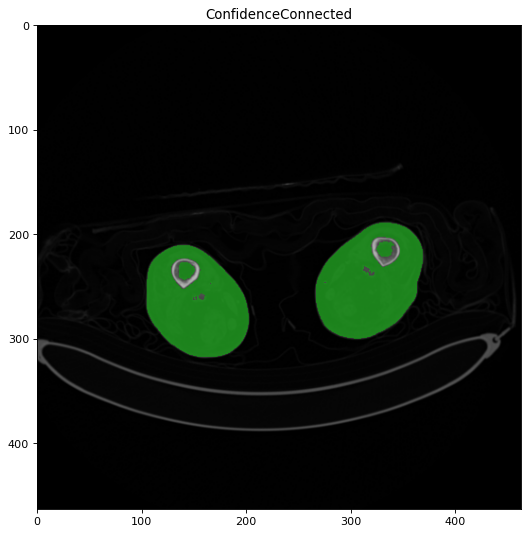

In [12]:
seg = sitk.ConfidenceConnected(timg_T1, seedList=[seed],
                                   numberOfIterations=4,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)

myshow(sitk.LabelOverlay(timg_T1_255, seg), "ConfidenceConnected")


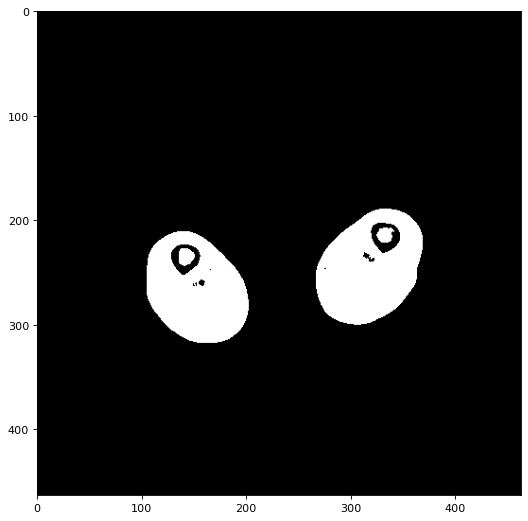

In [13]:
myshow(seg)

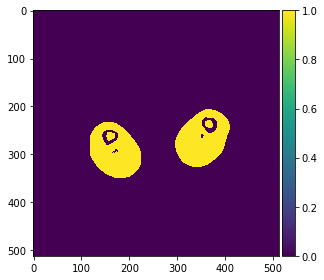

In [16]:
imgData = sitk.GetArrayFromImage(seg)
hole=ndimage.binary_fill_holes(imgData).astype(int)
imshow(hole[125])

In [159]:
print(type(hole), hole[0])

<class 'numpy.ndarray'> [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


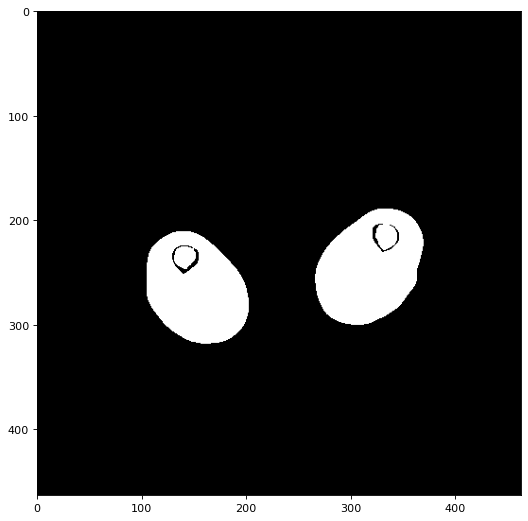

In [159]:
myshow3d(seg, xslices=[], yslices=[], zslices=[], title=None, margin=0.05, dpi=80)

In [130]:
print(len(hole), len(imgData))

123 123 Image (000001B6DB870760)
  RTTI typeinfo:   class itk::Image<unsigned char,3>
  Reference Count: 1
  Modified Time: 1231256
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1231186
  UpdateMTime: 1231255
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 123]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 123]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 123]
  Spacing: [0.904297, 0.904297, 5]
  Origin: [-215.048, -349.048, 625.5]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.904297 0 0
0 0.904297 0
0 0 5

  PointToIndexMatrix: 
1.10583 0 0
0 1.10583 0
0 0 0.2

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (000001B6DE3A3C50)
      RTTI typeinfo:   class itk::ImportImage

In [145]:
imgA=sitk.GetImageFromArray(hole[0], isVector=True)
# print(len(imgA))
# myshow(imgA)

In [192]:
from skimage import measure

In [195]:
help(measure.find_contours)

Help on function find_contours in module skimage.measure._find_contours:

find_contours(array, level, fully_connected='low', positive_orientation='low', *, mask=None)
    Find iso-valued contours in a 2D array for a given level value.
    
    Uses the "marching squares" method to compute a the iso-valued contours of
    the input 2D array for a particular level value. Array values are linearly
    interpolated to provide better precision for the output contours.
    
    Parameters
    ----------
    array : 2D ndarray of double
        Input data in which to find contours.
    level : float
        Value along which to find contours in the array.
    fully_connected : str, {'low', 'high'}
         Indicates whether array elements below the given level value are to be
         considered fully-connected (and hence elements above the value will
         only be face connected), or vice-versa. (See notes below for details.)
    positive_orientation : either 'low' or 'high'
         Indi

In [215]:
import scipy
from scipy.misc import toimage

ImportError: cannot import name 'toimage'

In [214]:
rgb = misc.toimage(imgData)

AttributeError: module 'scipy.misc' has no attribute 'toimage'

In [203]:
measure.find_contours(imgData[0], 0.0, fully_connected='low',positive_orientation='low')

[array([[332., 347.],
        [332., 346.],
        [332., 345.],
        [332., 344.],
        [332., 343.],
        [332., 342.],
        [332., 341.],
        [332., 340.],
        [332., 339.],
        [332., 338.],
        [332., 337.],
        [332., 336.],
        [332., 335.],
        [332., 334.],
        [332., 333.],
        [332., 332.],
        [332., 331.],
        [332., 330.],
        [332., 329.],
        [331., 328.],
        [331., 327.],
        [331., 326.],
        [331., 325.],
        [331., 324.],
        [330., 323.],
        [330., 322.],
        [330., 321.],
        [329., 320.],
        [329., 319.],
        [329., 318.],
        [328., 317.],
        [328., 316.],
        [327., 315.],
        [327., 314.],
        [326., 313.],
        [326., 312.],
        [325., 311.],
        [324., 310.],
        [324., 309.],
        [323., 308.],
        [322., 307.],
        [321., 306.],
        [320., 305.],
        [319., 304.],
        [318., 303.],
        [3

In [149]:
print(hole[0])
print(imgA.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


AttributeError: 'Image' object has no attribute 'shape'

In [174]:
print(hole[0][hole[0]!=1 and hole[0]!=0])
# print(hole[0][hole[0]!=0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [152]:
cv2.imread(imgA,1)

SystemError: <built-in function imread> returned NULL without setting an error

In [14]:
from scipy import ndimage
import cv2

In [17]:
im= ndimage.find_objects(hole[1]==1)

print(im[0])


(slice(133, 363, None), slice(61, 437, None))


In [55]:
print(hole[123].min(), hole[123].max())

0 1


In [99]:
for tn in range (len(hole)):
    io.imsave('./test/'+str(tn)+'.jpg', hole[tn])

C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:2: UserWarning: ./test/0.jpg is a low contrast image
  
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:2: UserWarning: ./test/1.jpg is a low contrast image
  
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:2: UserWarning: ./test/2.jpg is a low contrast image
  
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:2: UserWarning: ./test/3.jpg is a low contrast image
  
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warni

In [ ]:
rgb = scipy.misc.toimage(hole[0])

In [18]:
from PIL import Image
import numpy as np

# w, h = 512, 512
# data = np.zeros((h, w, 3), dtype=np.uint8)
# data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
imgA_1 = Image.fromarray(hole[0], 'RGB')
# img.save('my.png')
# img.show()

In [205]:
measure.find_contours(imgA_1, 0.0, fully_connected='low',positive_orientation='low')

AttributeError: 'Image' object has no attribute 'shape'

In [19]:
print(imgA_1)
print(hole[0].shape)
print(np.expand_dims(hole[0], axis=2).shape)

<PIL.Image.Image image mode=RGB size=512x512 at 0x21F300C2128>
(512, 512)
(512, 512, 1)


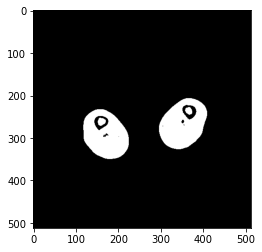

In [24]:
seg = sitk.ConfidenceConnected(img_T1, seedList=[seed],
                                   numberOfIterations=4,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
sss=sitk.GetArrayFromImage(seg)
plt.imshow(sss[125])
# cv2.rectangle(sss[125], (61,133), (437,363), (255, 0, 0), 1)

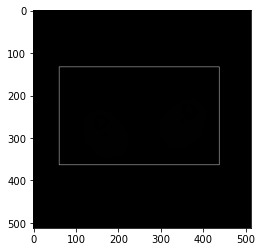

In [31]:
plt.imshow(sss[125])

In [30]:
cv2.rectangle(sss[125],(61,133), (437,363), (255, 255, 255), 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
img = cv2.imread('seg_test.jpg')

gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray1)
img1 = img.copy()

ret, thresh = cv2.threshold(gray1,127,255,0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print('length of contours:',len(contours))
areas=[]
conloc=[]

legs=[]
for cnt in range(len(contours)):    
    area=cv2.contourArea(contours[cnt])
    areas.append(area)
    conloc.append(contours[cnt])

legs.append(areas.index(max(areas)))
print(areas, 'max:' ,max(areas))            
sec=areas[0]
for fsec in range(1, len(conloc)):
#     print(conloc[fsec])
    if len(conloc)==0 or len(conloc)==1:
        print('check file')
    
    else:
        if areas[fsec]>sec and areas[fsec]< max(areas):
                print('area[fsec]:', areas[fsec])
                sec=areas[fsec]
legs.append(areas.index(sec))
    
        
print(leg1, leg2)
    
for tc in range(len(legs)):
    x, y, w, h = cv2.boundingRect(contours[legs[tc]])
    print(x, y, w, h)

    dd=cv2.rectangle(img1,(x,y),(x+w,y+h), (0, 255, 0), 1)

plt.figure(figsize=(20,20))
plt.imshow(img1, cmap='gray')


In [244]:
img = cv2.imread('seg_test.jpg')
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray1,127,255,0)

print(img.shape)
print(gray1.shape)
print('\n\n')
print(ret)
print('\n\n')
print(thresh.shape)

print(thresh.dtype, hole[0].dtype)

print(hole[0].astype(np.uint8).dtype)

(512, 512, 3)
(512, 512)



127.0



(512, 512)
uint8 int32
uint8


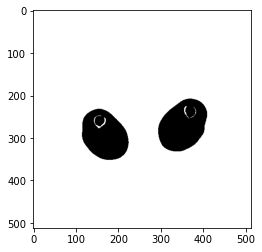

In [248]:
gray = hole[0].astype(np.uint8) 
gray += 1
gray[gray==2] = 0

plt.imshow(gray, cmap='gray')

24
115 232 110 120
146 251 26 28
142 250 7 20
147 249 3 3
148 248 4 3
151 247 10 3
294 208 115 124
365 253 3 3
364 252 3 3
369 251 4 3
363 251 3 3
371 250 4 3
373 248 5 4
376 247 3 3
360 247 5 6
377 246 3 3
378 245 3 3
379 243 3 4
380 232 4 13
379 230 3 4
378 229 3 3
377 228 3 3
376 227 3 3
354 225 8 24


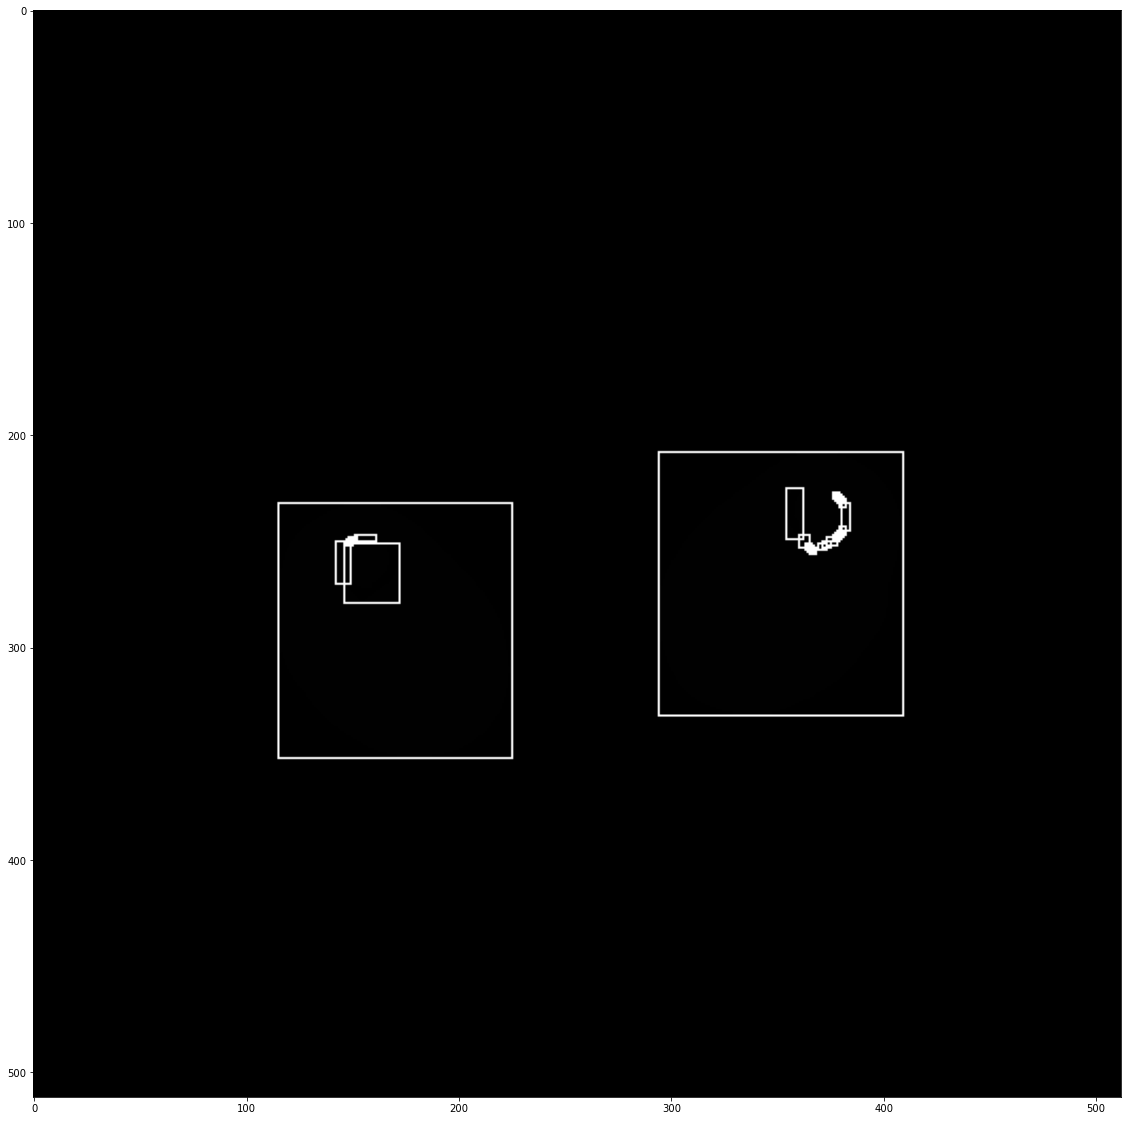

In [274]:
# img = cv2.imread(imgA_1,1)
# img = cv2.imread(imgA)

gray = hole[0].astype(np.uint8) 
gray += 1
gray[gray==2] = 0

img = hole[0].astype(np.uint8) 

#gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.uint8(img)
# img1 = img.copy()

#ret, thresh = cv2.threshold(gray,127,255,0)

contours, hierachy = cv2.findContours(gray, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

for tc in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[tc])
    print(x, y, w, h)

    dd=cv2.rectangle(img,(x,y),(x+w,y+h), (255, 0, 0), 1)
# for cnt in range(len(contours)):
#     cv2.drawContours(img1, [contours[cnt]], 0,(255,0,0), 1)

plt.figure(figsize=(20,20))
plt.imshow(gray, cmap='gray')

In [188]:
# img = cv2.imread(imgA_1,1)
# img = cv2.imread(imgA)
img=imgA_1

# gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(imgA)
# img1 = img.copy()

ret, thresh = cv2.threshold(gray,127,255,0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

for tc in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[tc])
    print(x, y, w, h)

    dd=cv2.rectangle(gray,(x,y),(x+w,y+h), (0, 255, 0), 1)
# for cnt in range(len(contours)):
#     cv2.drawContours(img1, [contours[cnt]], 0,(255,0,0), 1)

plt.figure(figsize=(20,20))
plt.imshow(gray, cmap='gray')

error: OpenCV(4.4.0) ..\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [207]:
# img_list=sorted(glob.glob('../data/img_default/01013843/*.png'))
# cvtest = sitk.ConnectedThreshold(img_list, seedList=[seed], lower=200, upper=600)

TypeError: in method 'ConnectedThreshold', argument 1 of type 'itk::simple::Image const &'

length of contours: 10
[5.0, 23.5, 58.5, 21871.5, 2.0, 4.0, 2.0, 2.0, 2.0, 21934.0] max: 21934.0
area[fsec]: 23.5
area[fsec]: 58.5
area[fsec]: 21871.5
[9] [3]
251 190 185 152
64 196 182 149


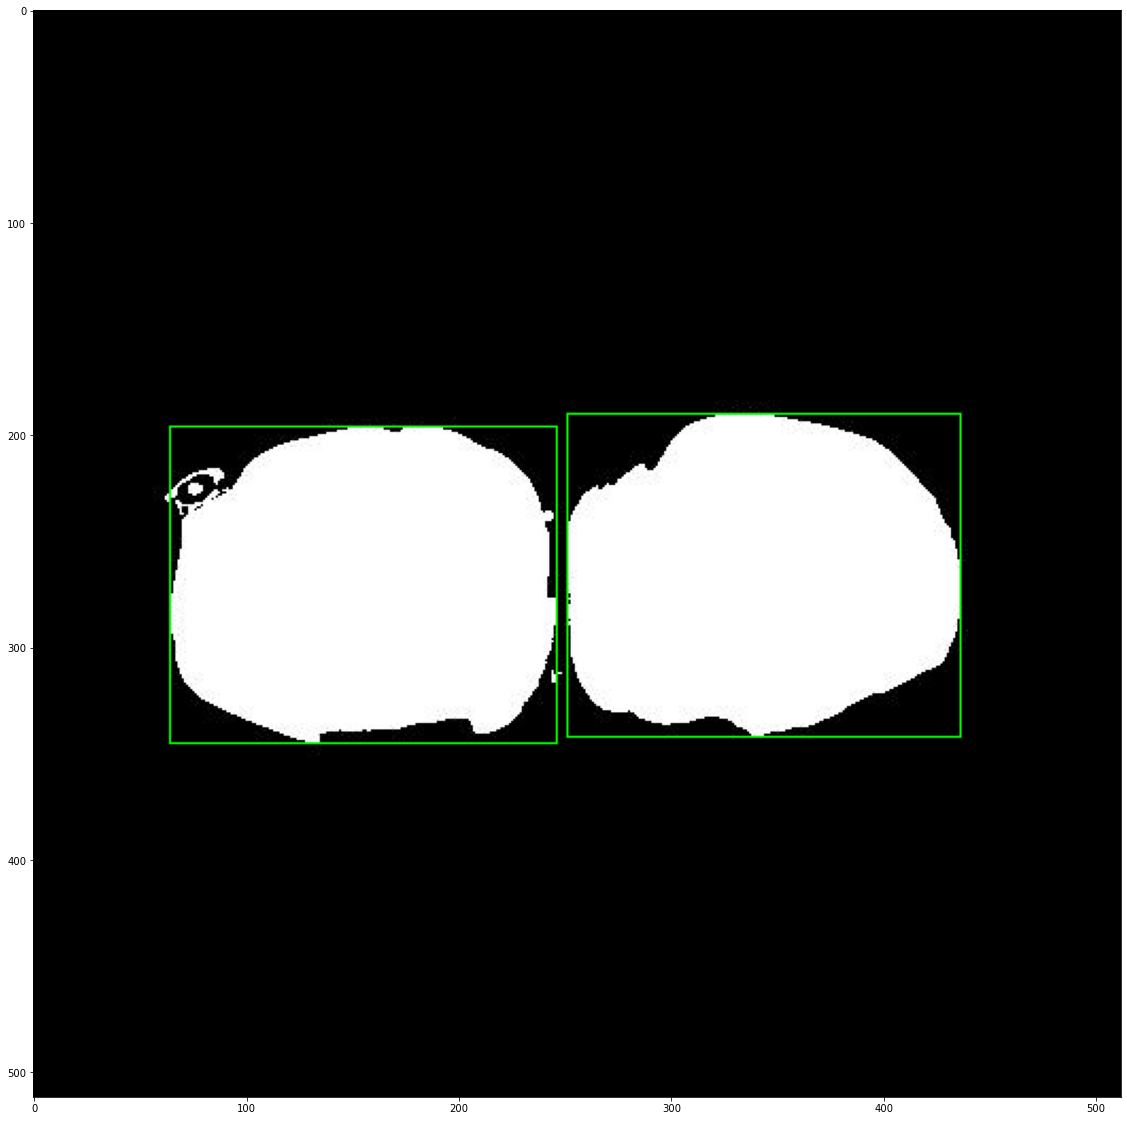

In [121]:
#########cv2 area로 다리2개 좌표 찾기
img = cv2.imread('seg_test.jpg')

gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray1)
img1 = img.copy()

ret, thresh = cv2.threshold(gray1,127,255,0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print('length of contours:',len(contours))
areas=[]
conloc=[]

legs=[]
for cnt in range(len(contours)):    
    area=cv2.contourArea(contours[cnt])
    areas.append(area)
    conloc.append(contours[cnt])

legs.append(areas.index(max(areas)))
print(areas, 'max:' ,max(areas))            
sec=areas[0]
for fsec in range(1, len(conloc)):
#     print(conloc[fsec])
    if len(conloc)==0 or len(conloc)==1:
        print('check file')
    
    else:
        if areas[fsec]>sec and areas[fsec]< max(areas):
                print('area[fsec]:', areas[fsec])
                sec=areas[fsec]
legs.append(areas.index(sec))
    
        
print(leg1, leg2)
    
for tc in range(len(legs)):
    x, y, w, h = cv2.boundingRect(contours[legs[tc]])
    print(x, y, w, h)

    dd=cv2.rectangle(img1,(x,y),(x+w,y+h), (0, 255, 0), 1)

plt.figure(figsize=(20,20))
plt.imshow(img1, cmap='gray')




In [173]:
# mask = im > im.mean()

label_im, nb_labels = ndimage.label(mask)

# Find the largest connected component
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mask_size = sizes < 1000
remove_pixel = mask_size[label_im]
label_im[remove_pixel] = 0
labels = np.unique(label_im)
label_im = np.searchsorted(labels, label_im)

# Now that we have only one connected component, extract it's bounding box
slice_x, slice_y = ndimage.find_objects(label_im==4)[0]
roi = im[slice_x, slice_y]

plt.figure(figsize=(4, 2))
plt.axes([0, 0, 1, 1])
plt.imshow(roi)
plt.axis('off')

plt.show()

NameError: name 'mask' is not defined

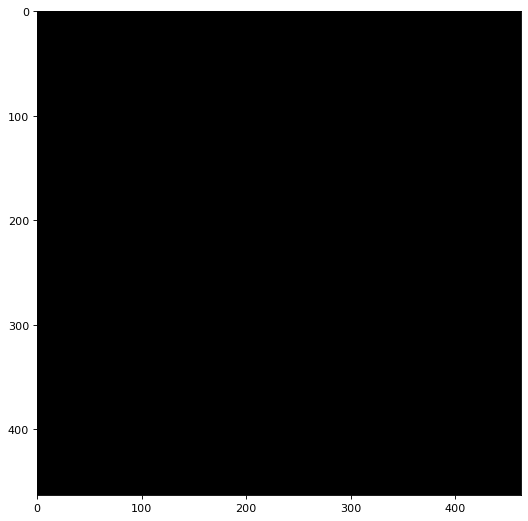

In [38]:
# Load Image
img = sitk.ReadImage(dcm_list)
imgData = sitk.GetArrayFromImage(img)
# Find a seed point
tarZ = imgData.shape[0]/2
print(tarZ)
imgSubData = imgData[int(tarZ), :, :] # numpy indexing (z, y, x)
idx = np.argmax(imgSubData)
idx = np.unravel_index(idx, imgSubData.shape)
maxIdx = tuple((idx[1],idx[0],tarZ))
# Region Growing
seg = sitk.ConnectedThreshold(img, seedList=[(140,290,111)], lower=40, upper=80)
# Cleaning
closing = sitk.BinaryMorphologicalClosingImageFilter()
closing.SetForegroundValue(1)
closing.SetKernelRadius(1)
seg = closing.Execute(seg)

myshow3d(seg)

In [57]:
help(sitk.BinaryThresholdImageFilter().Execute)

Help on method Execute in module SimpleITK.SimpleITK:

Execute(image1) method of SimpleITK.SimpleITK.BinaryThresholdImageFilter instance
    Execute(BinaryThresholdImageFilter self, Image image1) -> Image



In [24]:
def RemoveUnconnectedSmallObject(inputFile):
    img = sitk.ReadImage(inputFile)
    # Classify connected objects in binary mask
    cc = sitk.ConnectedComponent(img>0)
    # Calculate volume, size, bounding box, and min/max values of each object
    stats = sitk.LabelIntensityStatisticsImageFilter()
    stats.Execute(cc,img)
    # Find the label for the largest object
    maxLabel = 0
    maxSize = 0
    for l in stats.GetLabels():
        if maxSize < stats.GetPhysicalSize(l):
            maxLabel = l
            maxSize = stats.GetPhysicalSize(l)
    # Remove smaller objects by thresholding
    threshold = sitk.BinaryThresholdImageFilter()
#     img = threshold.Execute(cc, maxLabel, maxLabel, 1, 0)
    img = threshold.Execute(cc)
#     sitk.WriteImage(img, inputFile)
    myshow3d(img)

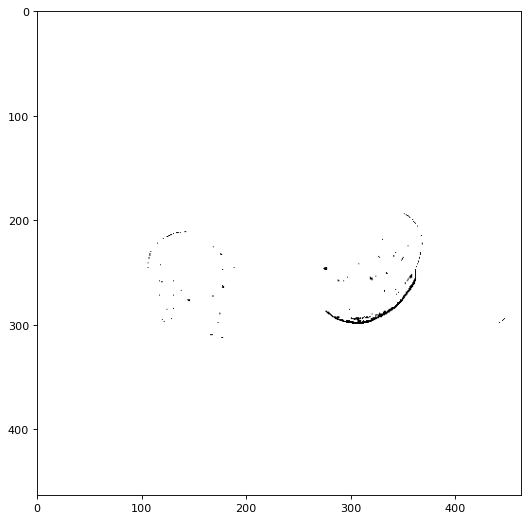

In [25]:
RemoveUnconnectedSmallObject(dcm_list)

In [92]:
def win_scale(data, wl, ww, dtype, out_range):
    """
    Scale pixel intensity data using specified window level, width, and intensity range.
    """
    
    data_new = np.empty(data.shape, dtype=np.double)
    data_new.fill(out_range[1]-1)
    
    data_new[data <= (wl-ww/2.0)] = out_range[0]
    
    data_new[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))] = ((data[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))]-(wl-0.5))/(ww-1.0)+0.5)*(out_range[1]-out_range[0])+out_range[0]
    
    data_new[data > (wl+ww/2.0)] = out_range[1]-1
    
    return data_new.astype(dtype)

In [101]:
# timg=img = sitk.ReadImage('../data/img_default/01013843/01013843_0068.png')
timg=img = sitk.ReadImage(img_list)
imgData = sitk.GetArrayFromImage(timg)

# print(imgData)
for iD in range(len(imgData)):
    
#     dcm_scaled = win_scale(timg, 60, 400, np.uint8, (0, 255))
    
    imgData[imgData>125]=255


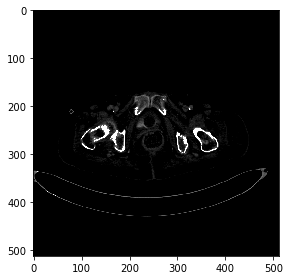

In [102]:
imshow(imgData[67])

In [85]:
reader = sitk.ImageSeriesReader()
filenamesDICOM = reader.GetGDCMSeriesFileNames()
reader.SetFileNames(filenamesDICOM)
imgOriginal = reader.Execute()

RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_Execute: D:\a\1\work\Code\IO\src\sitkImageSeriesReader.cxx:129:
sitk::ERROR: File names information is empty. Cannot read series.

In [105]:
img_nd= np.ndarray((len(img_list),512,512), dtype=float)

In [108]:
print(len(img_nd))

print(img_nd[0])


56
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


(56, 512, 512)


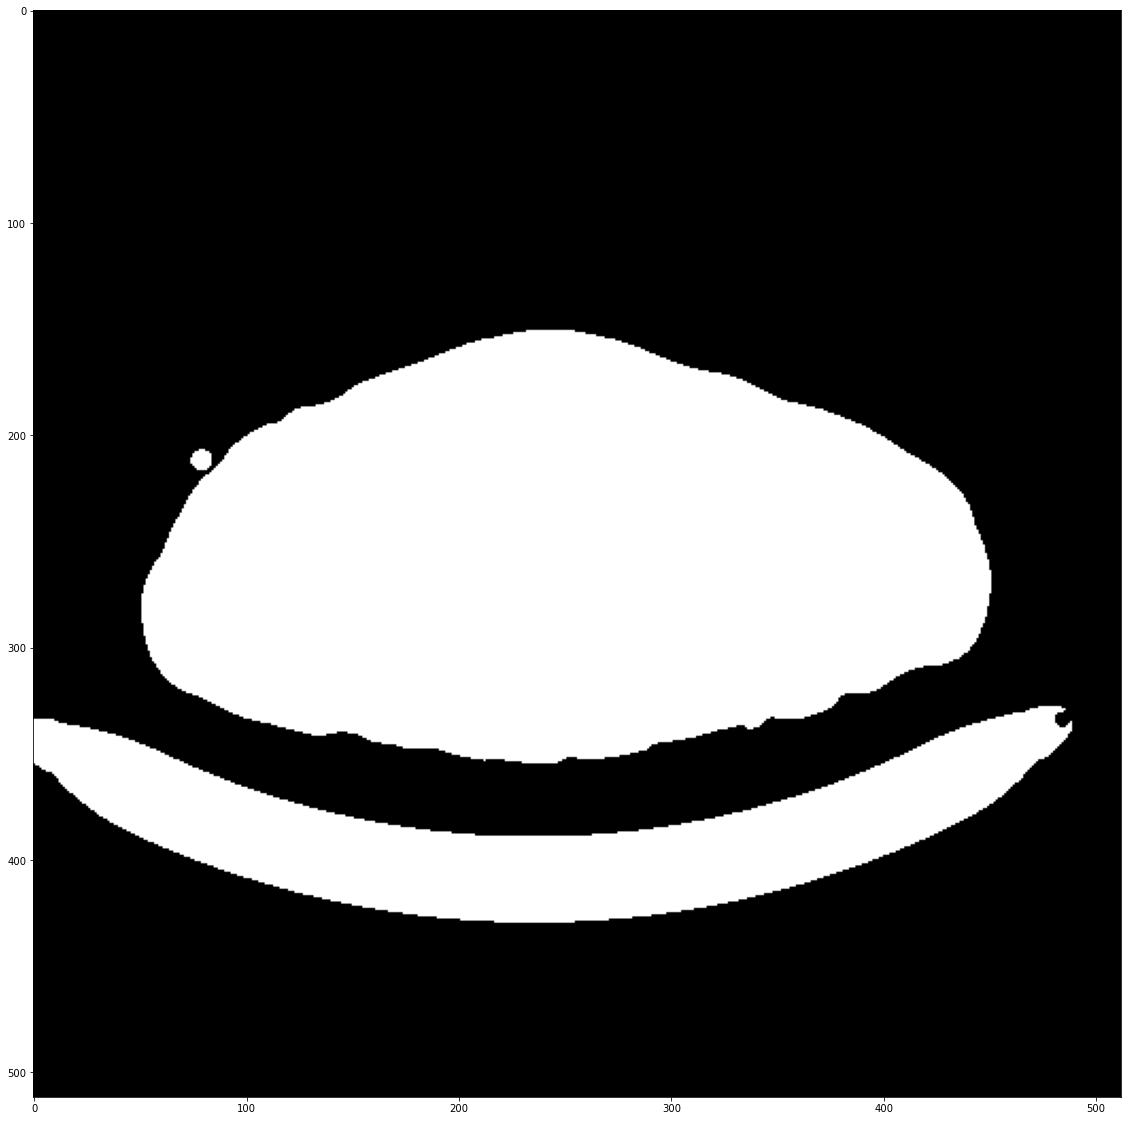

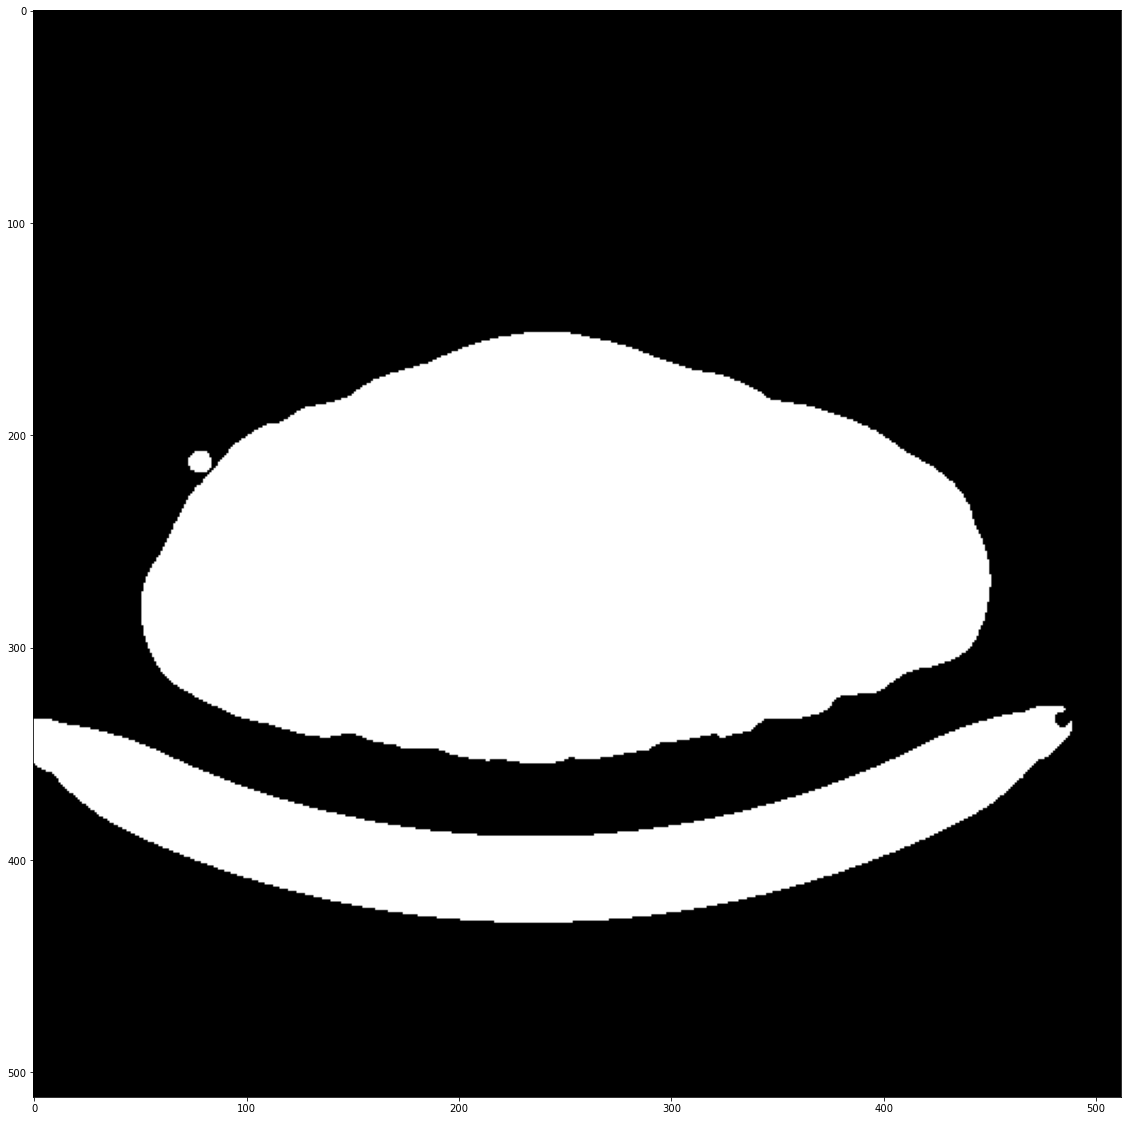

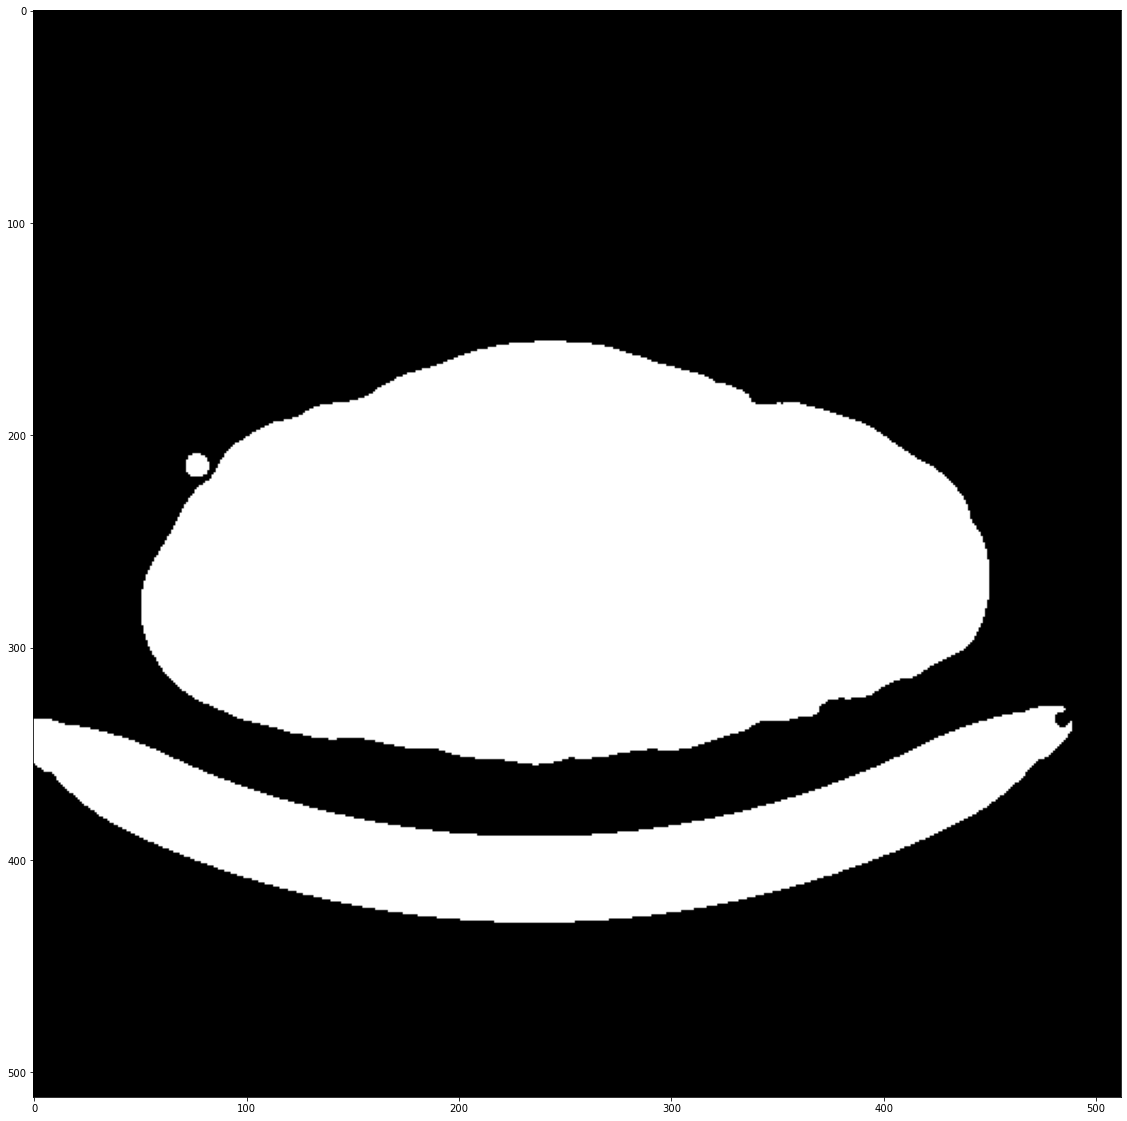

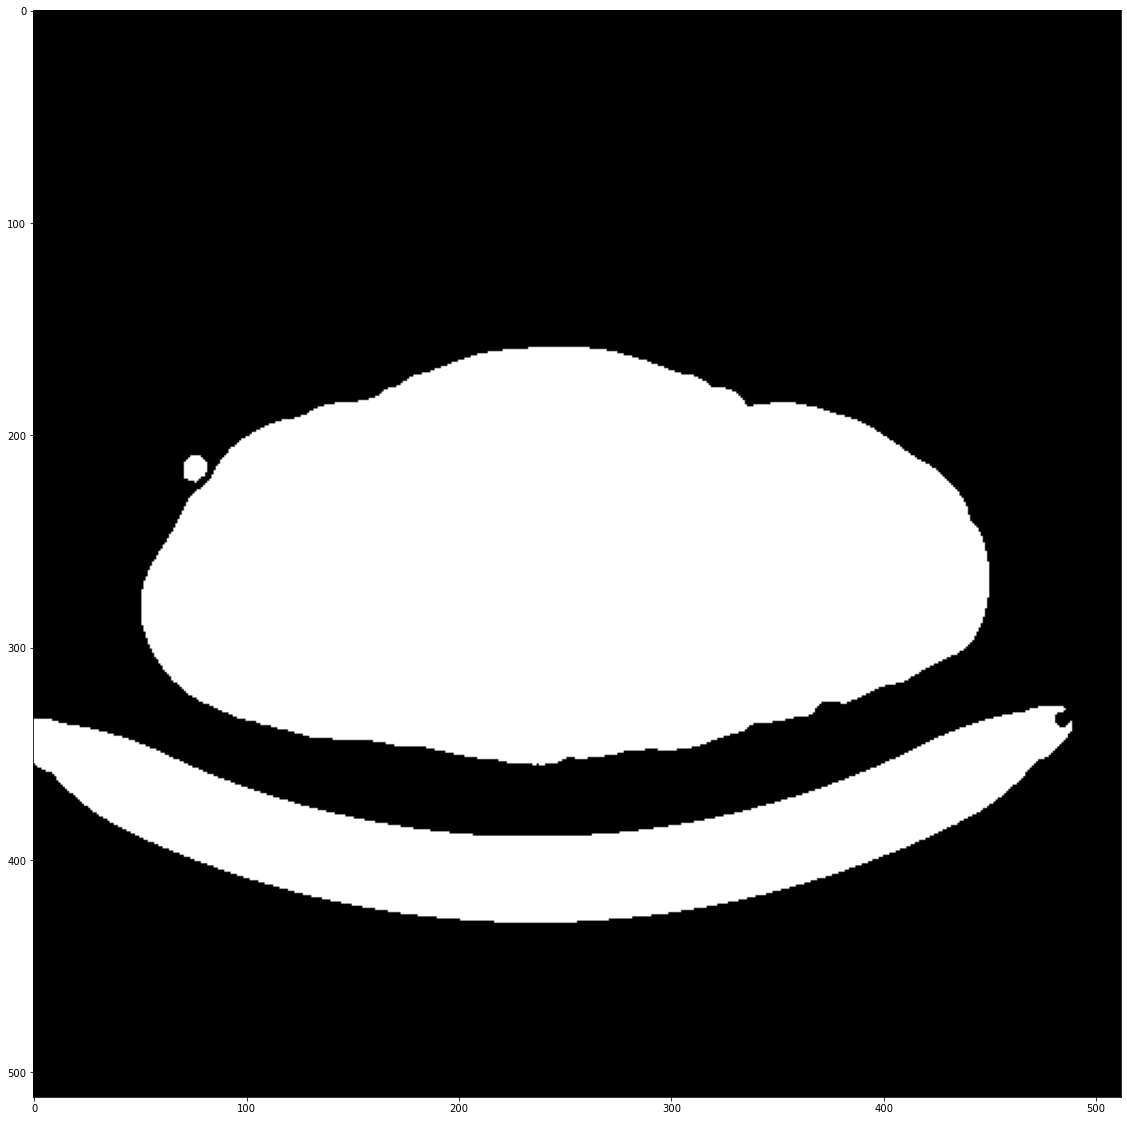

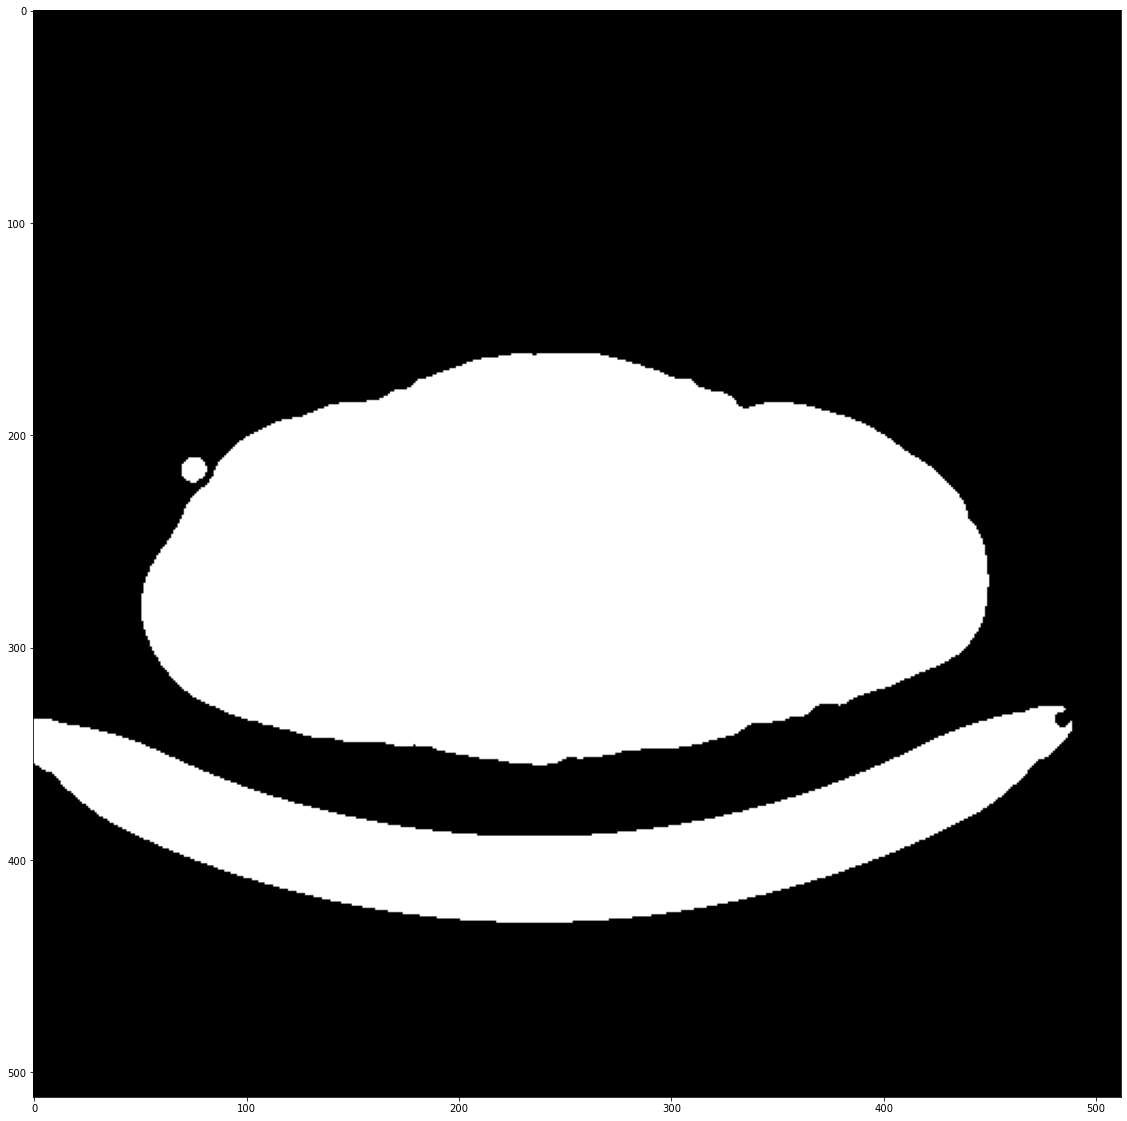

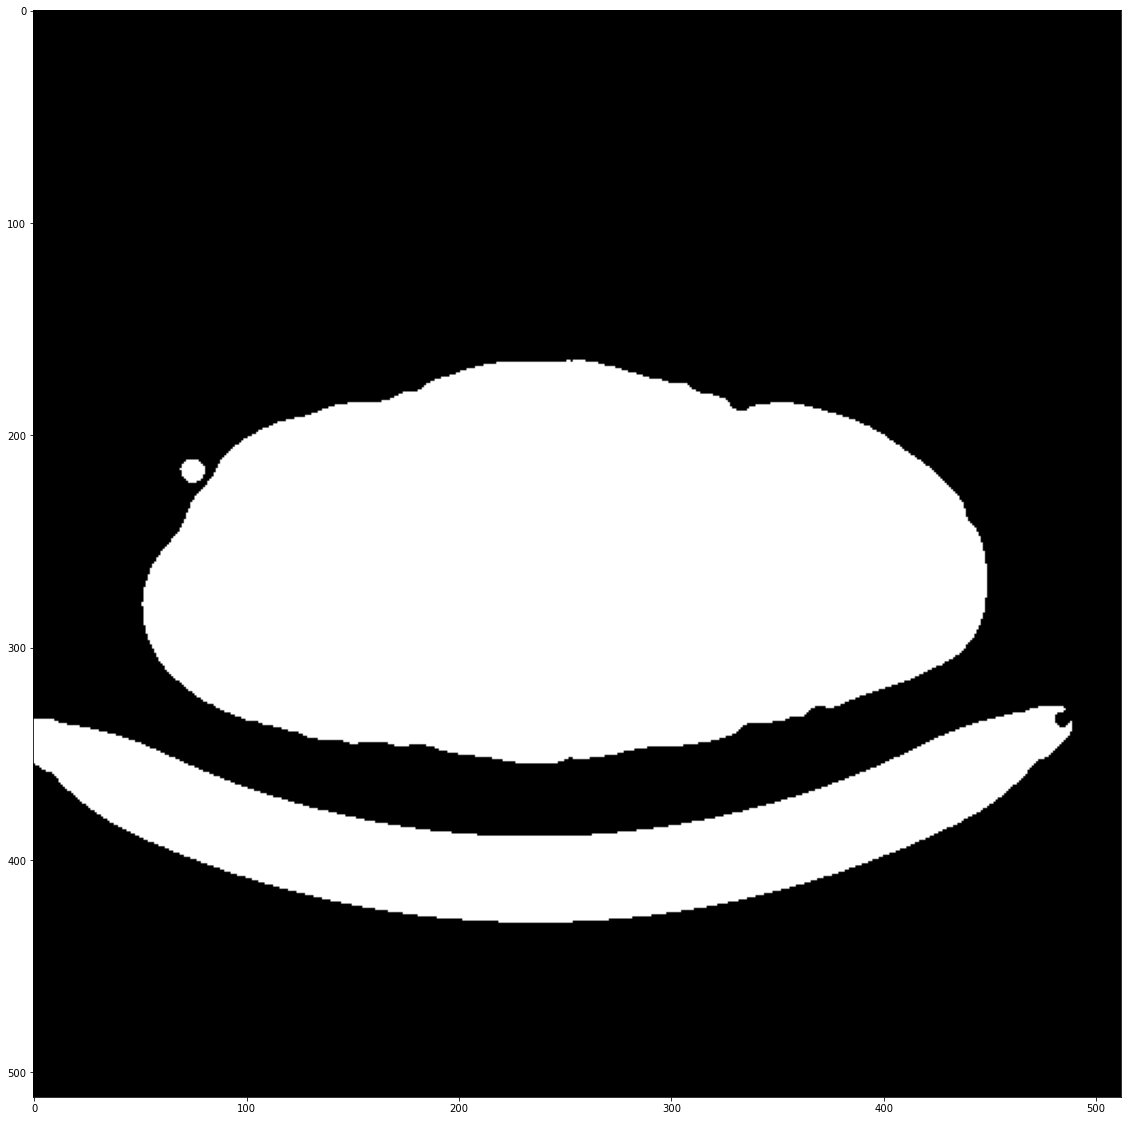

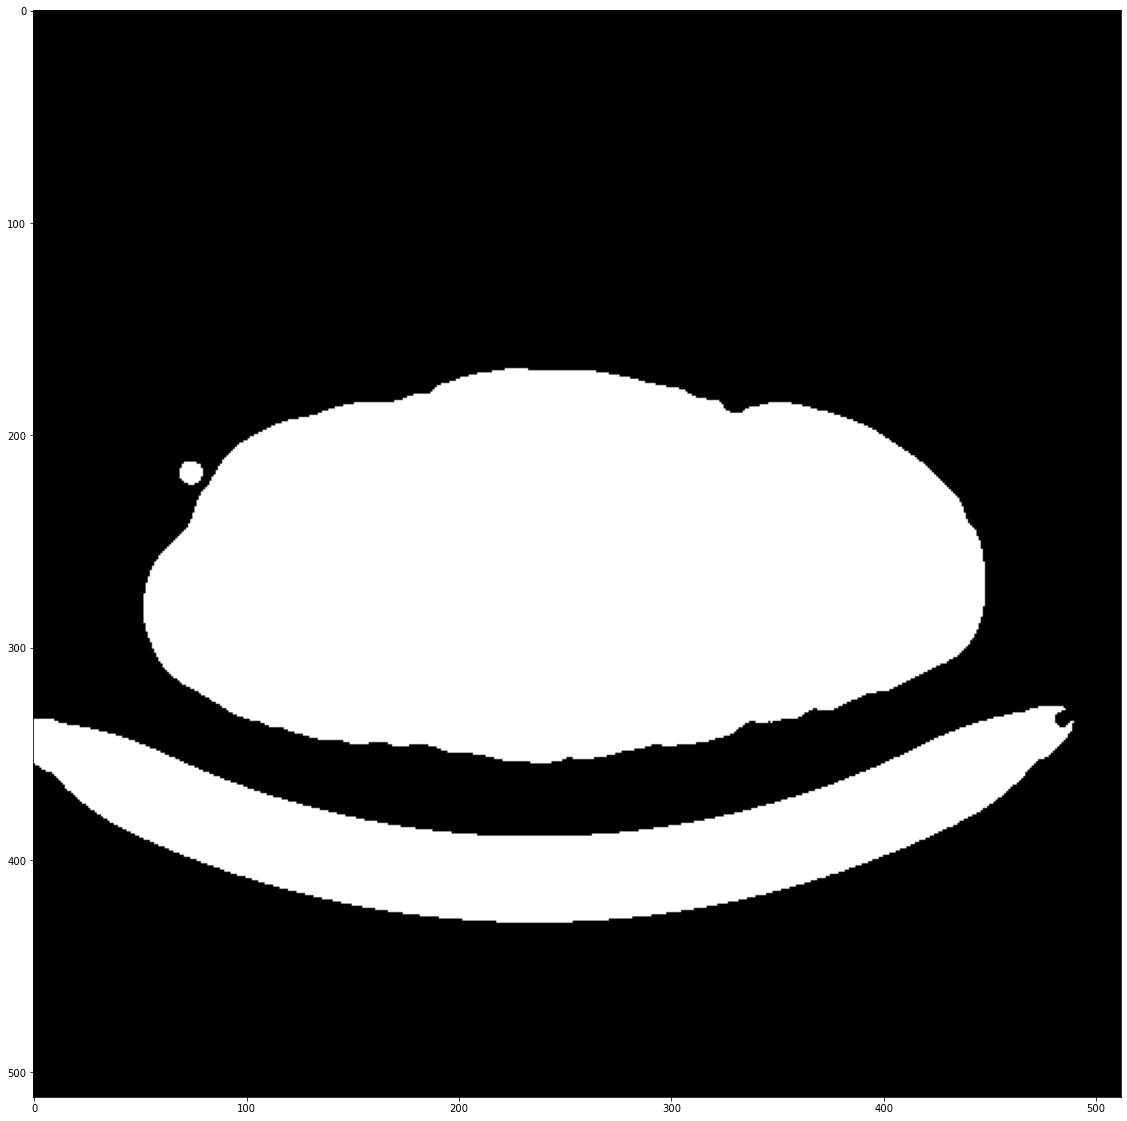

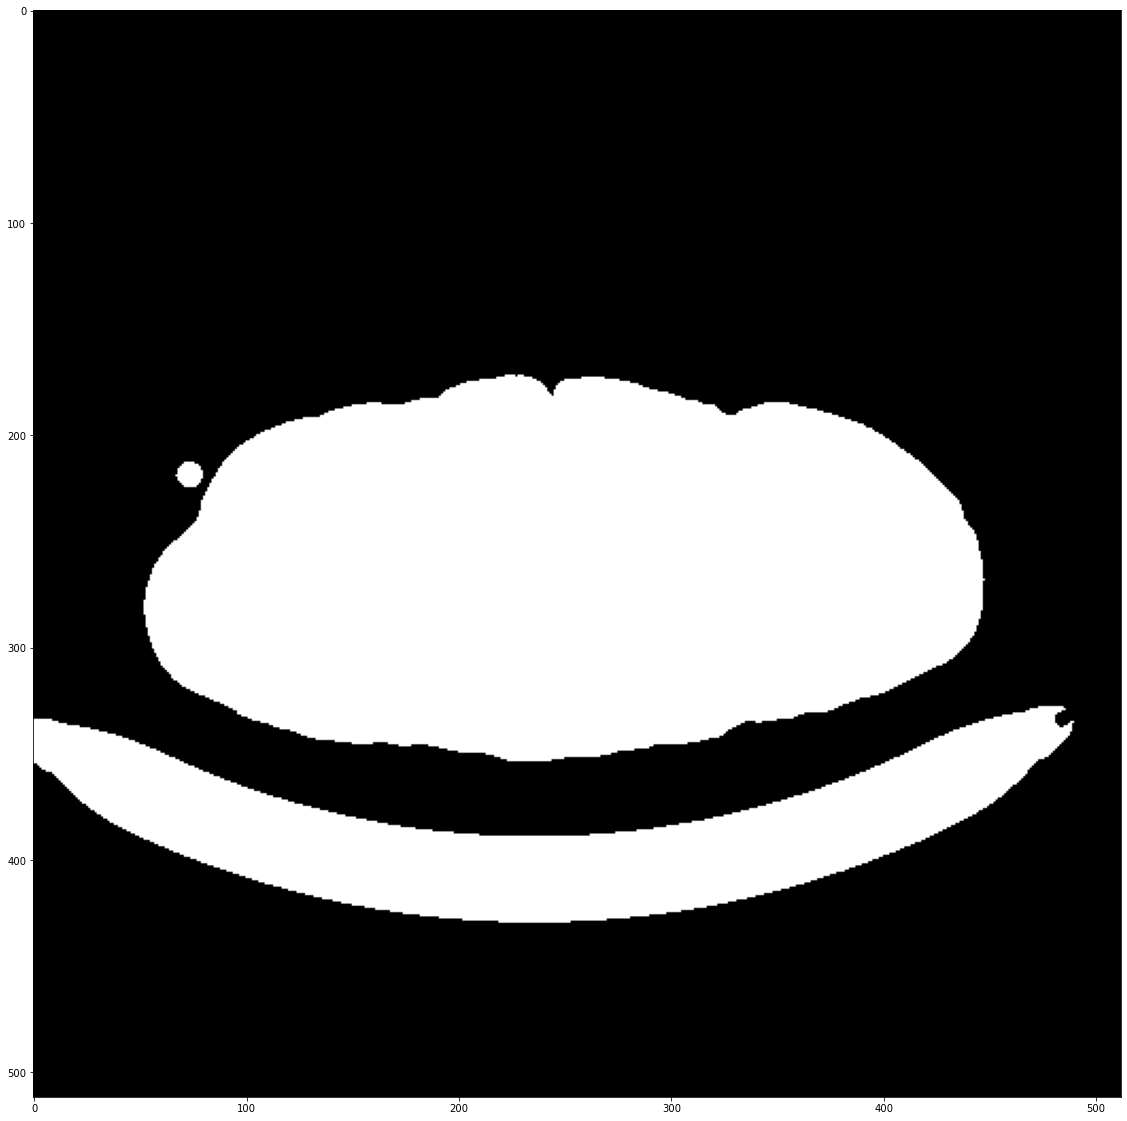

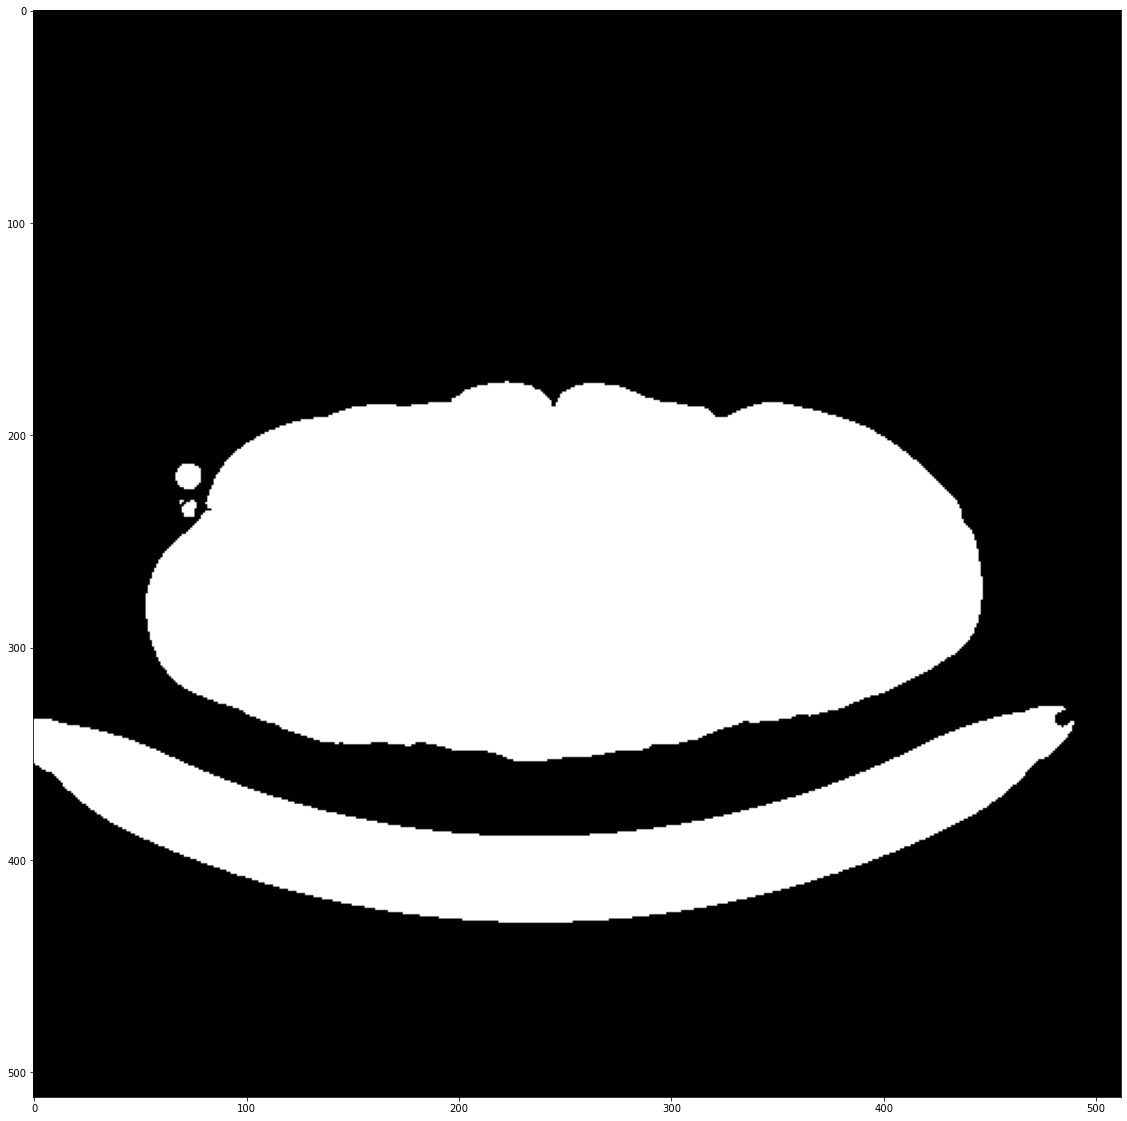

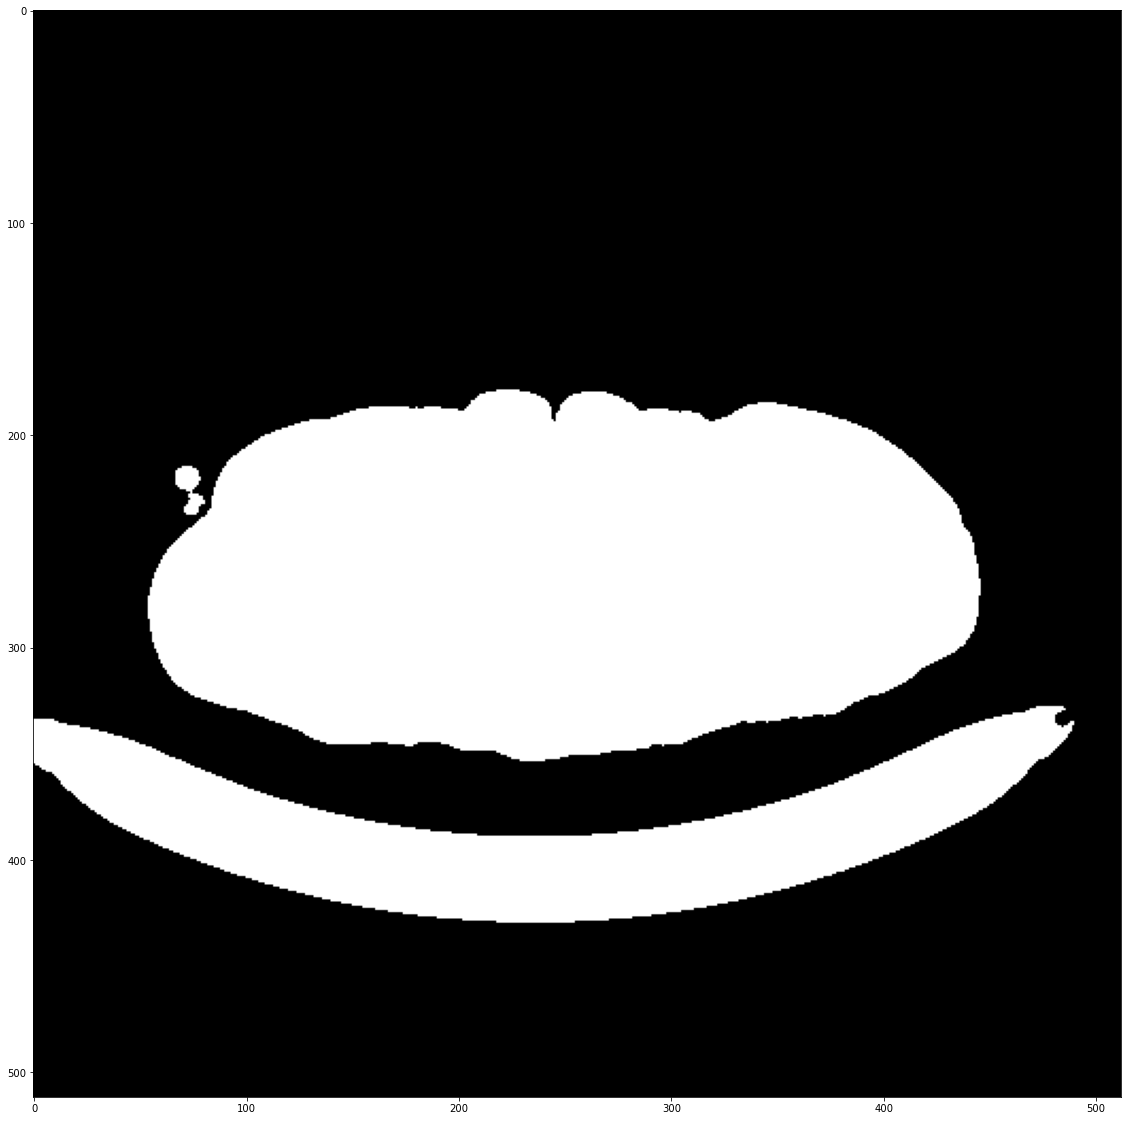

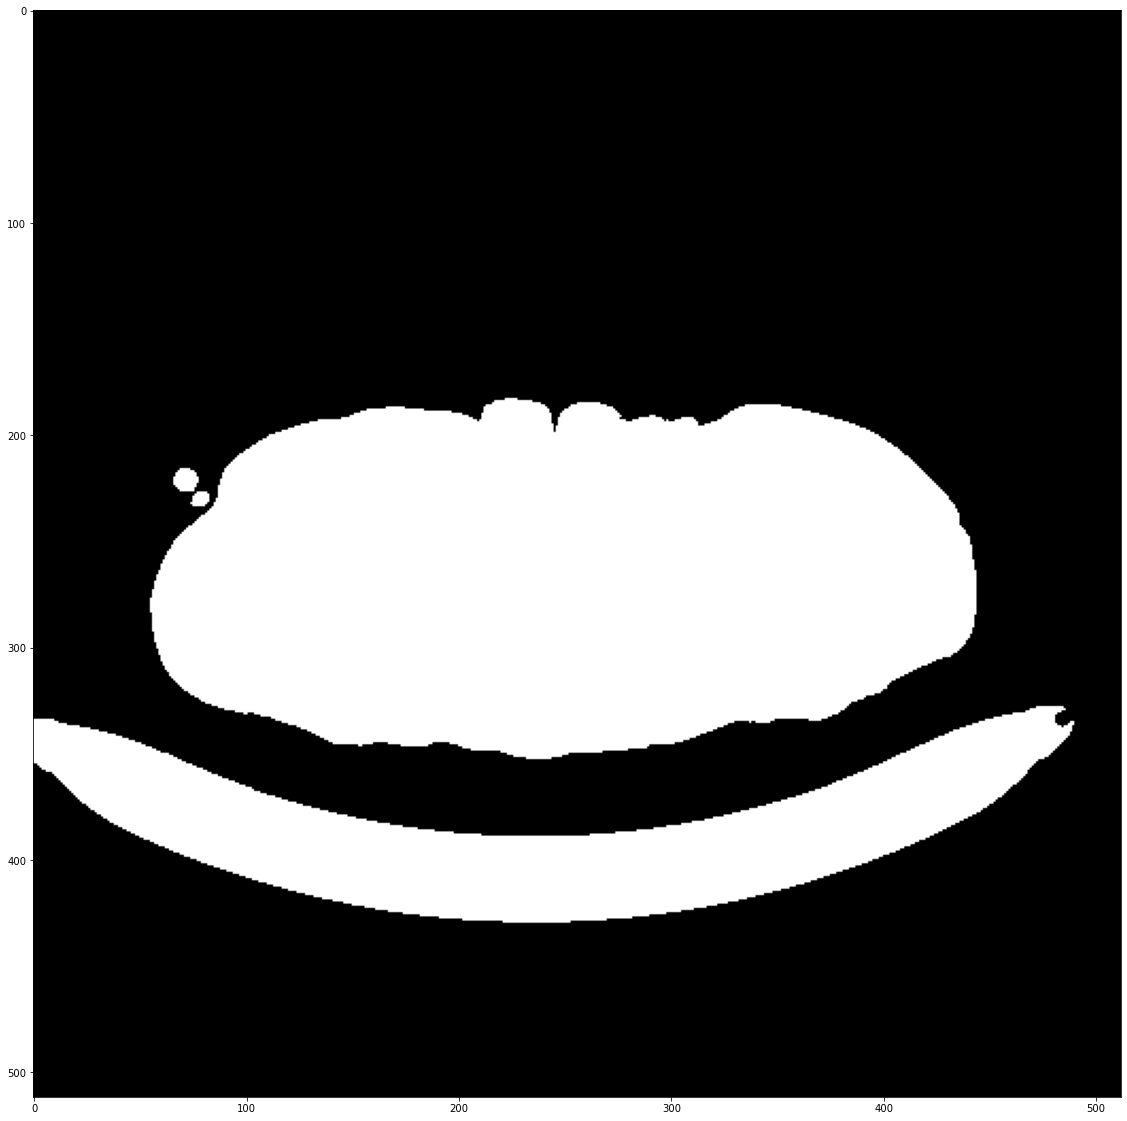

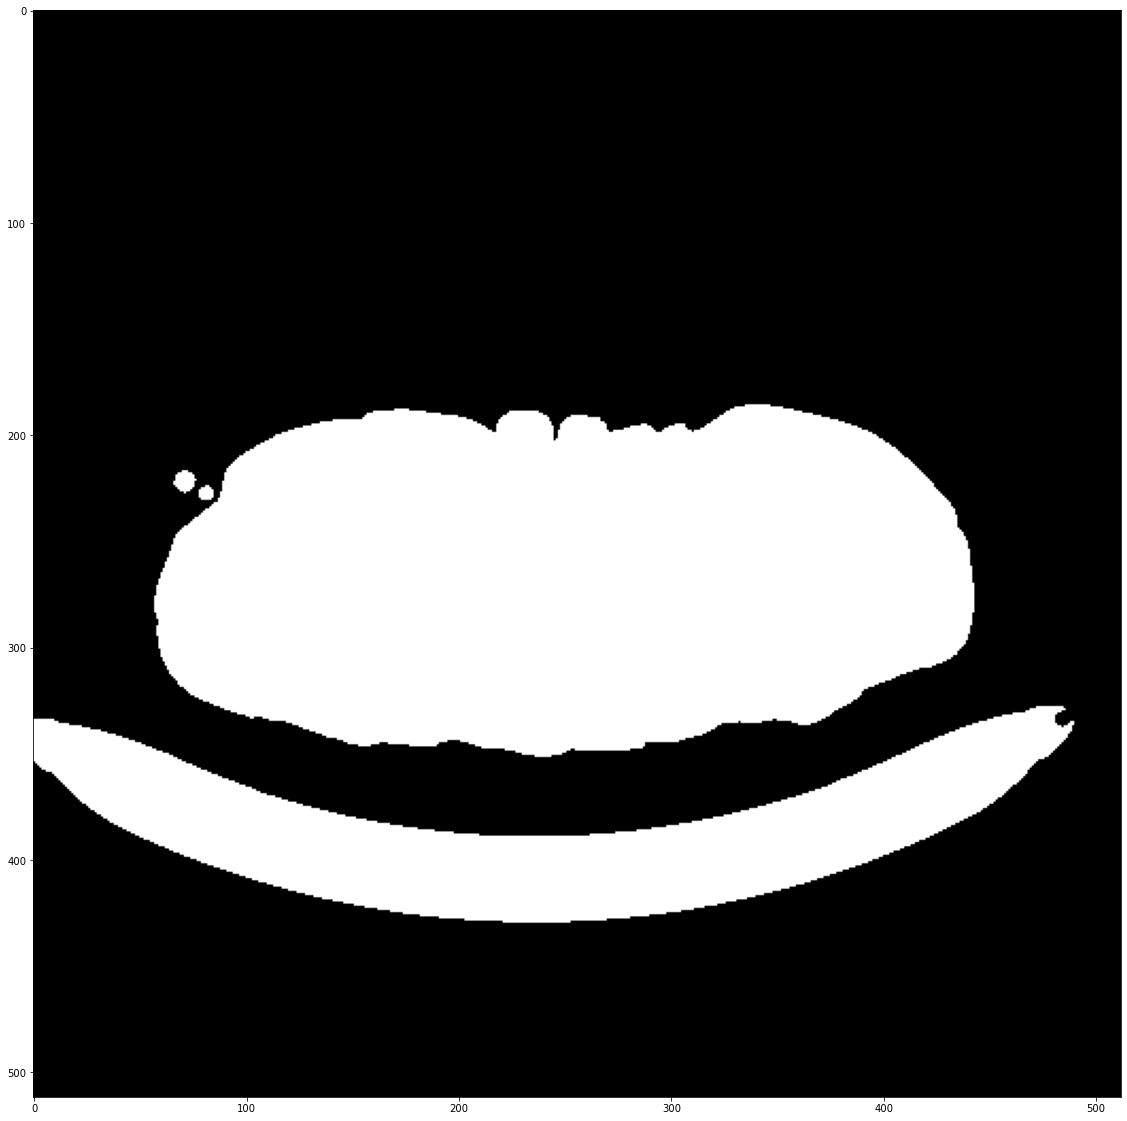

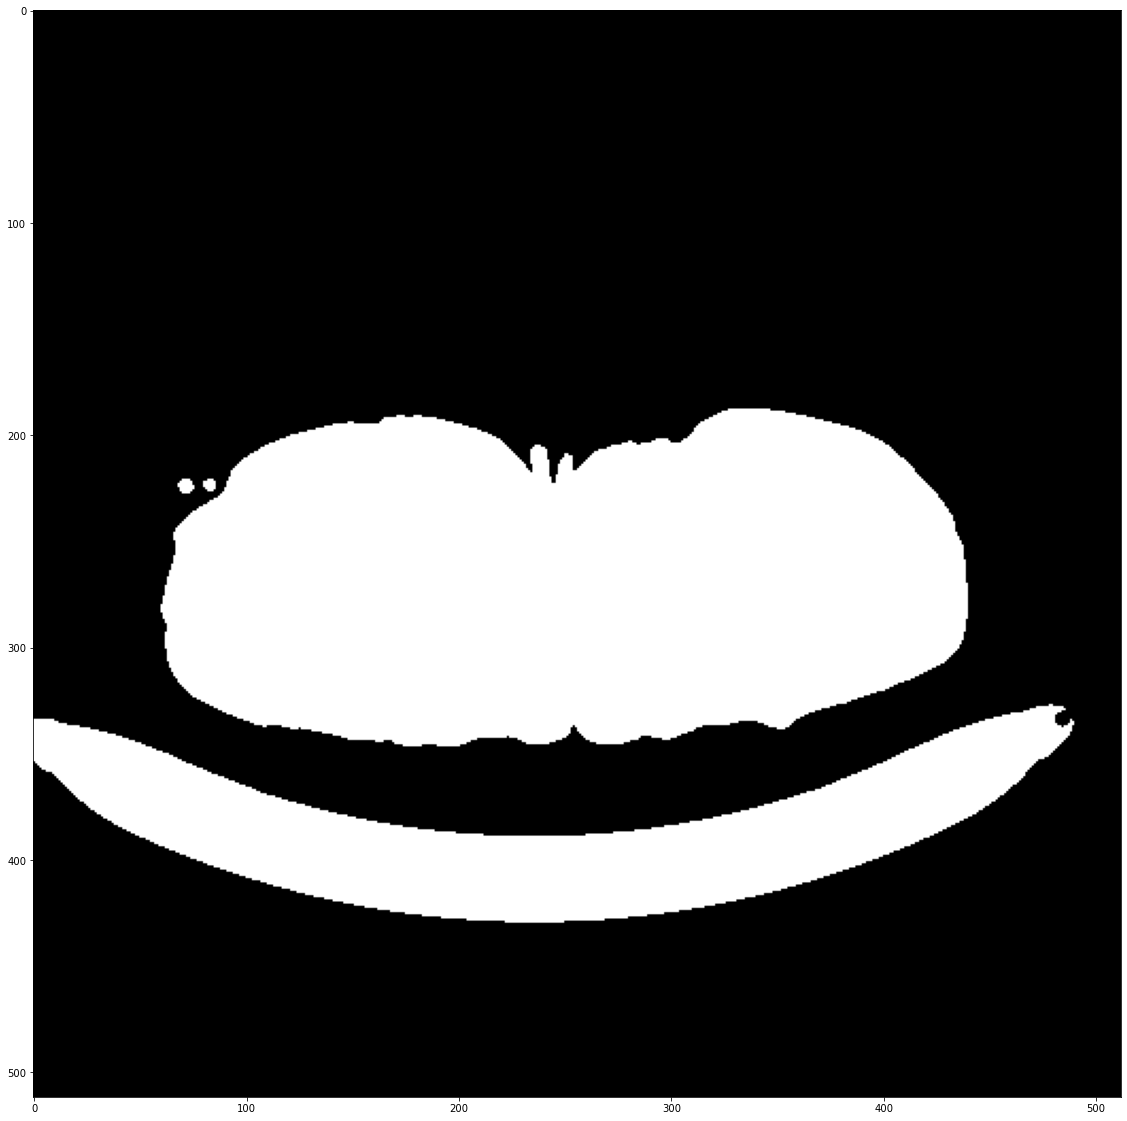

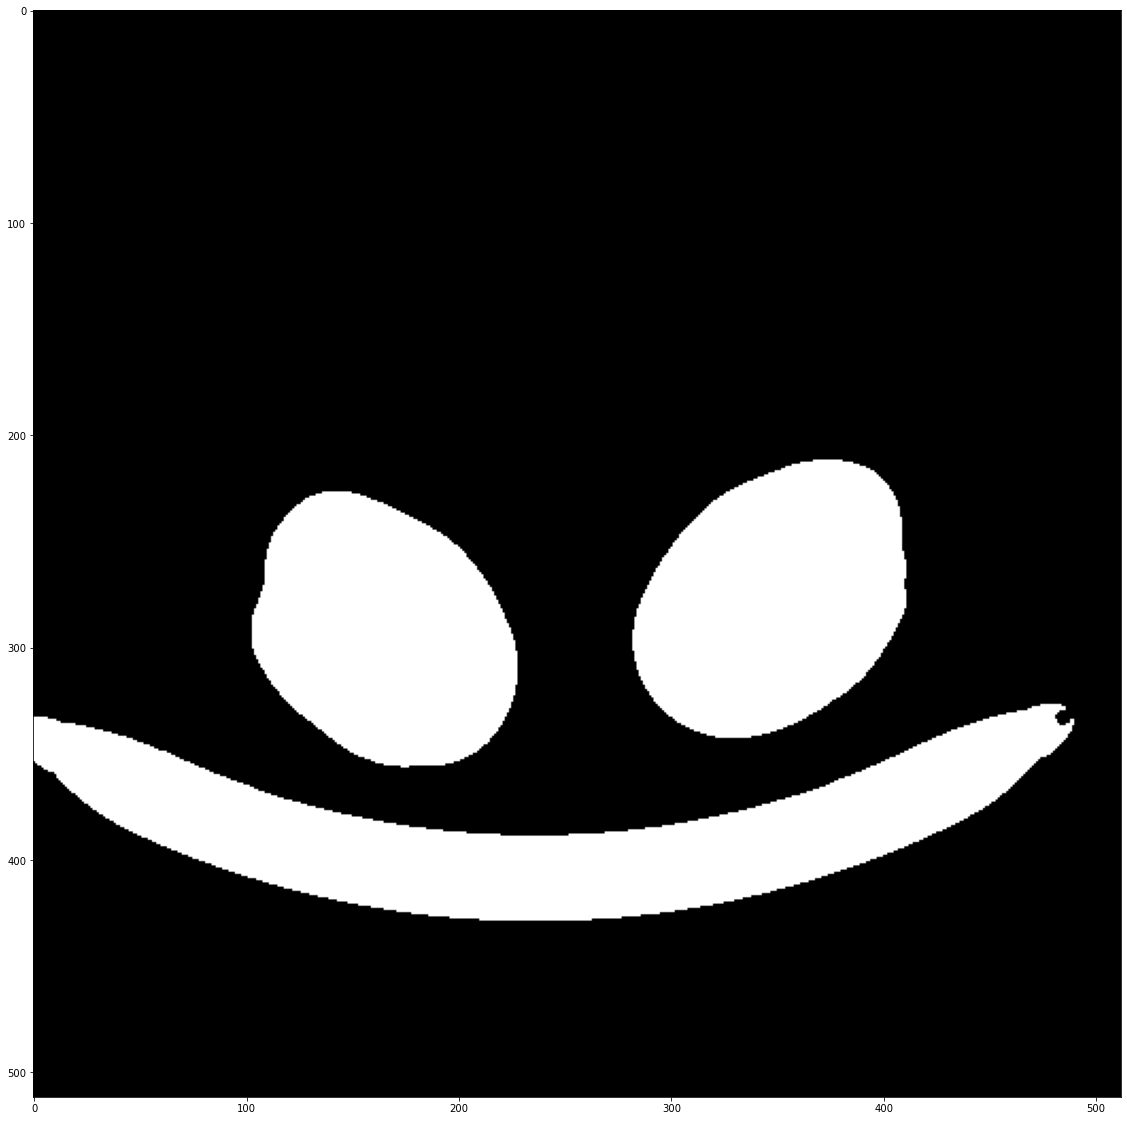

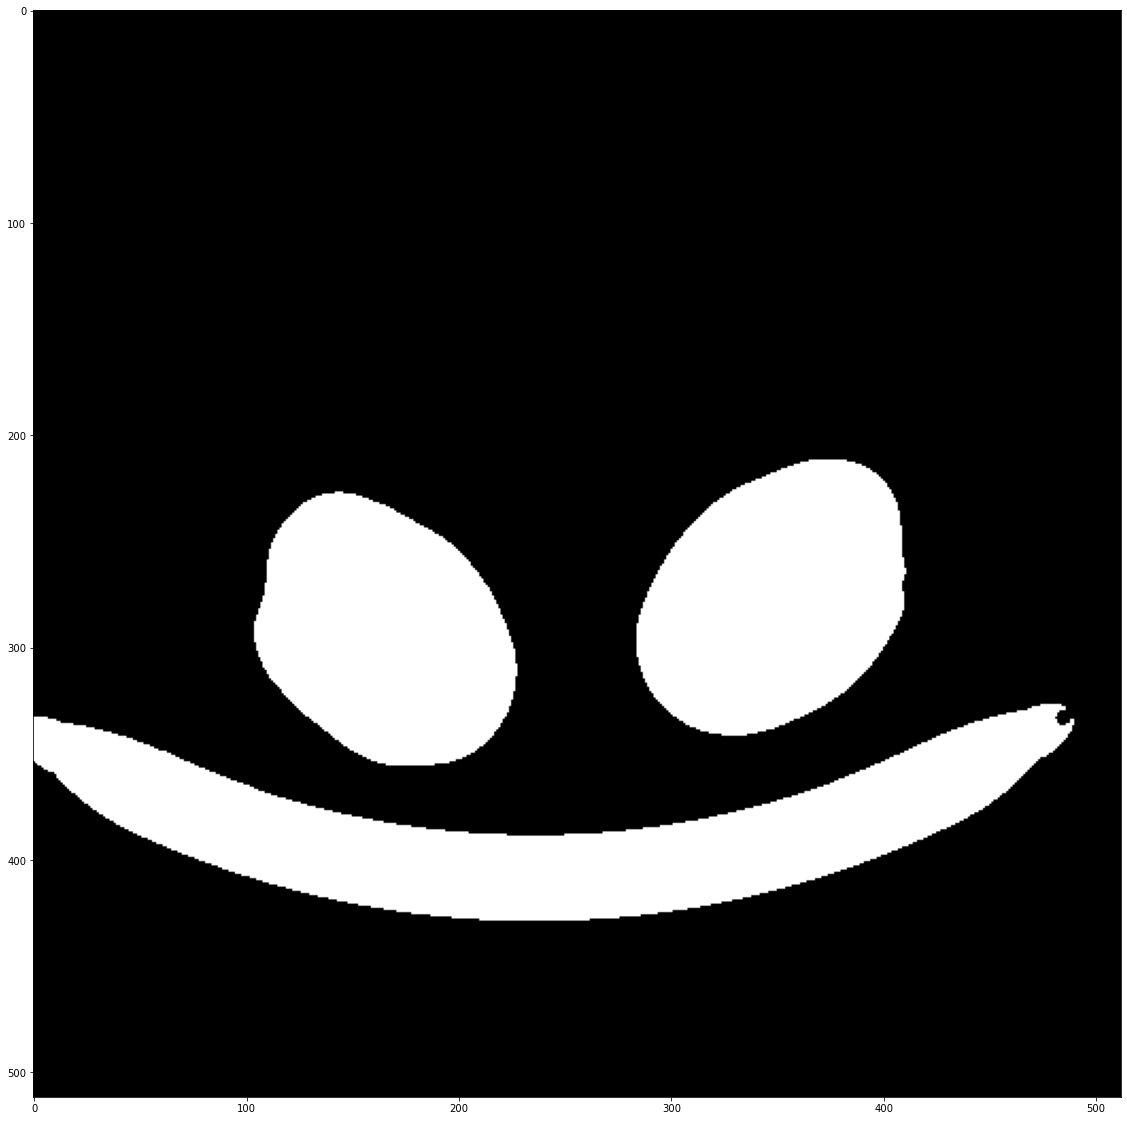

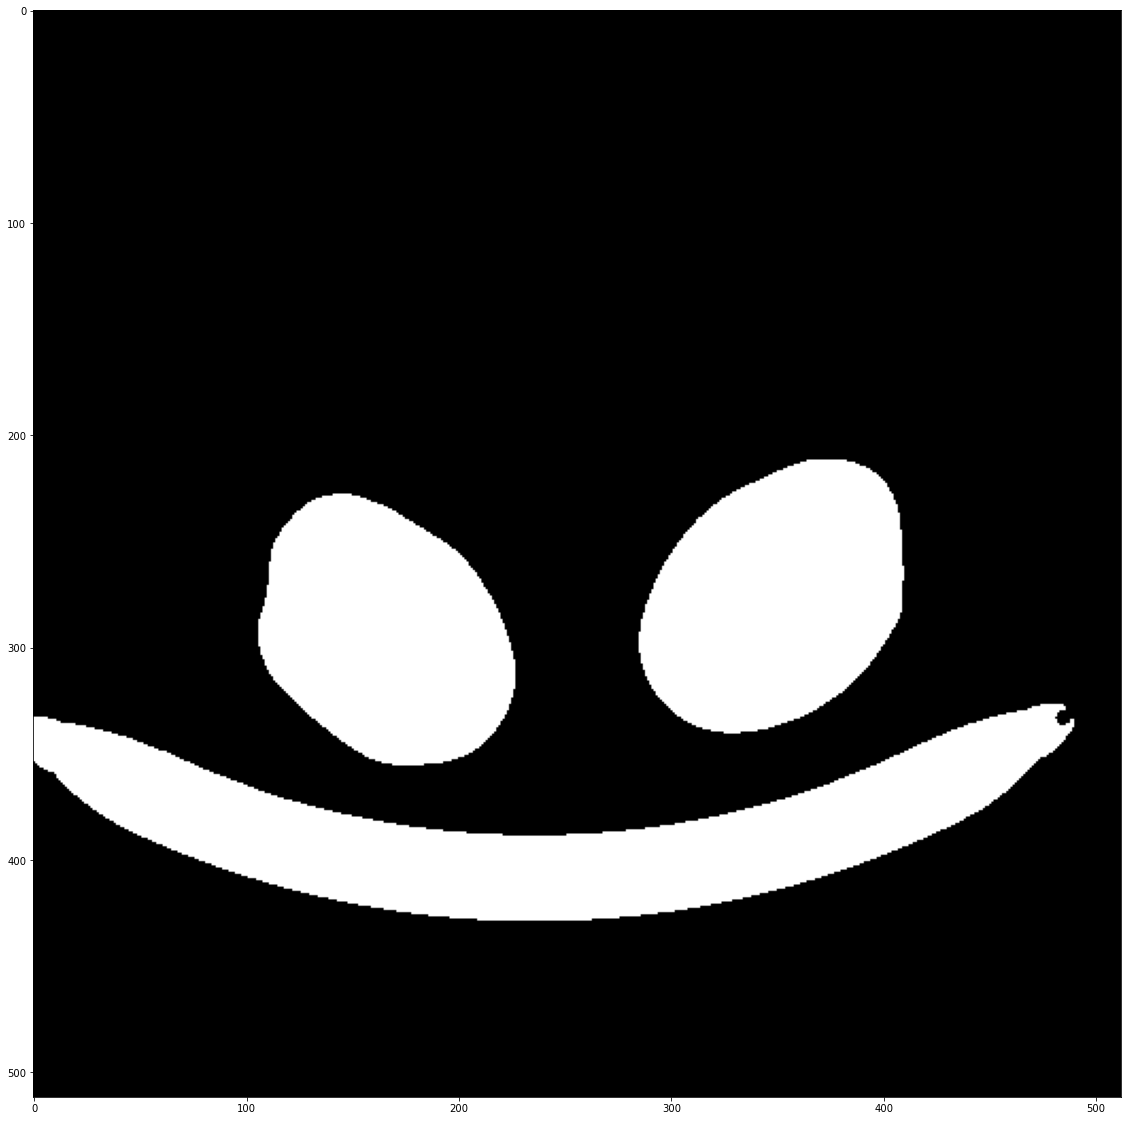

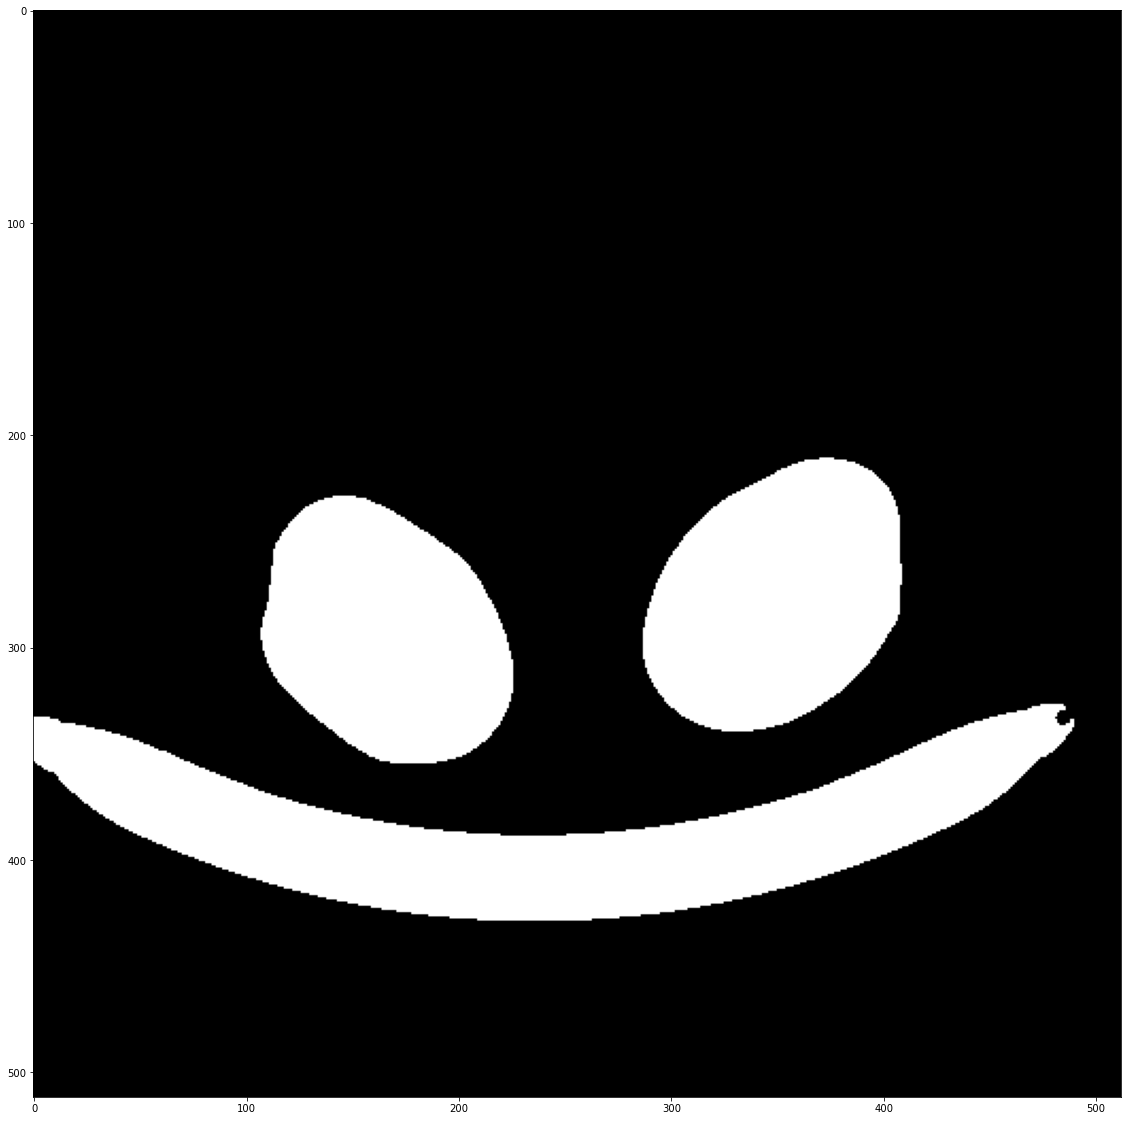

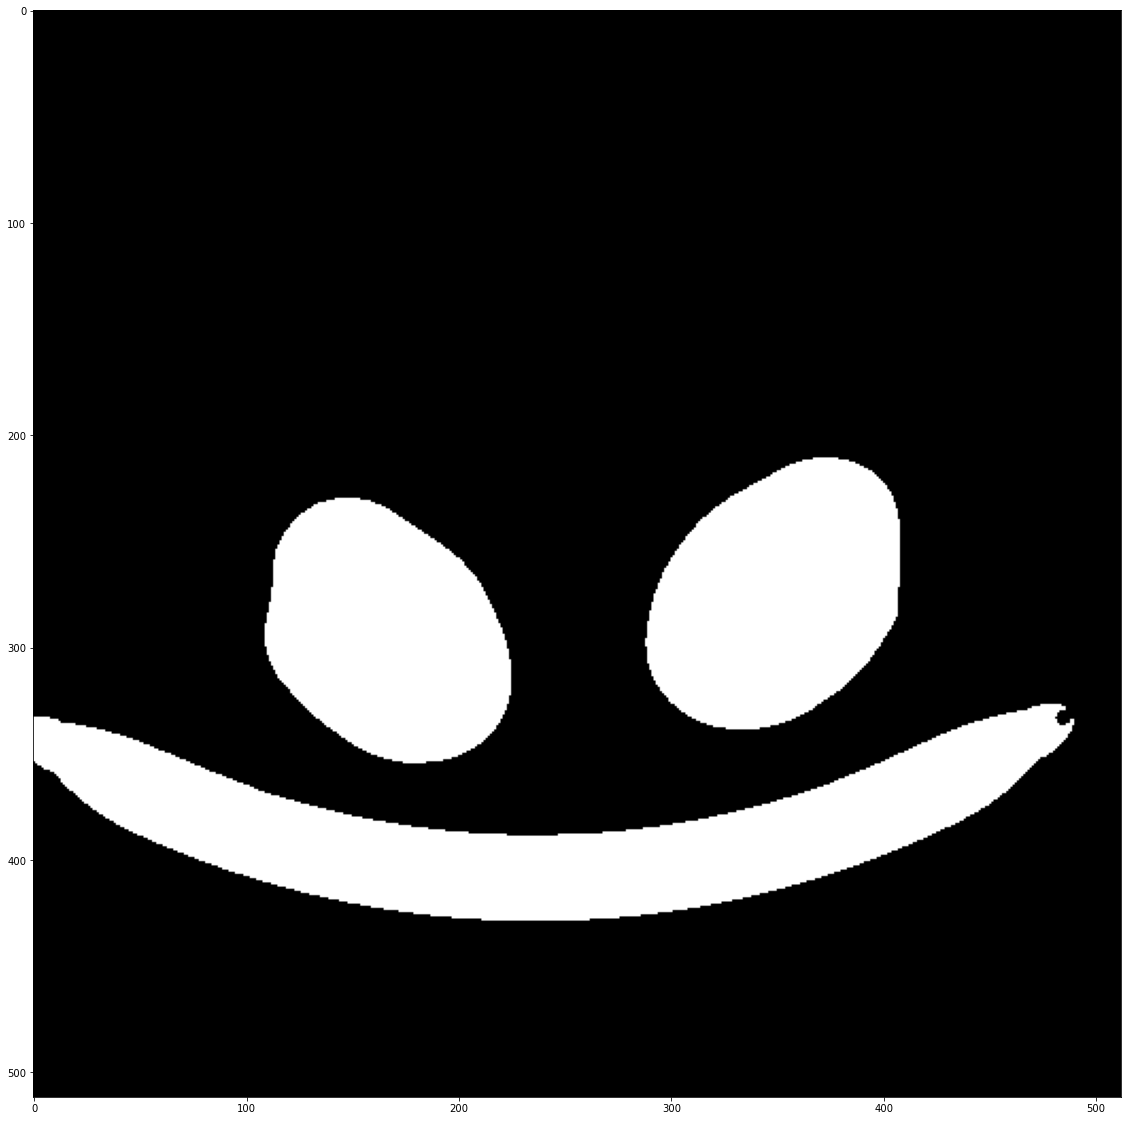

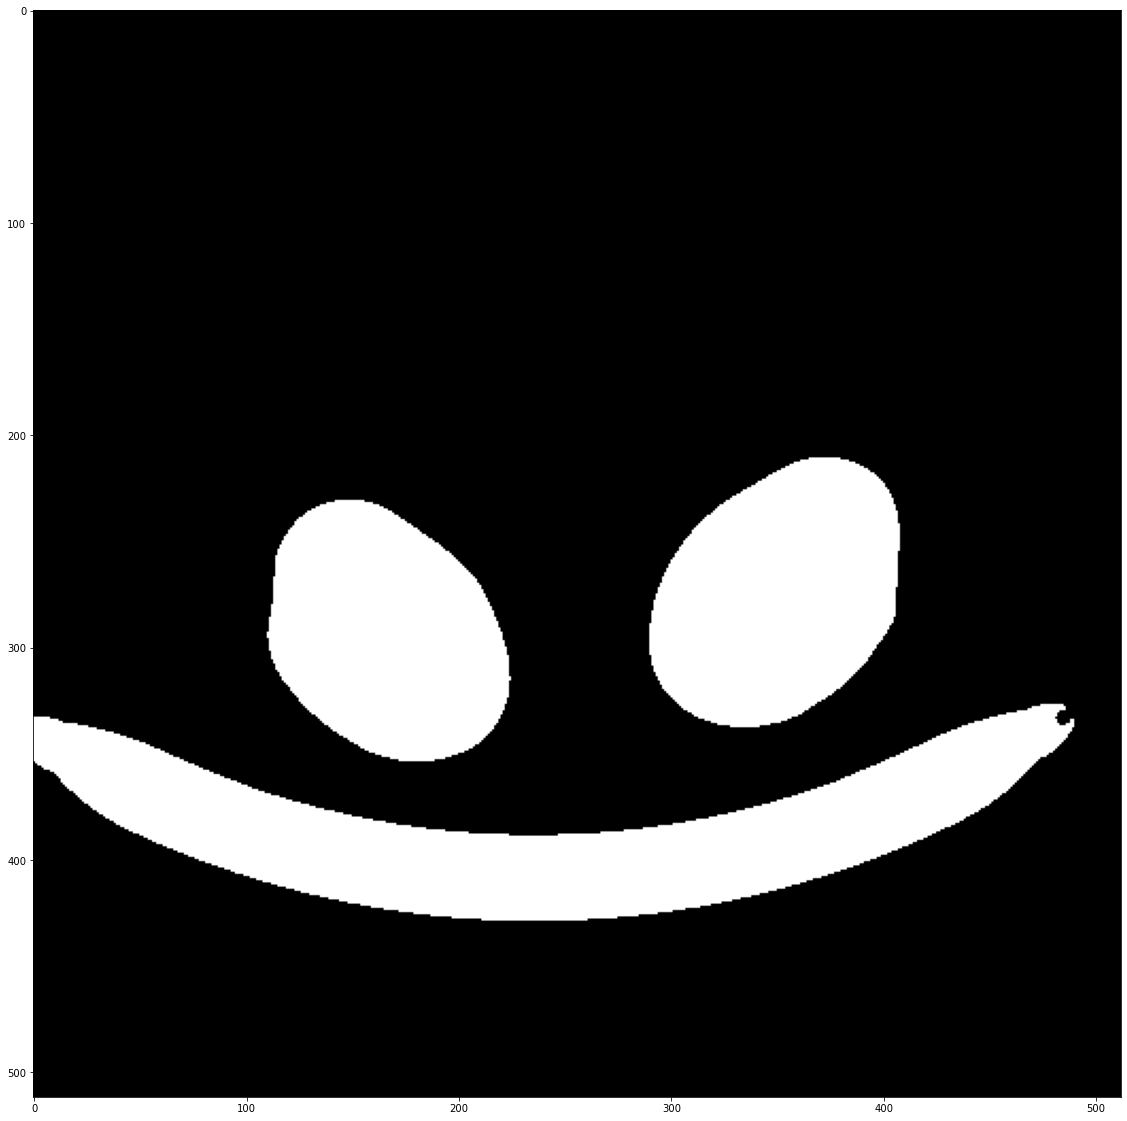

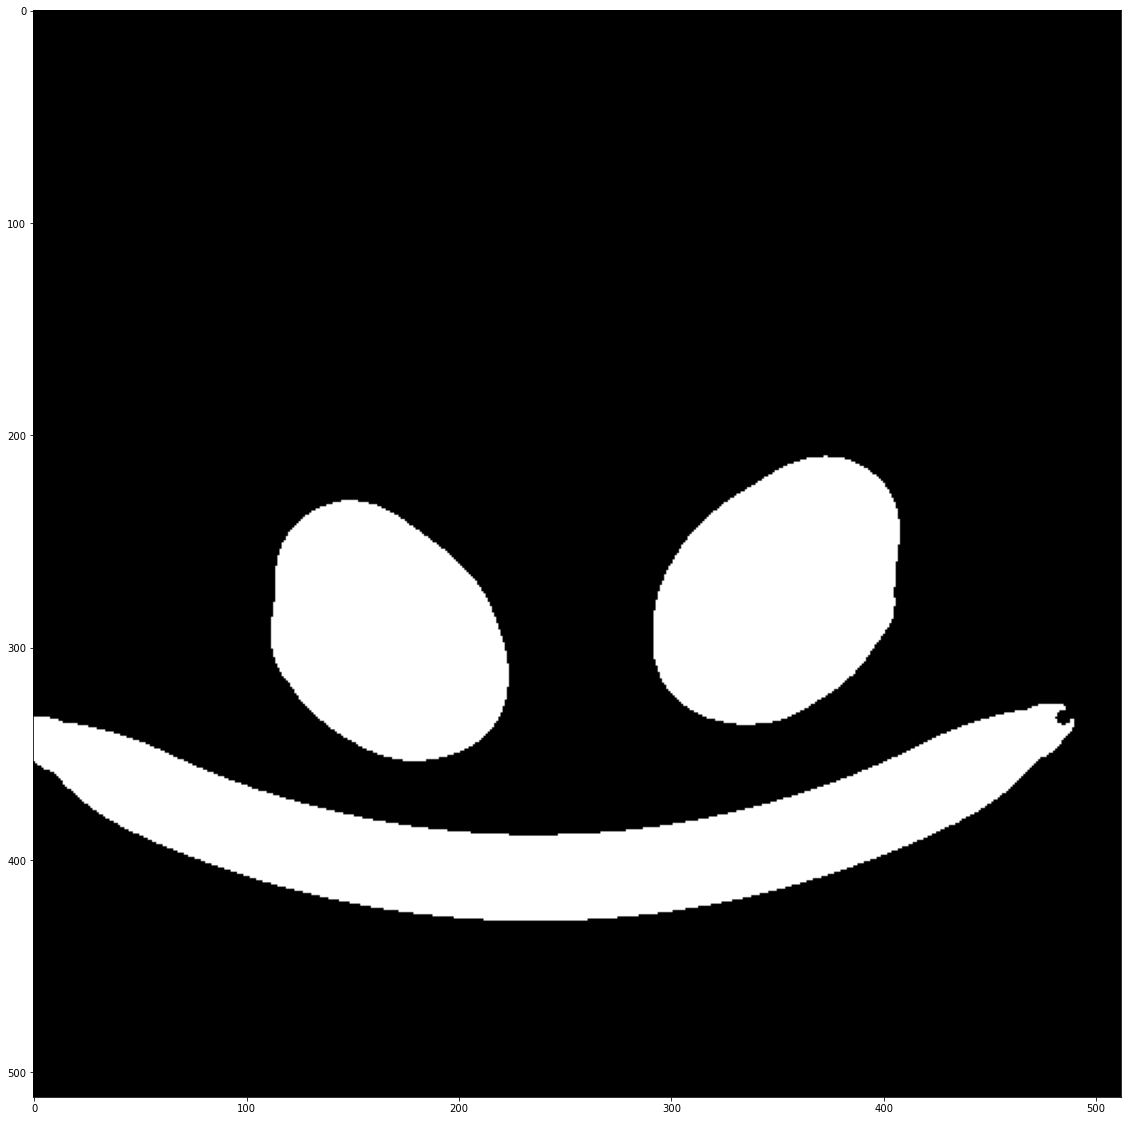

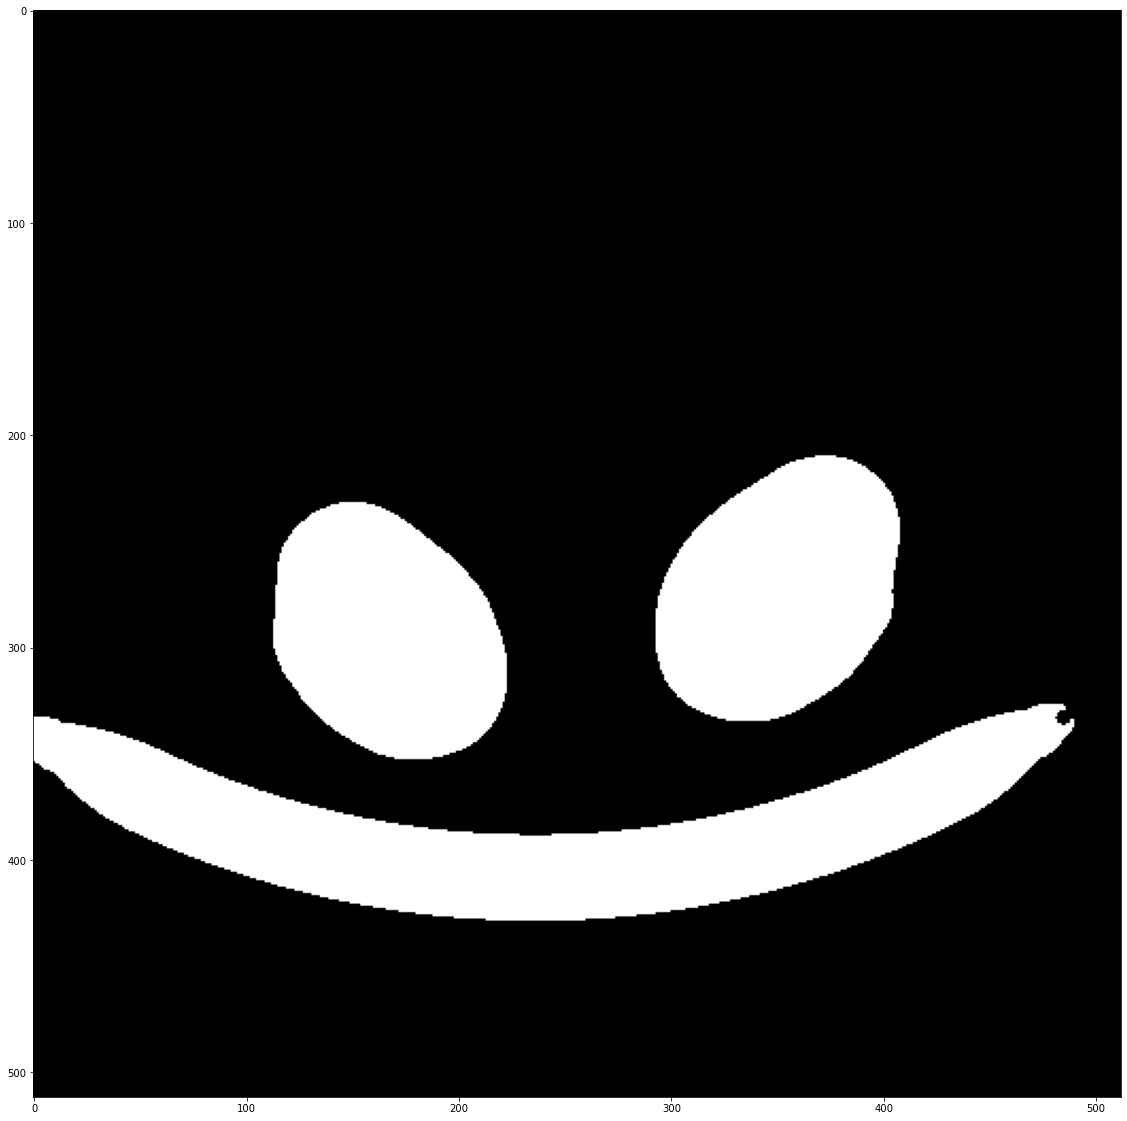

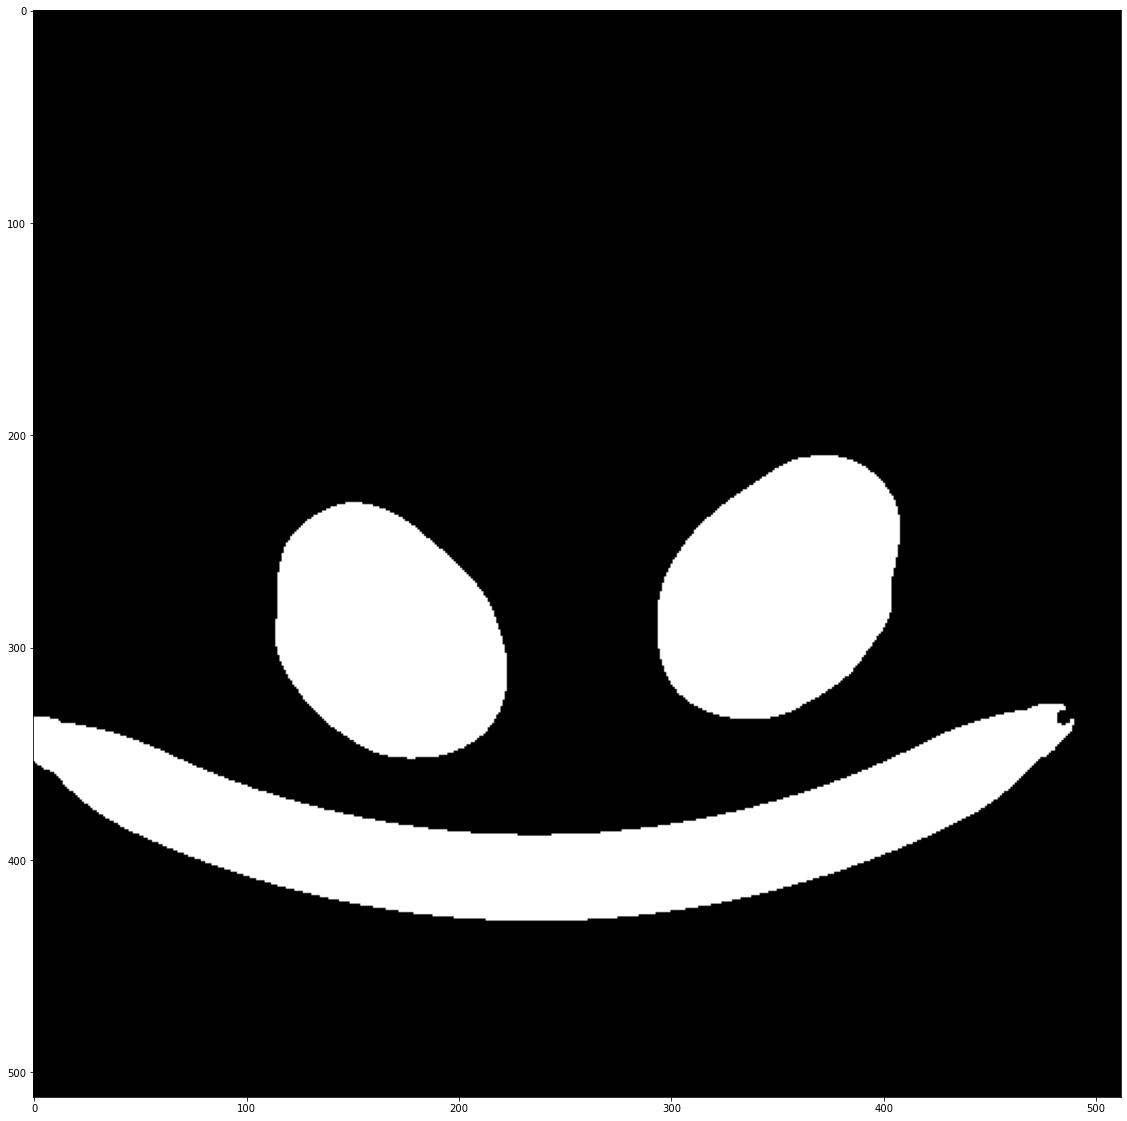

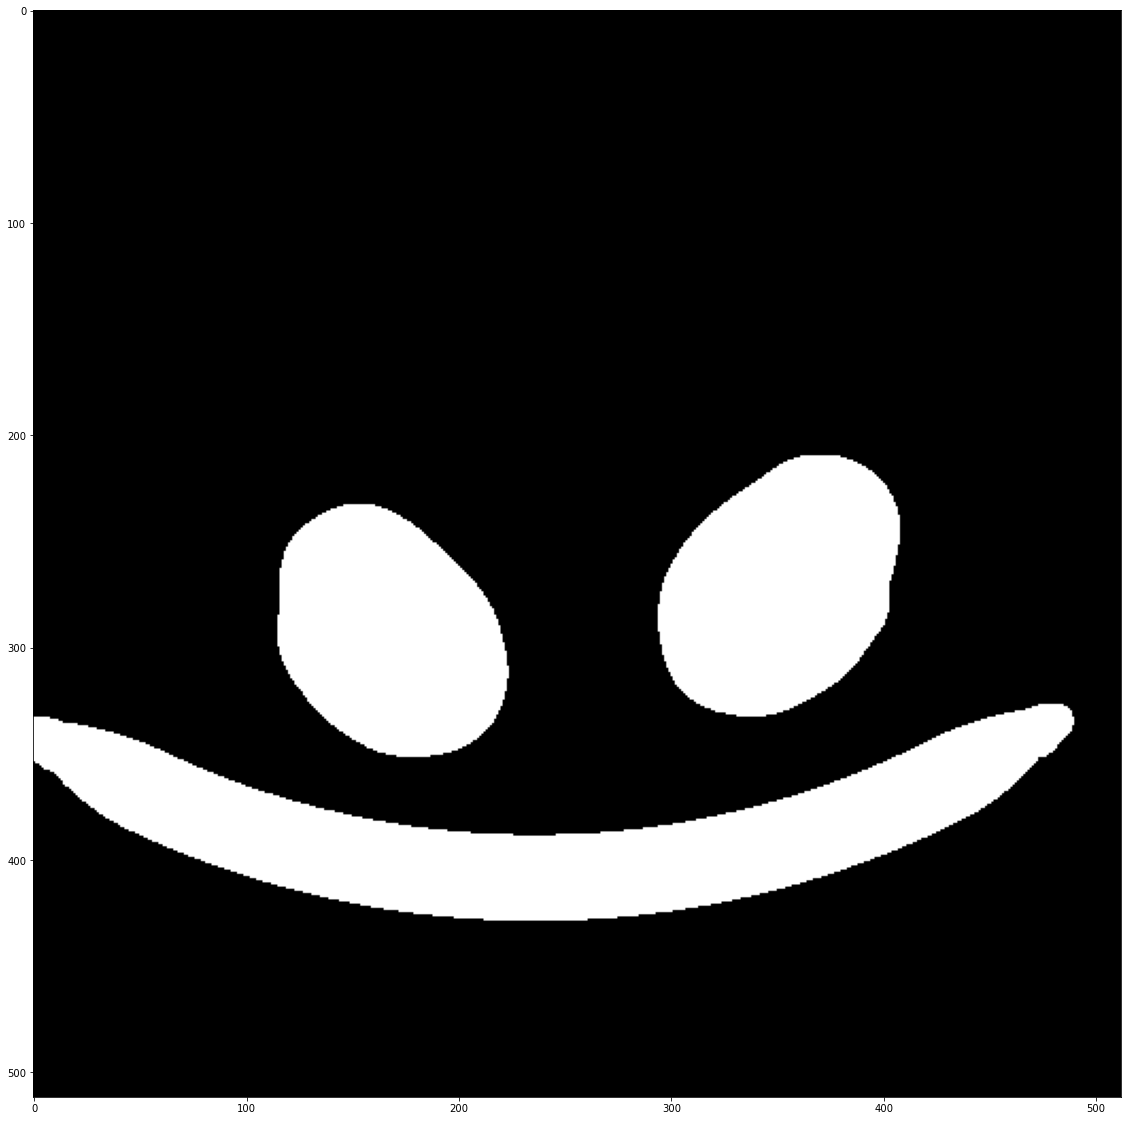

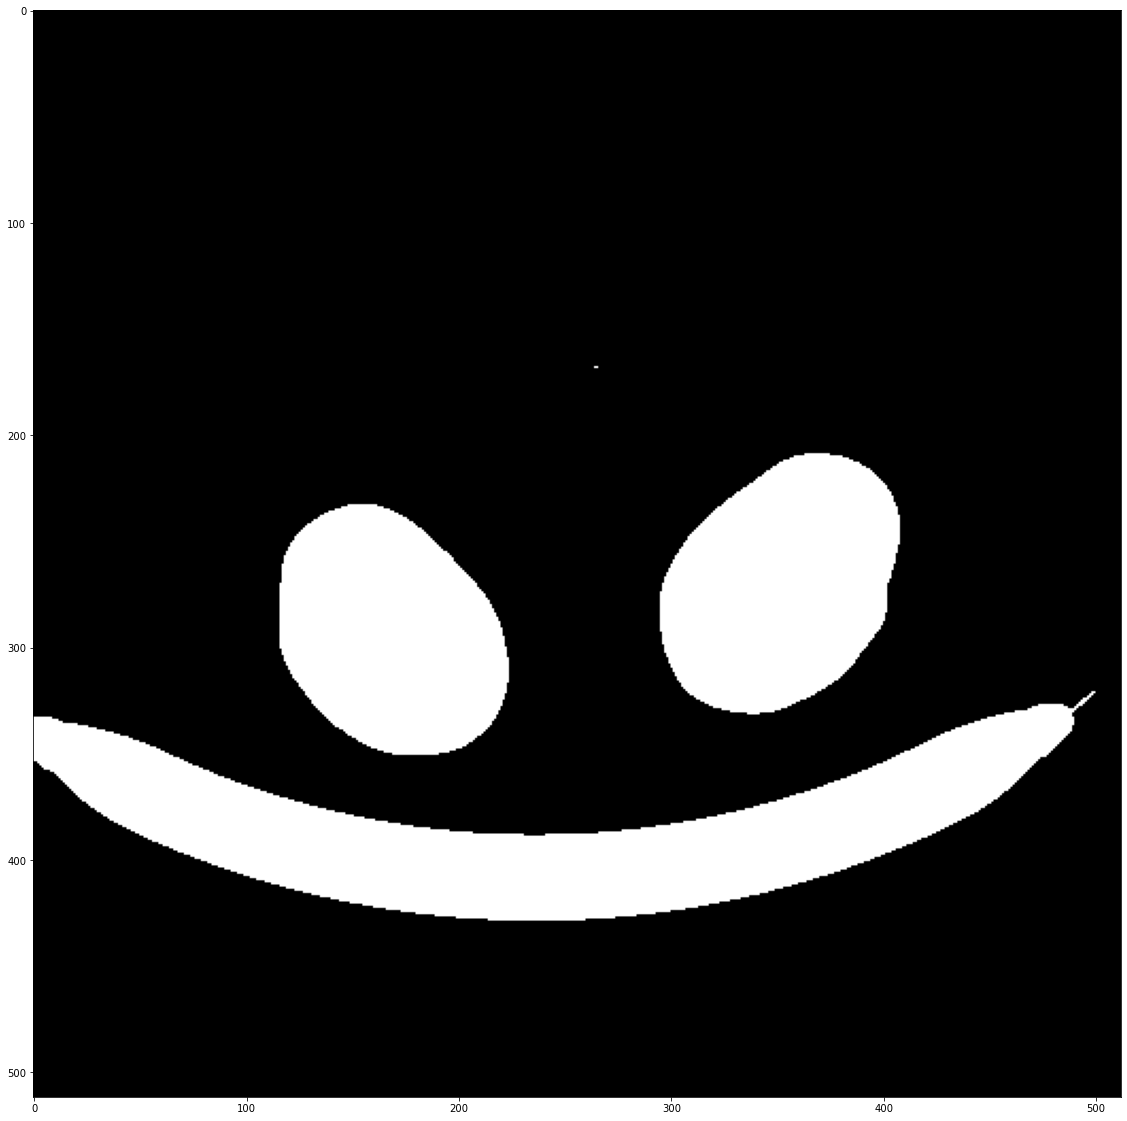

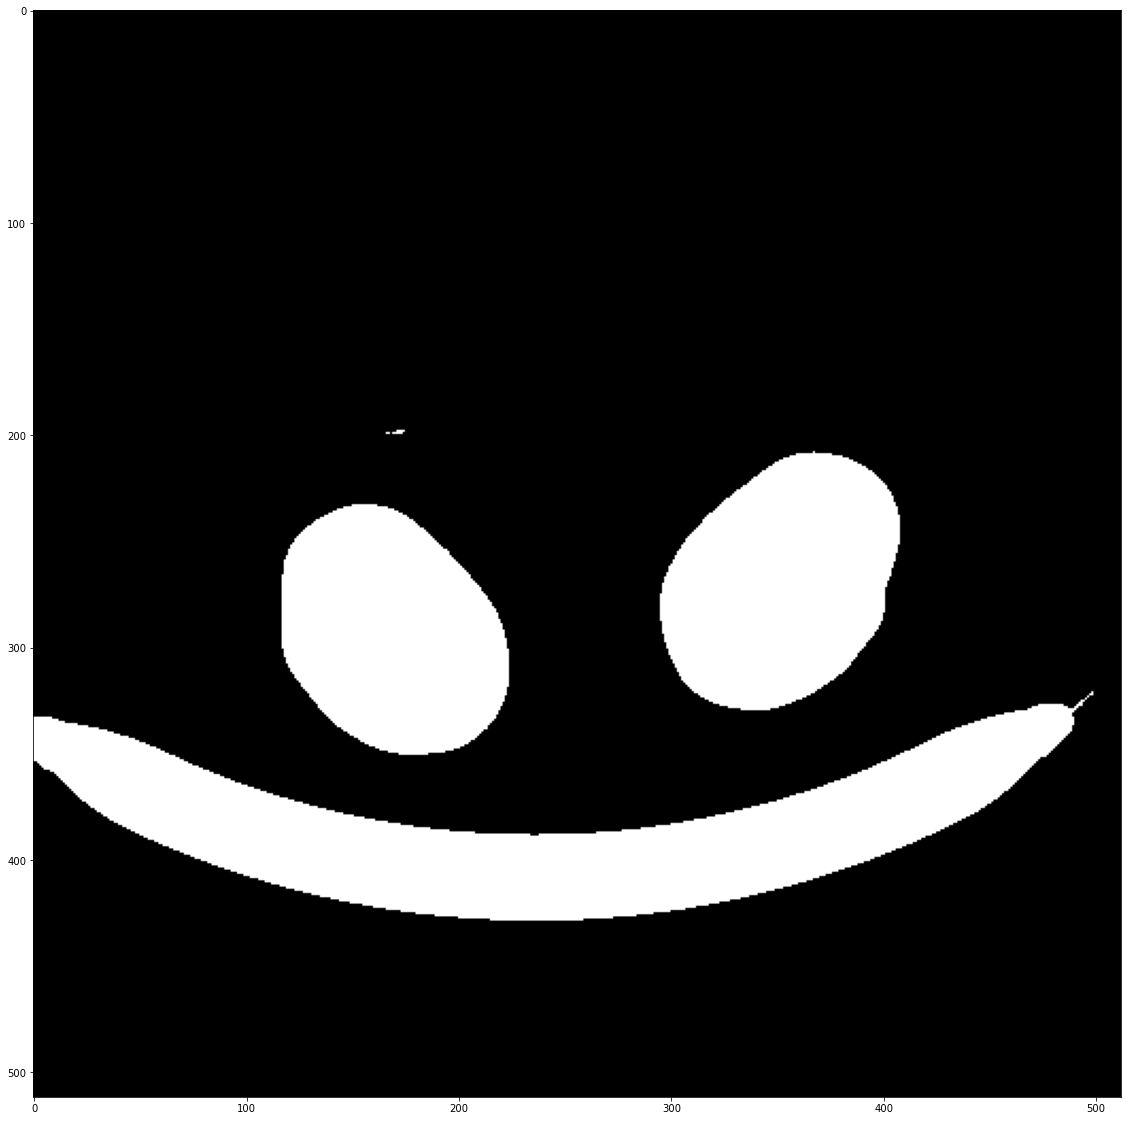

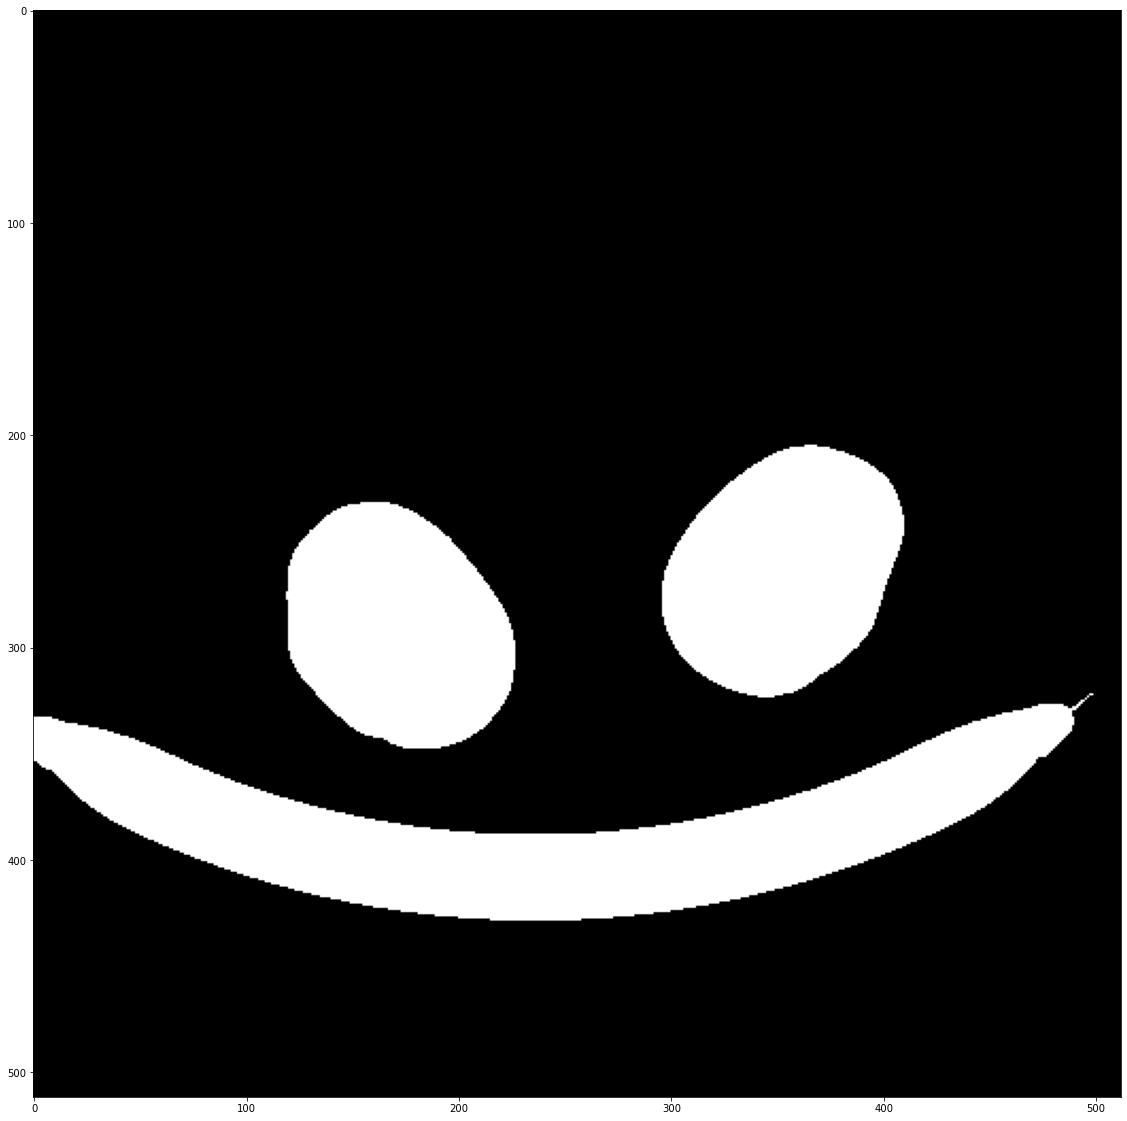

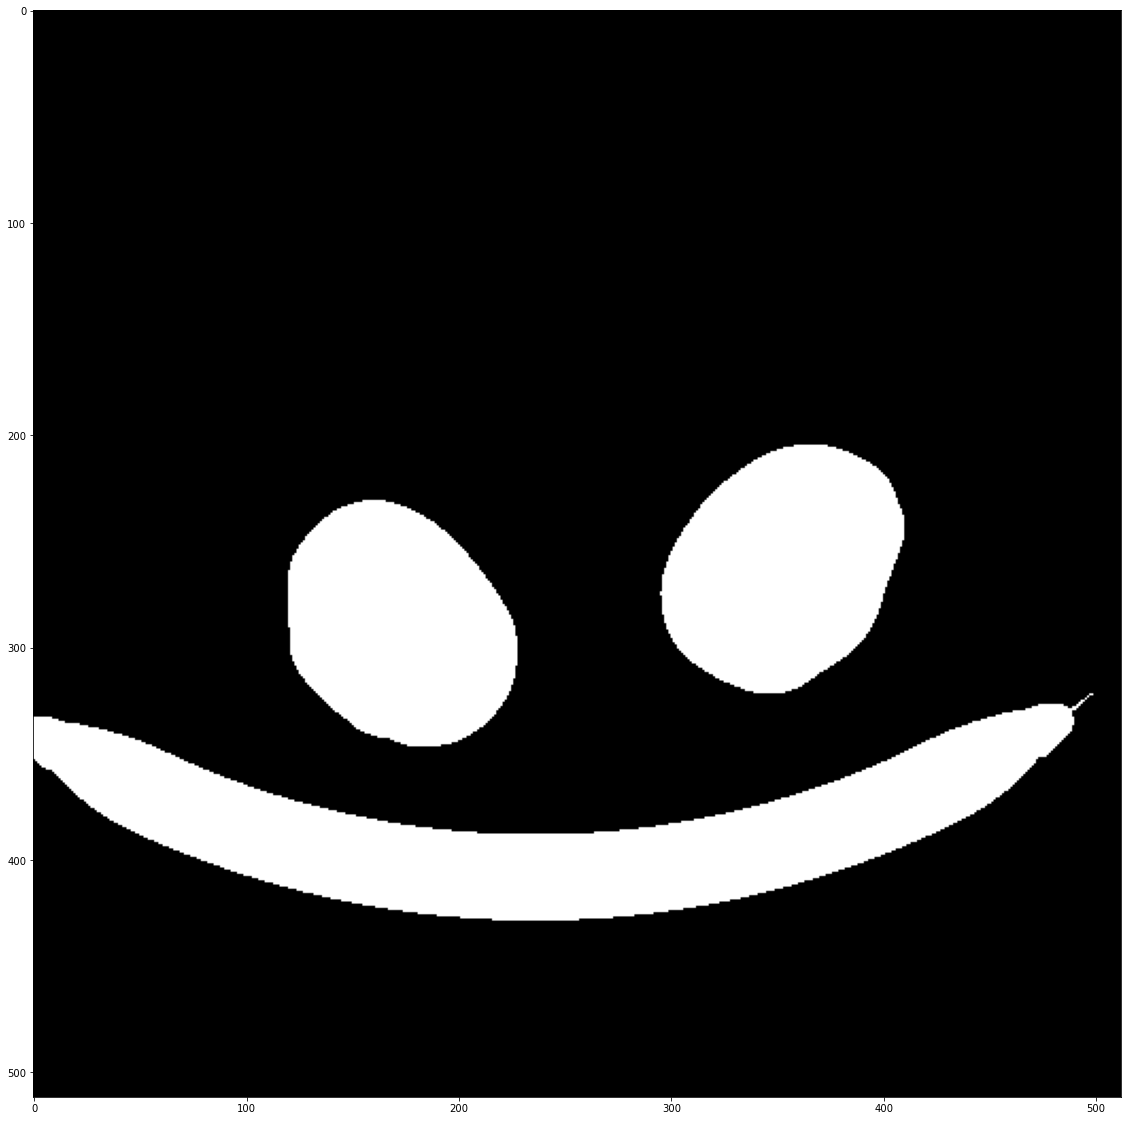

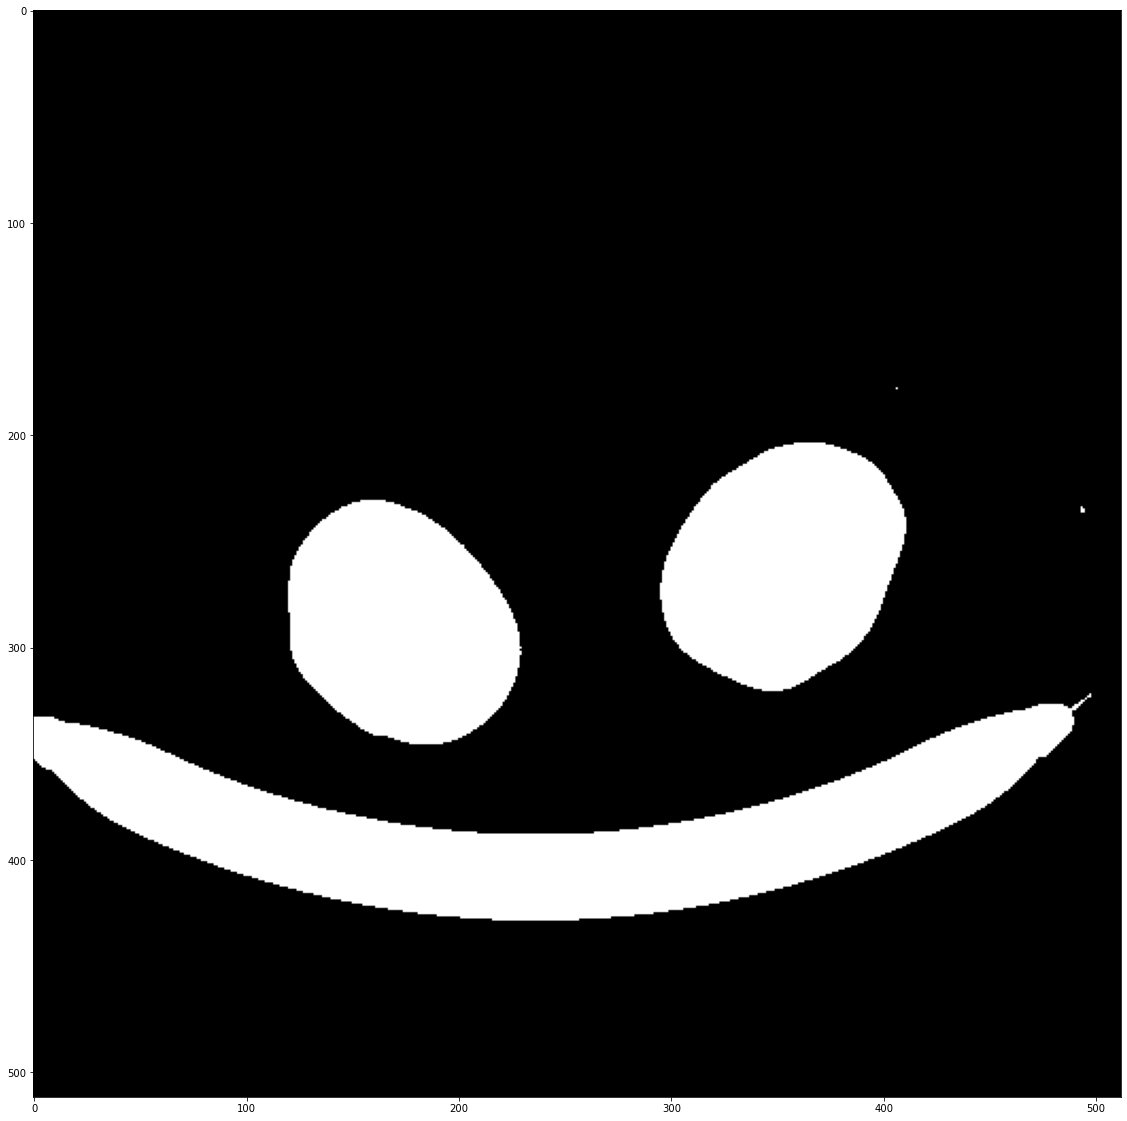

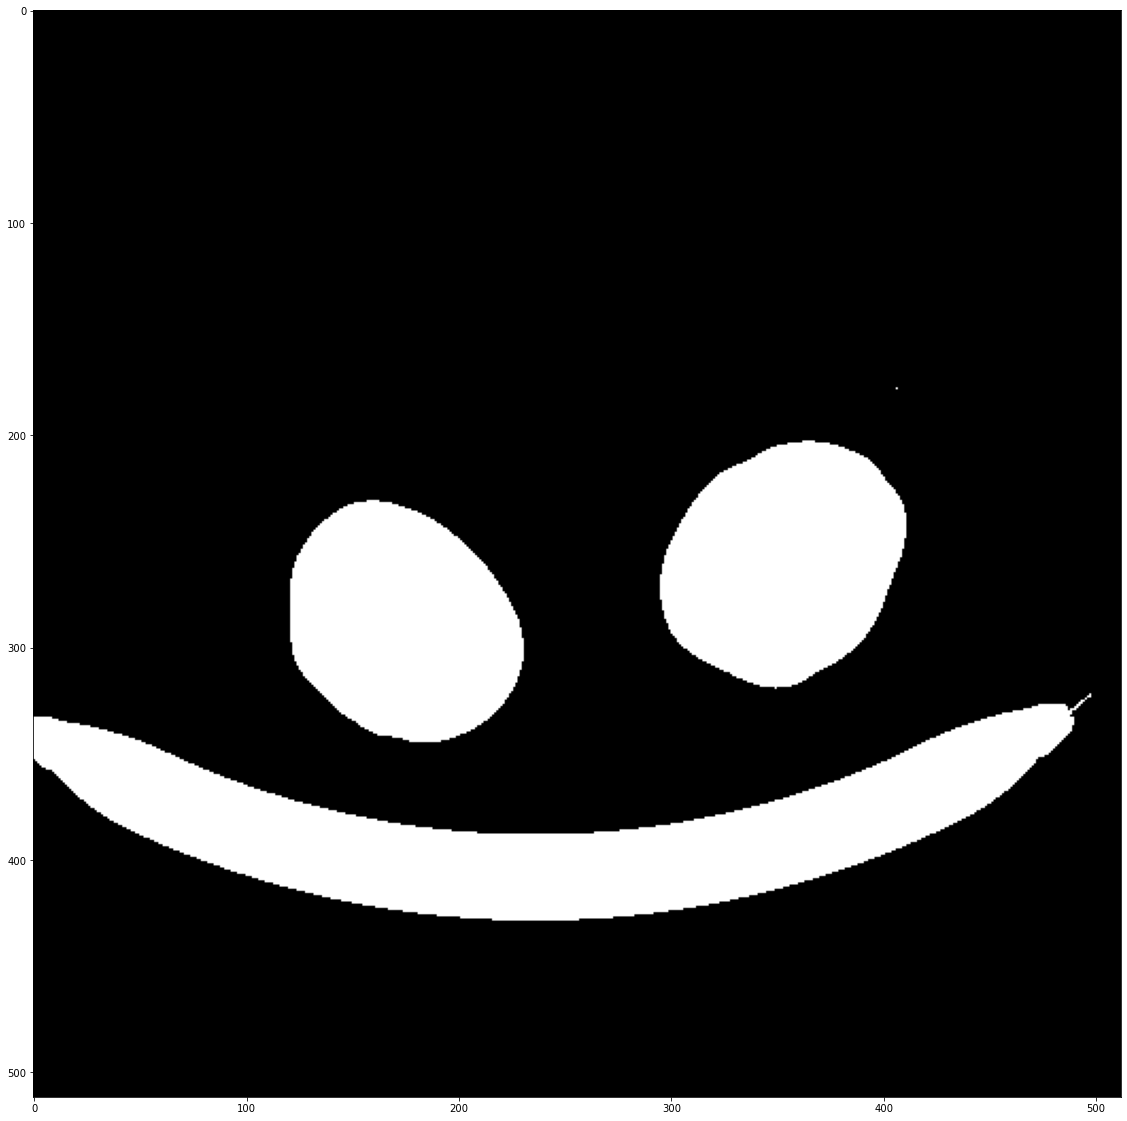

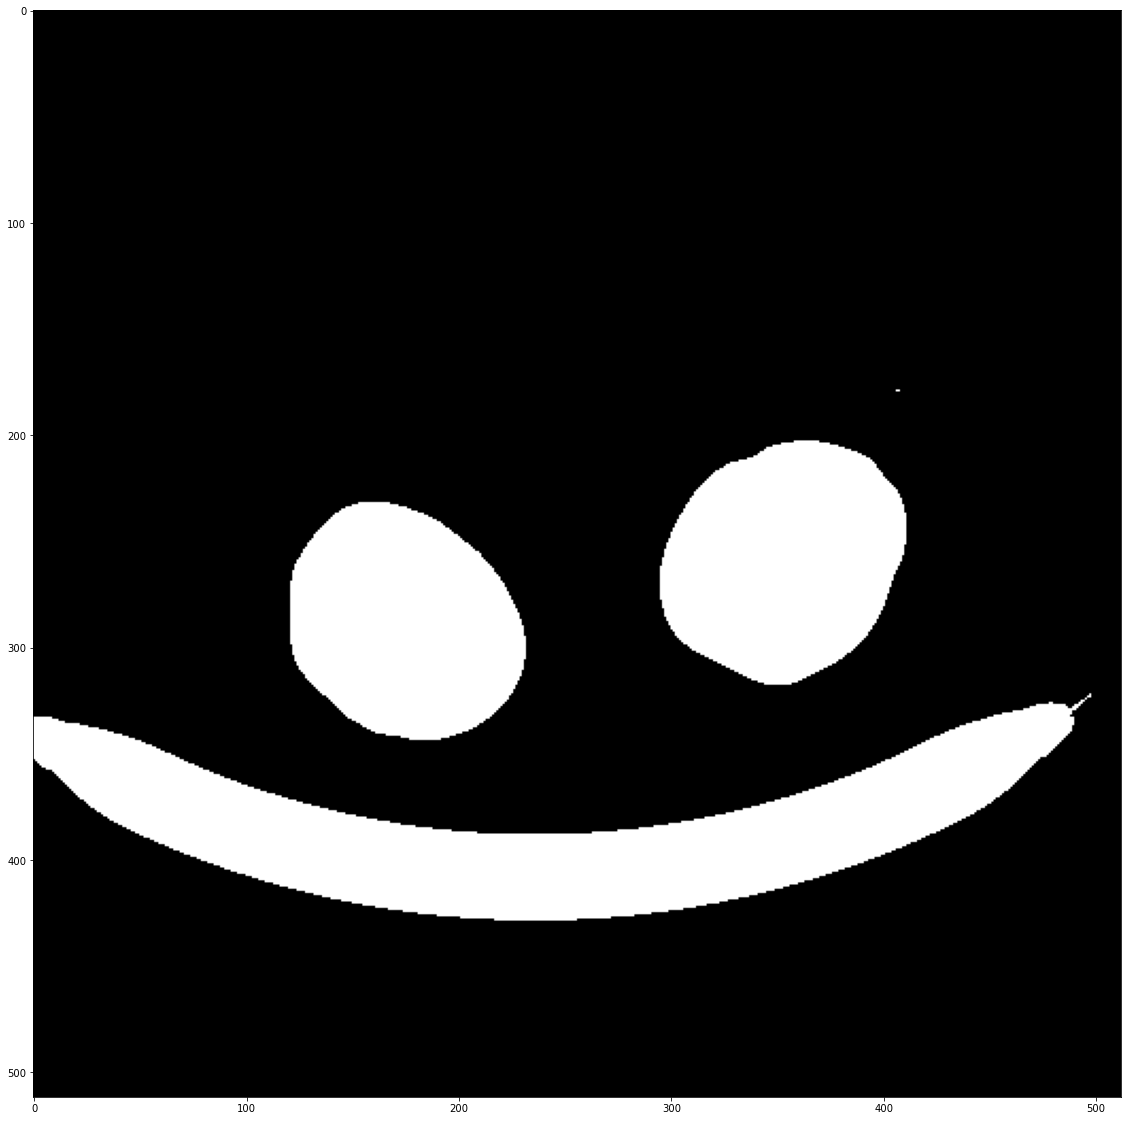

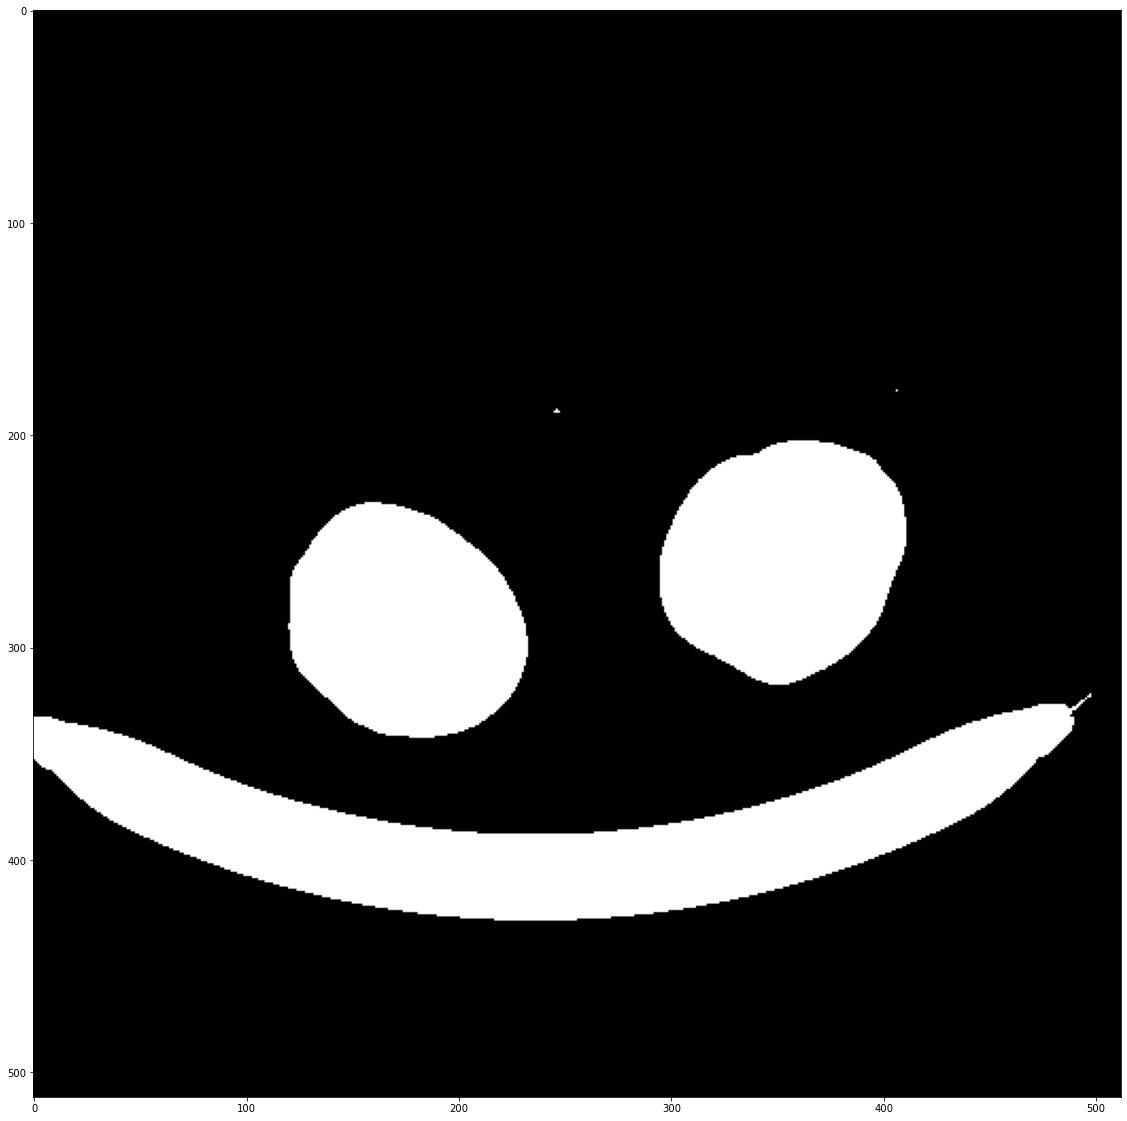

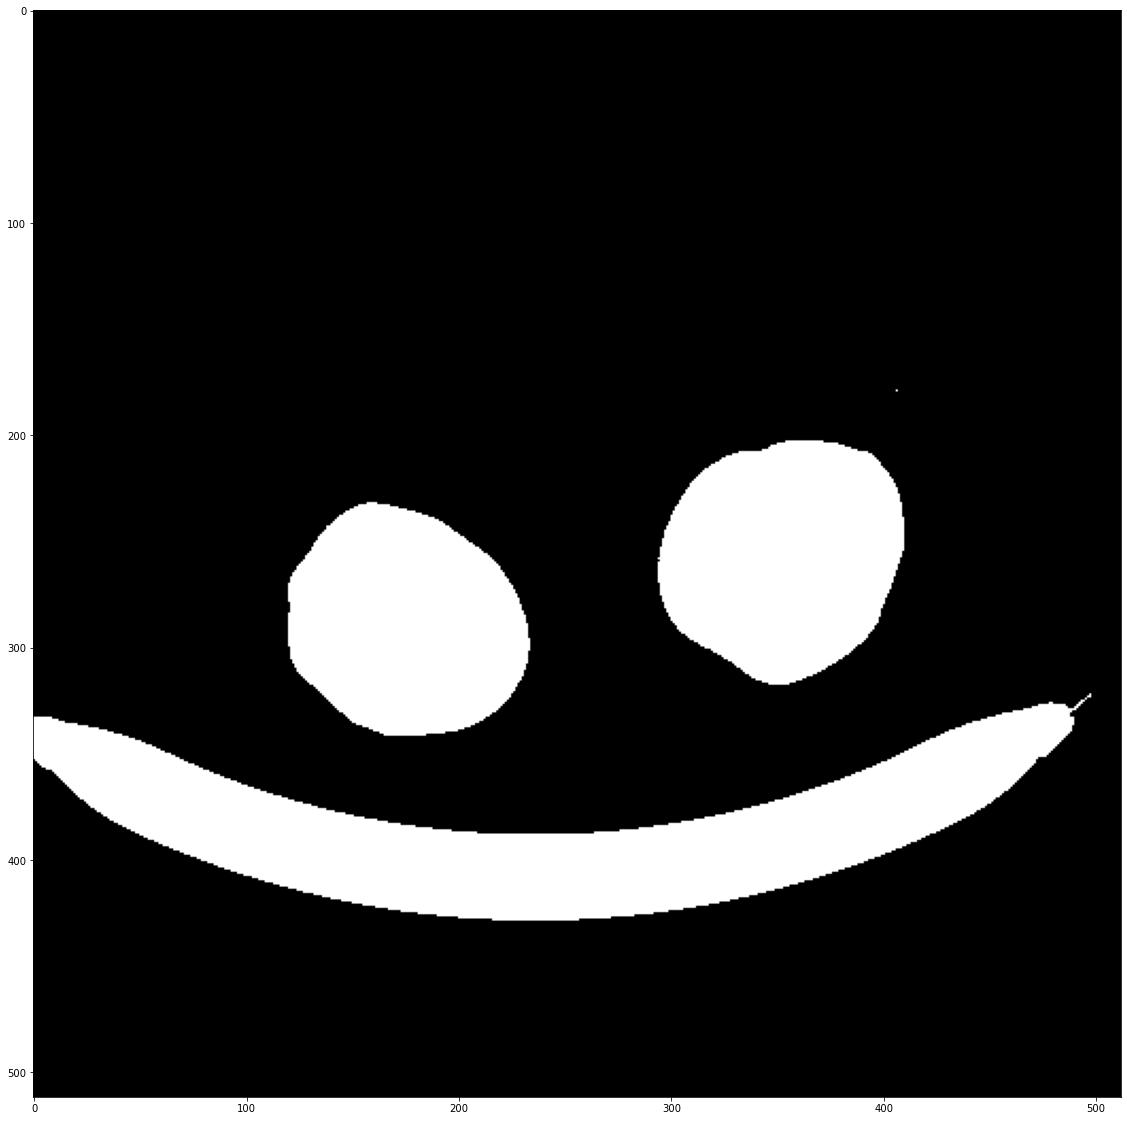

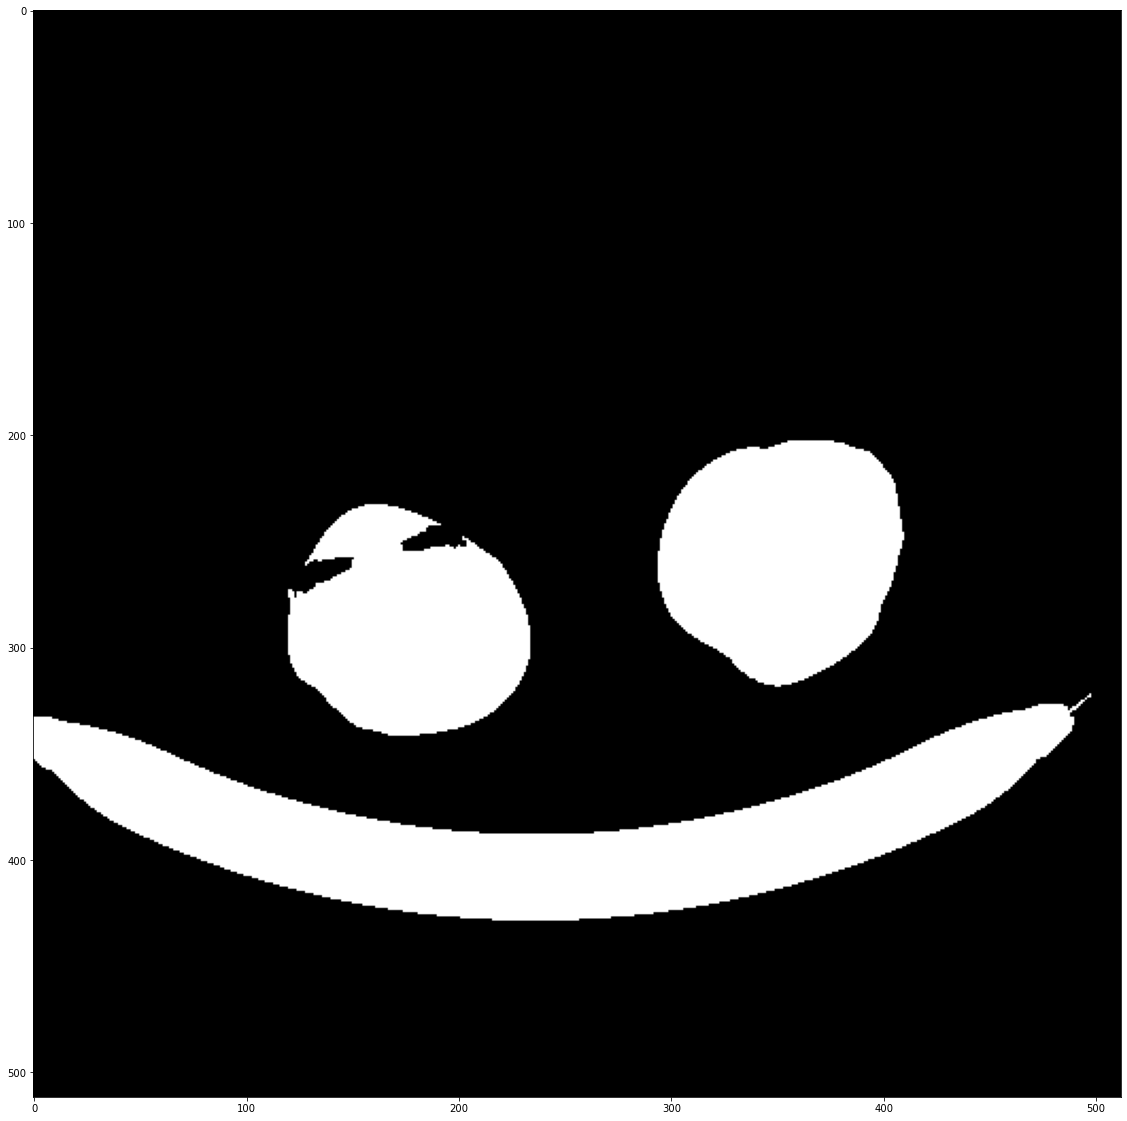

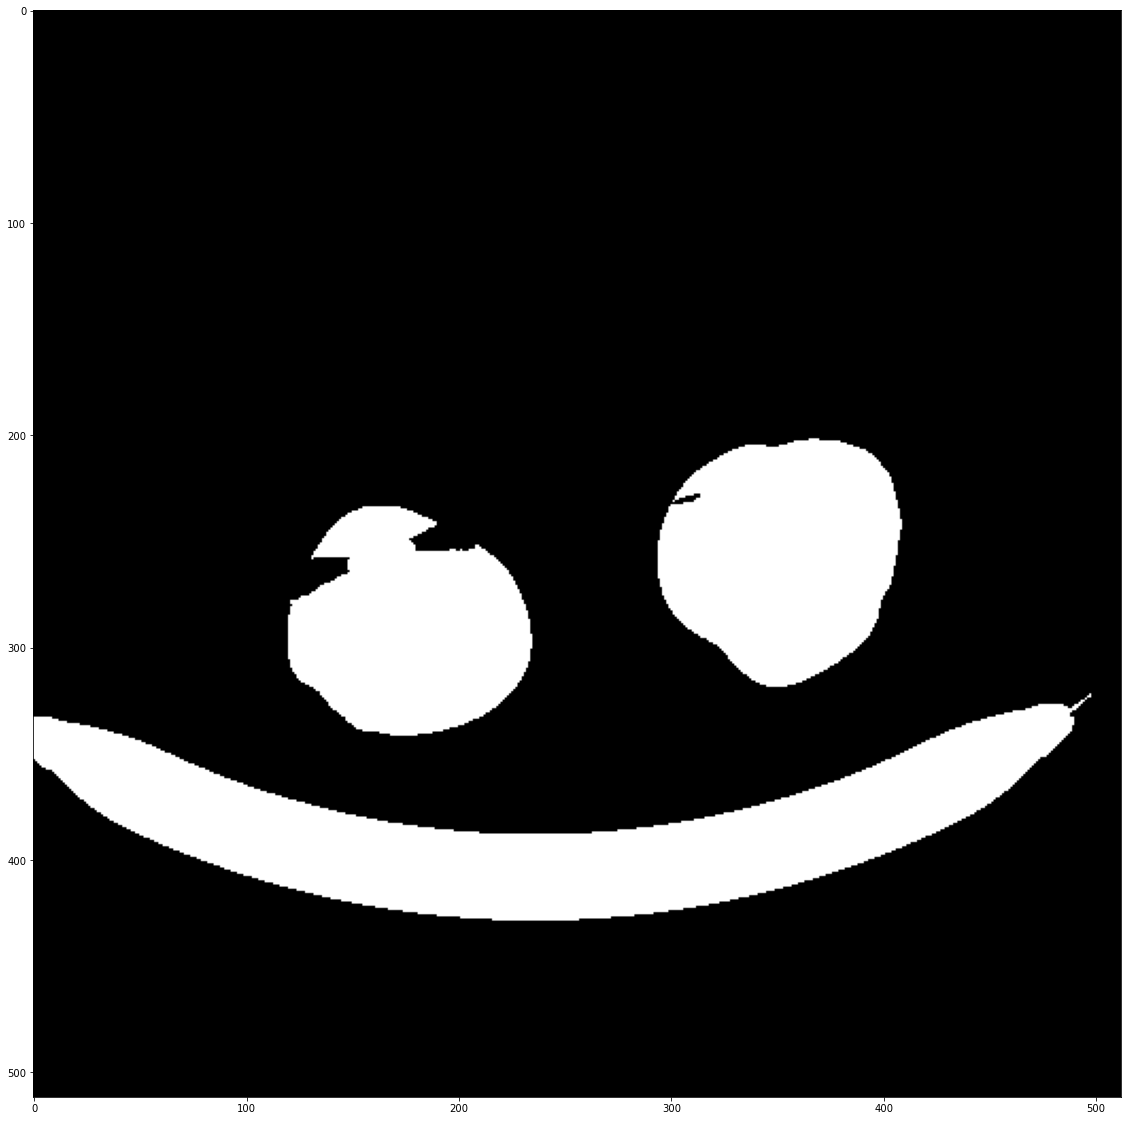

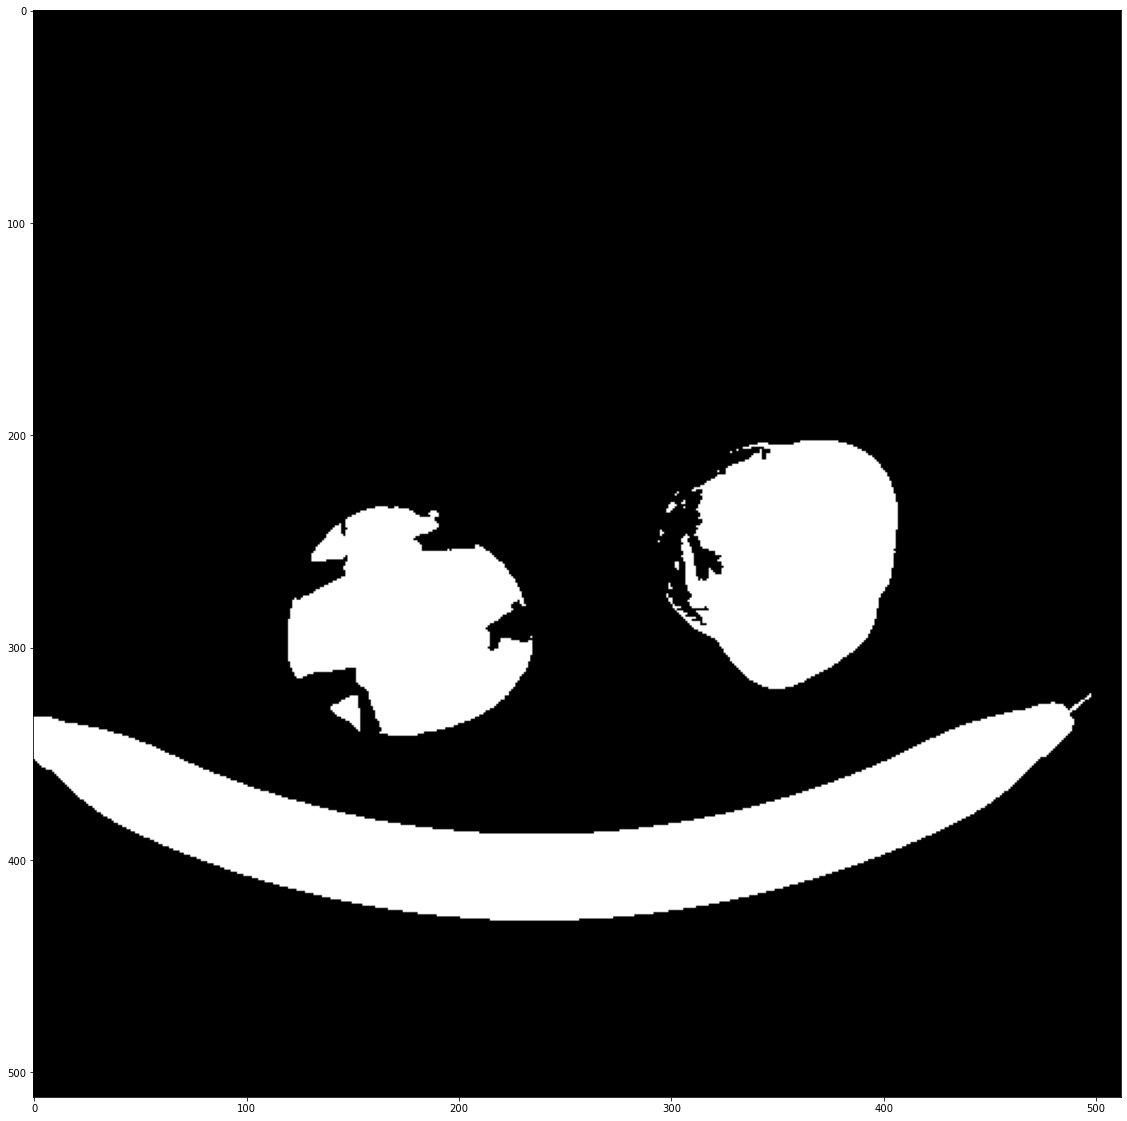

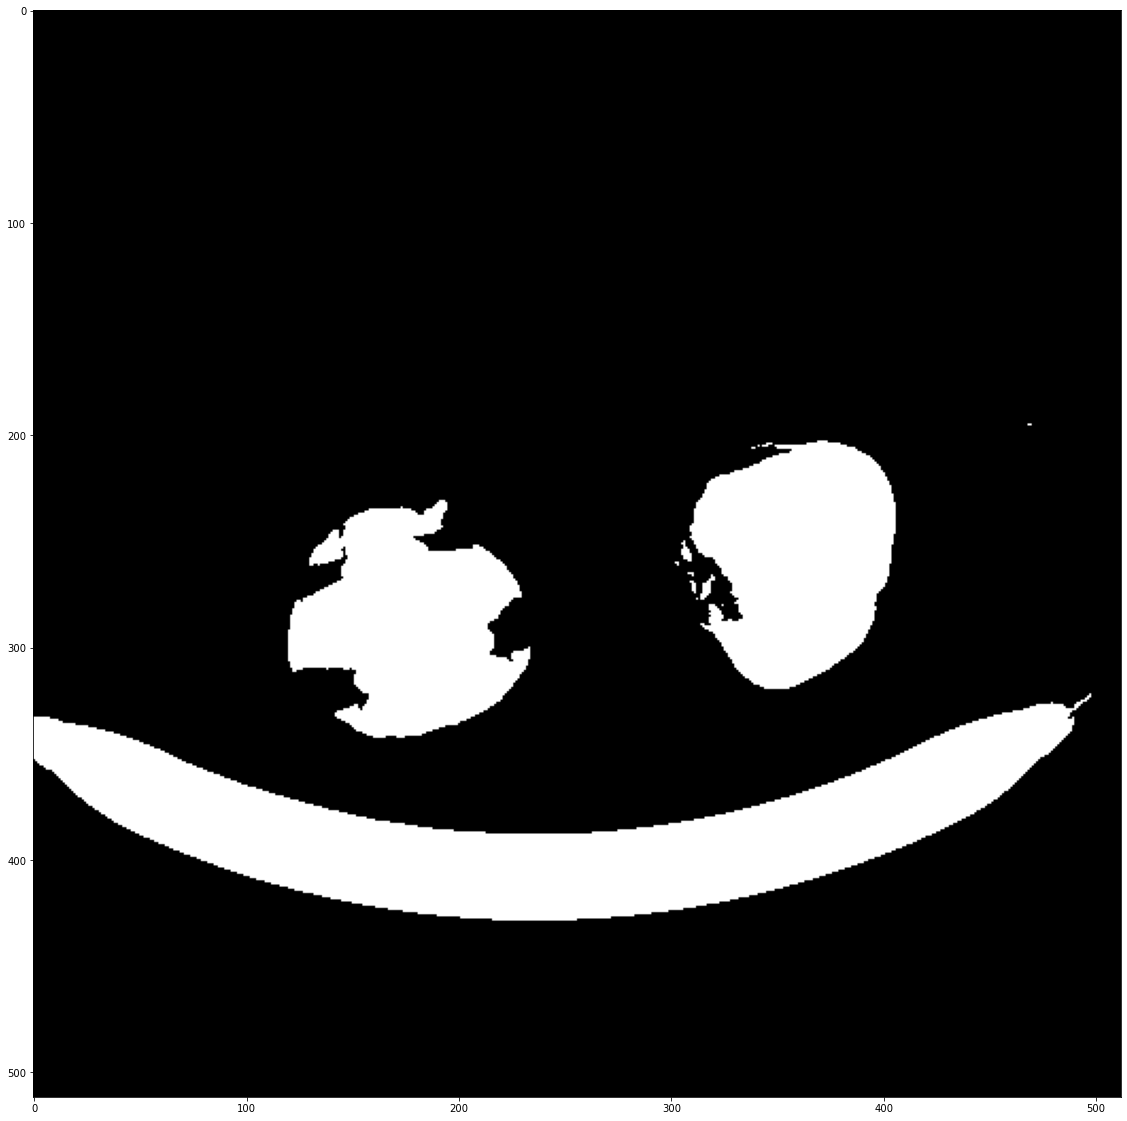

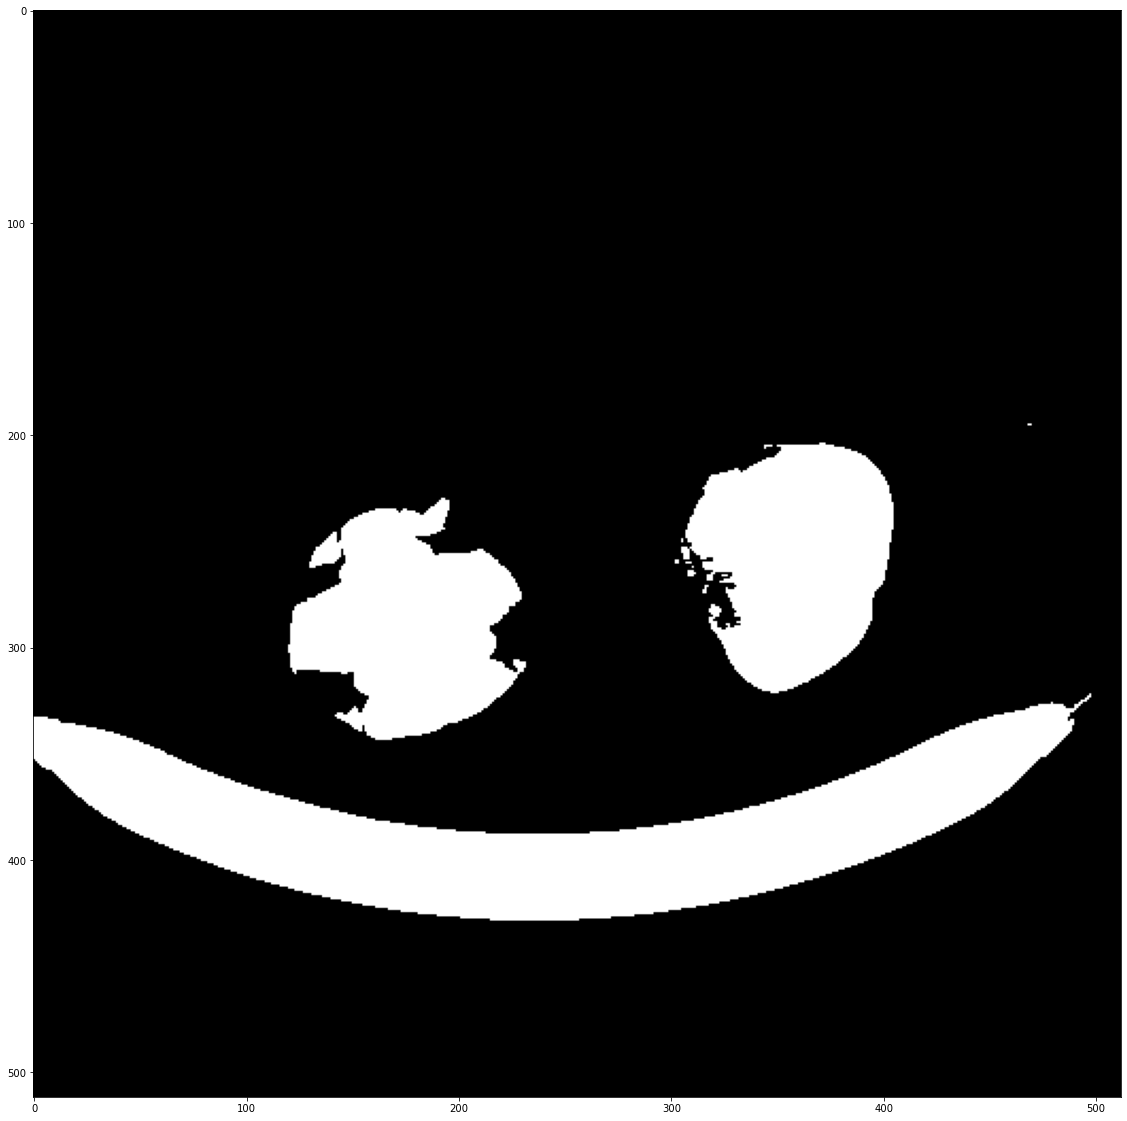

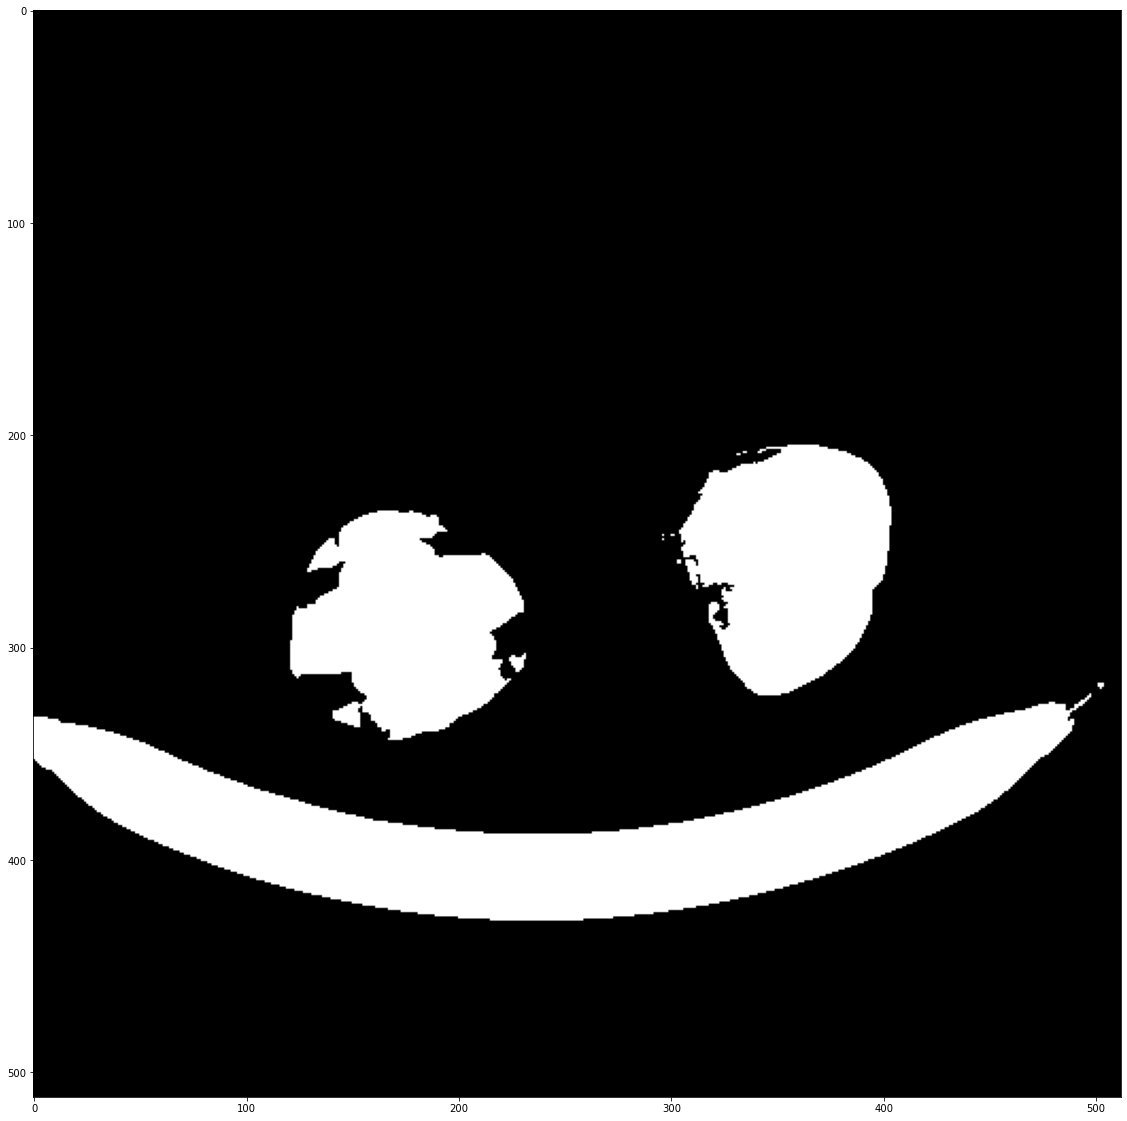

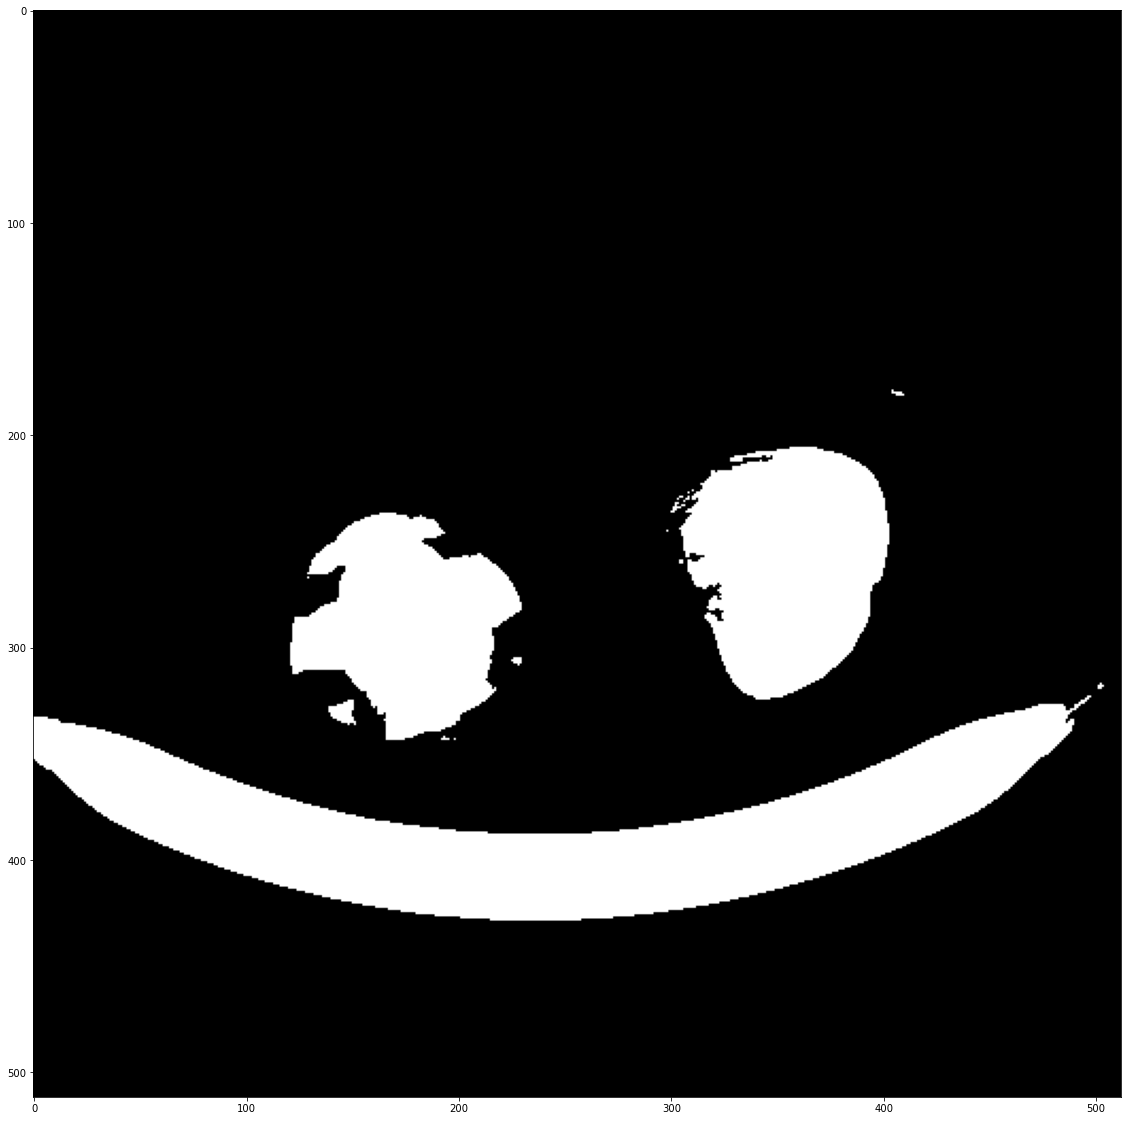

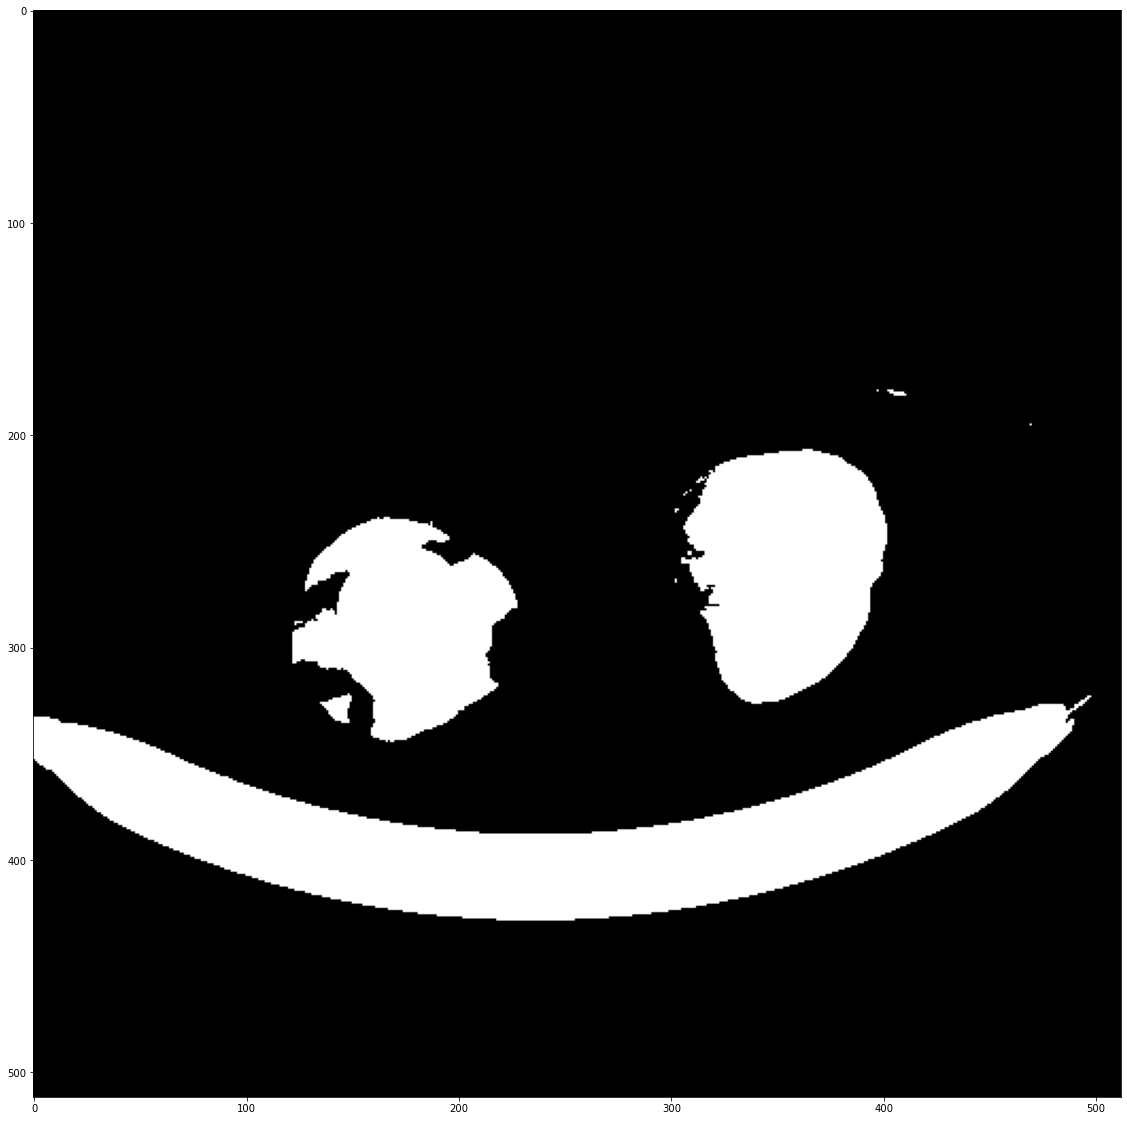

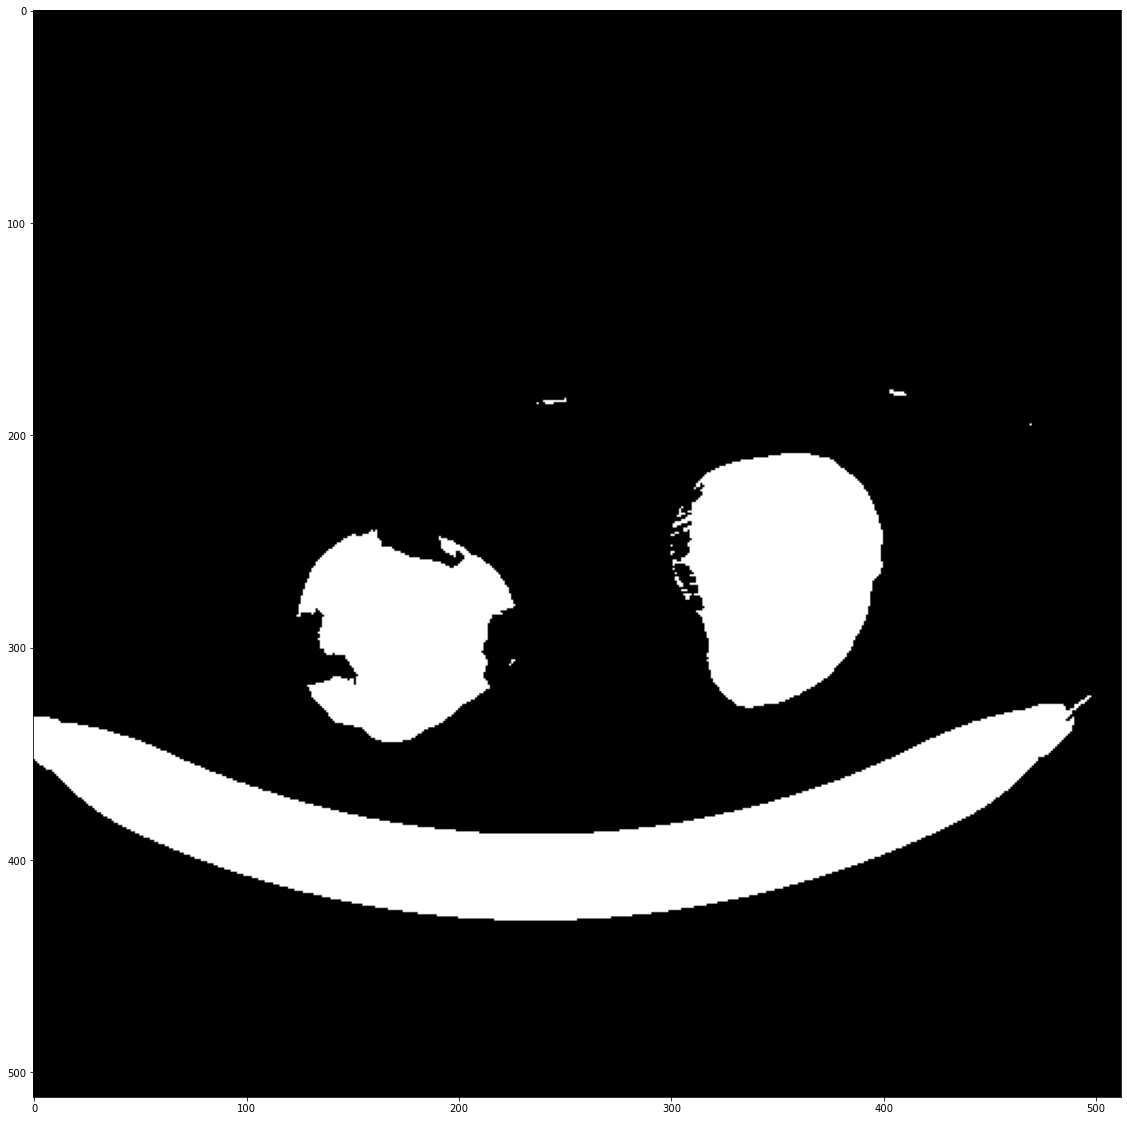

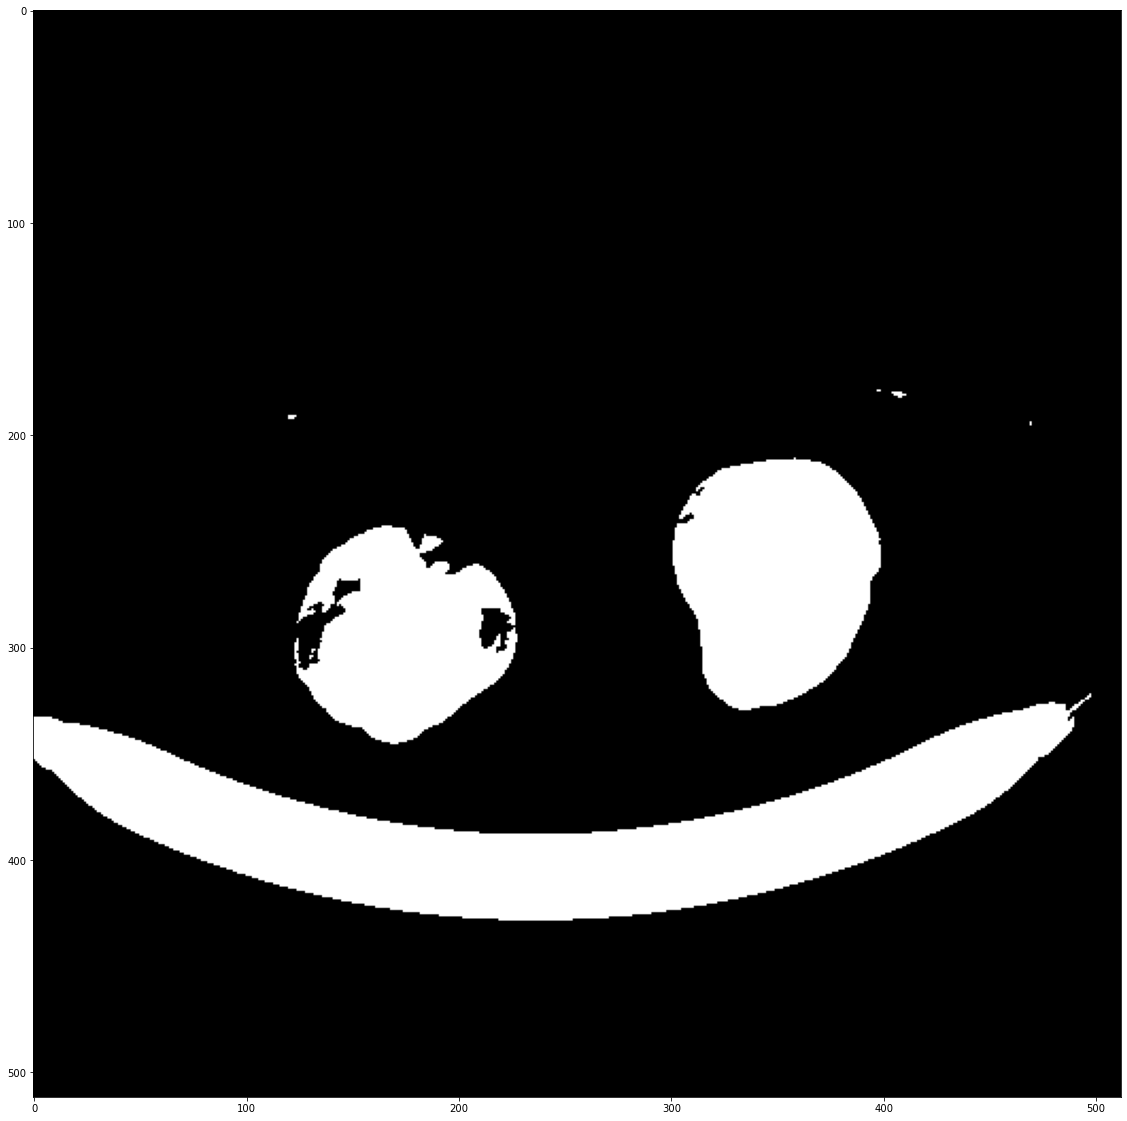

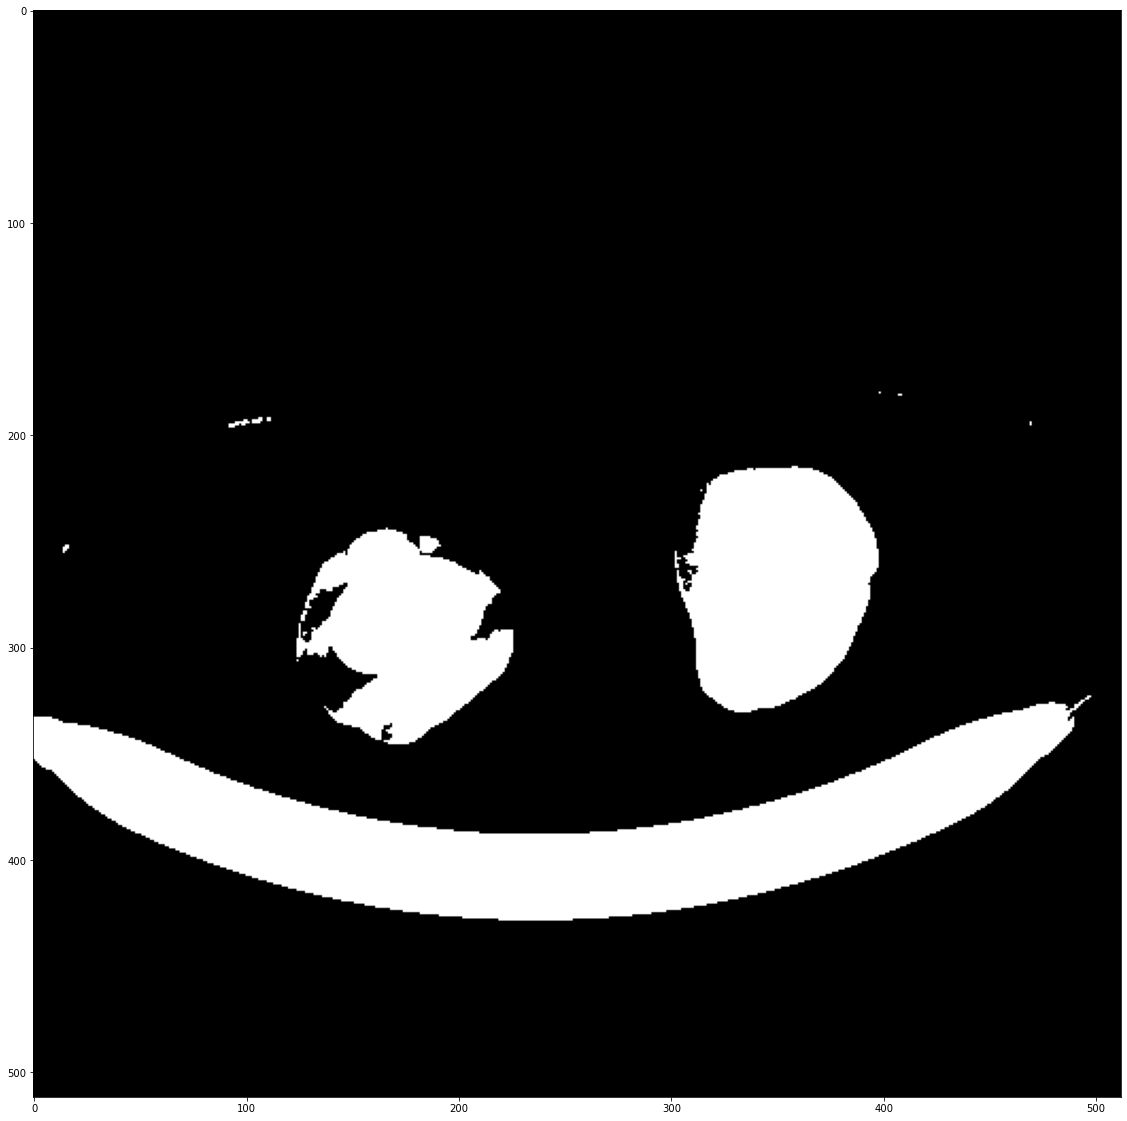

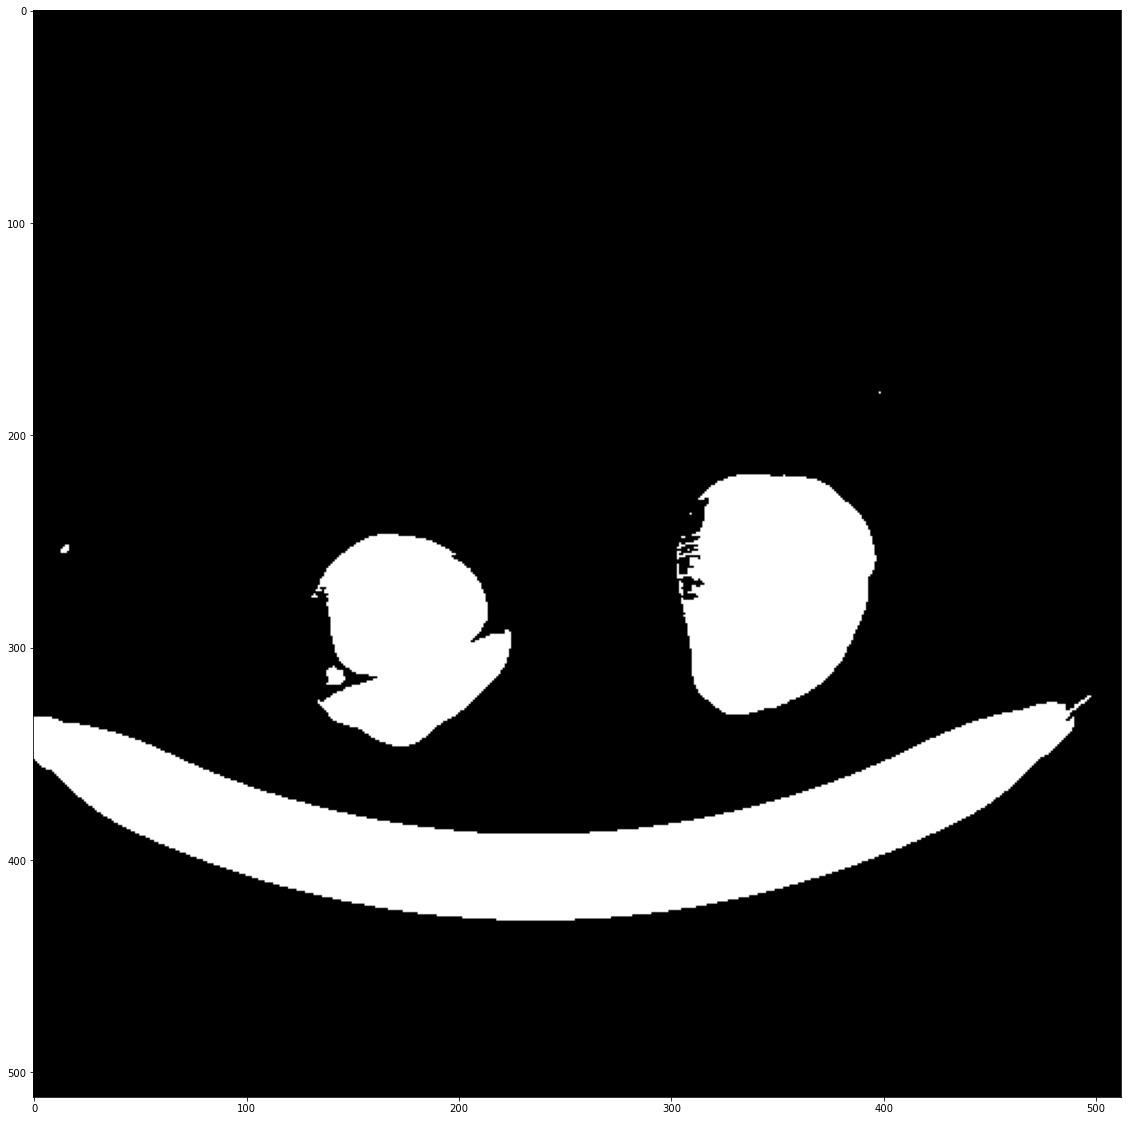

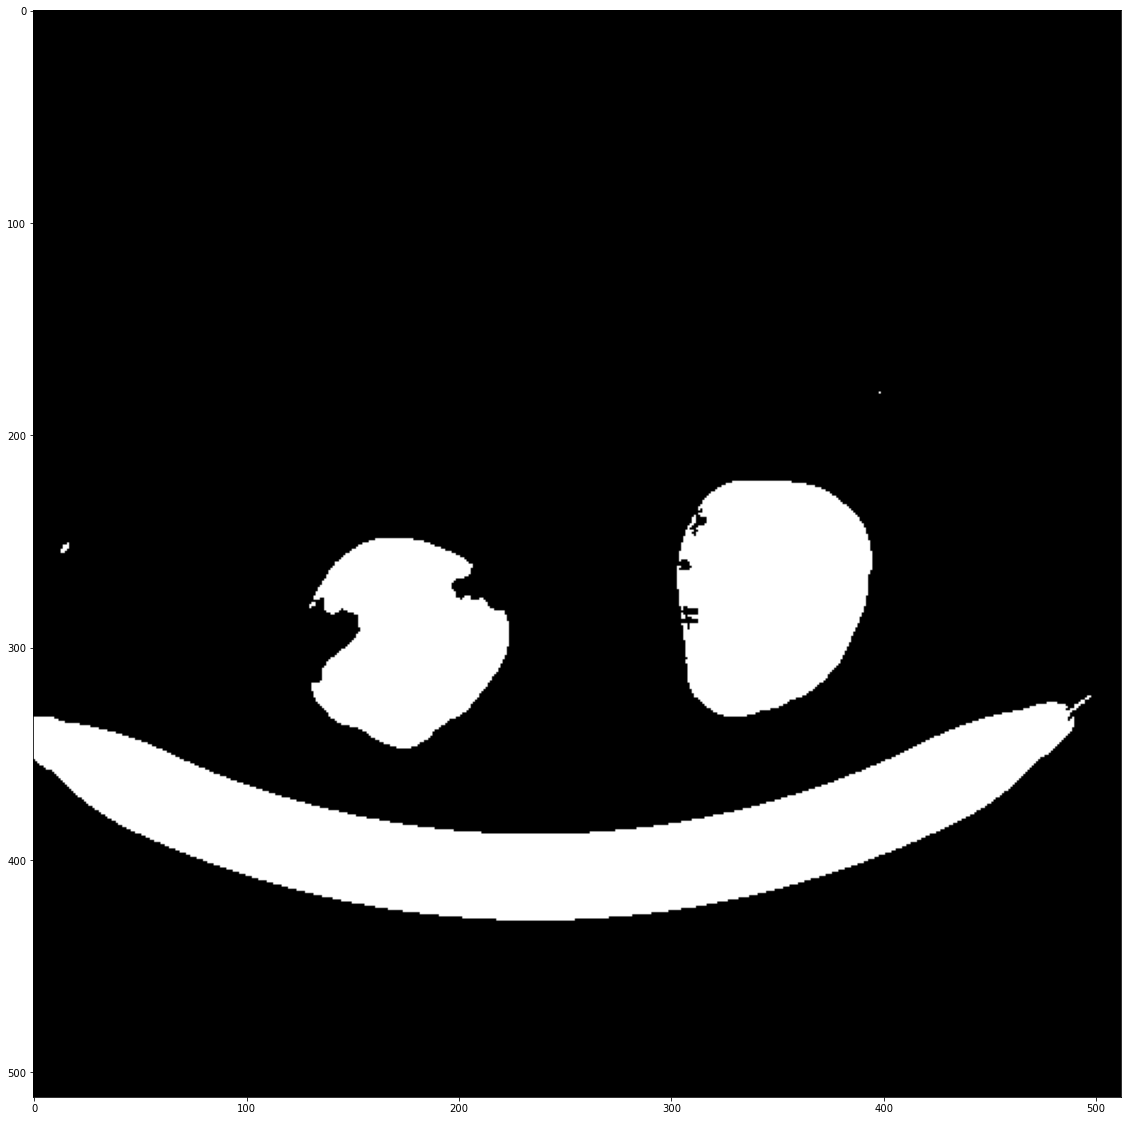

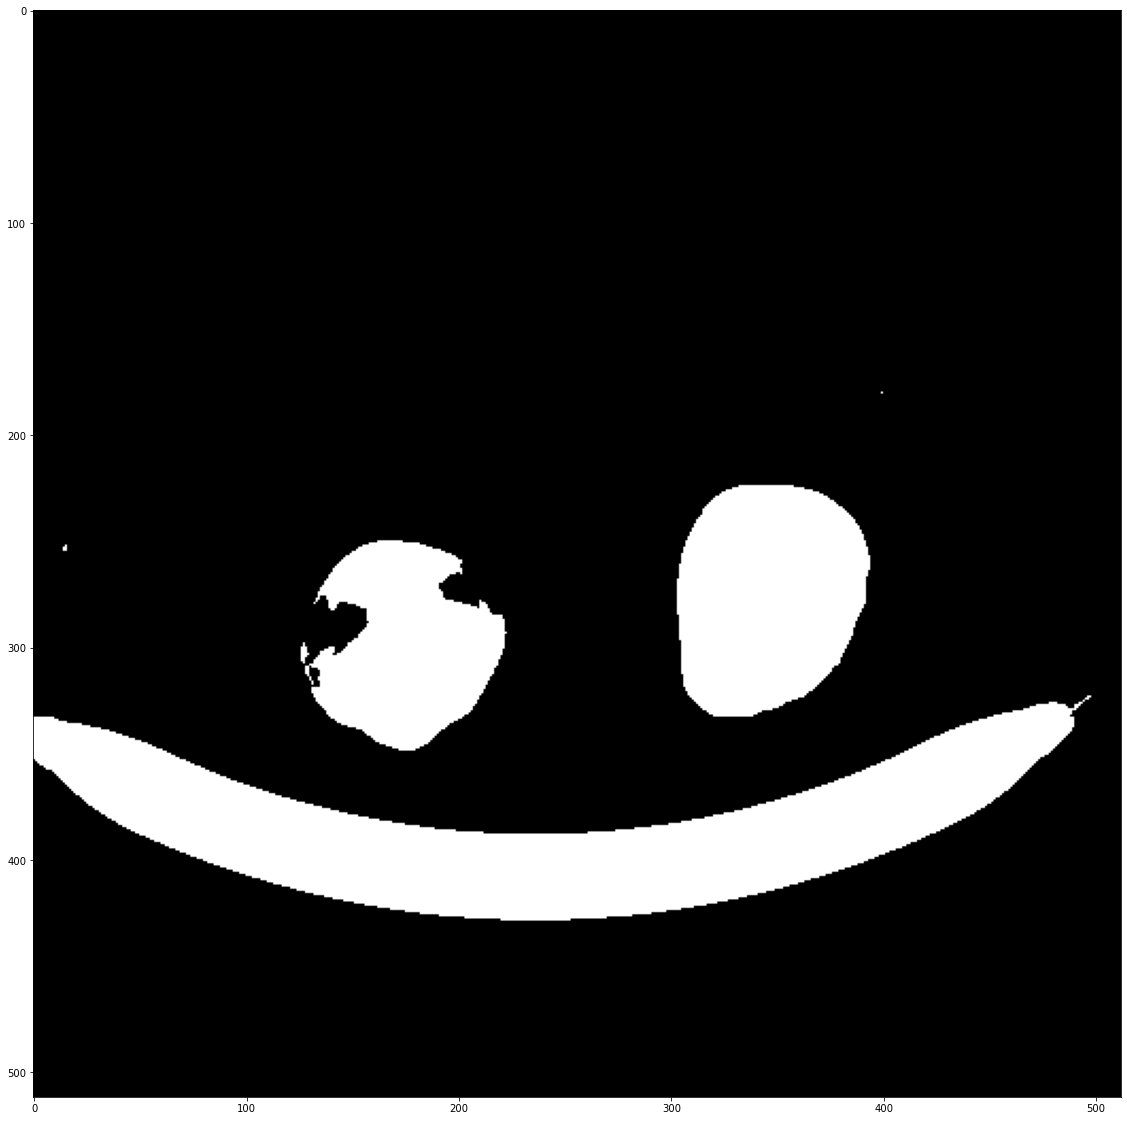

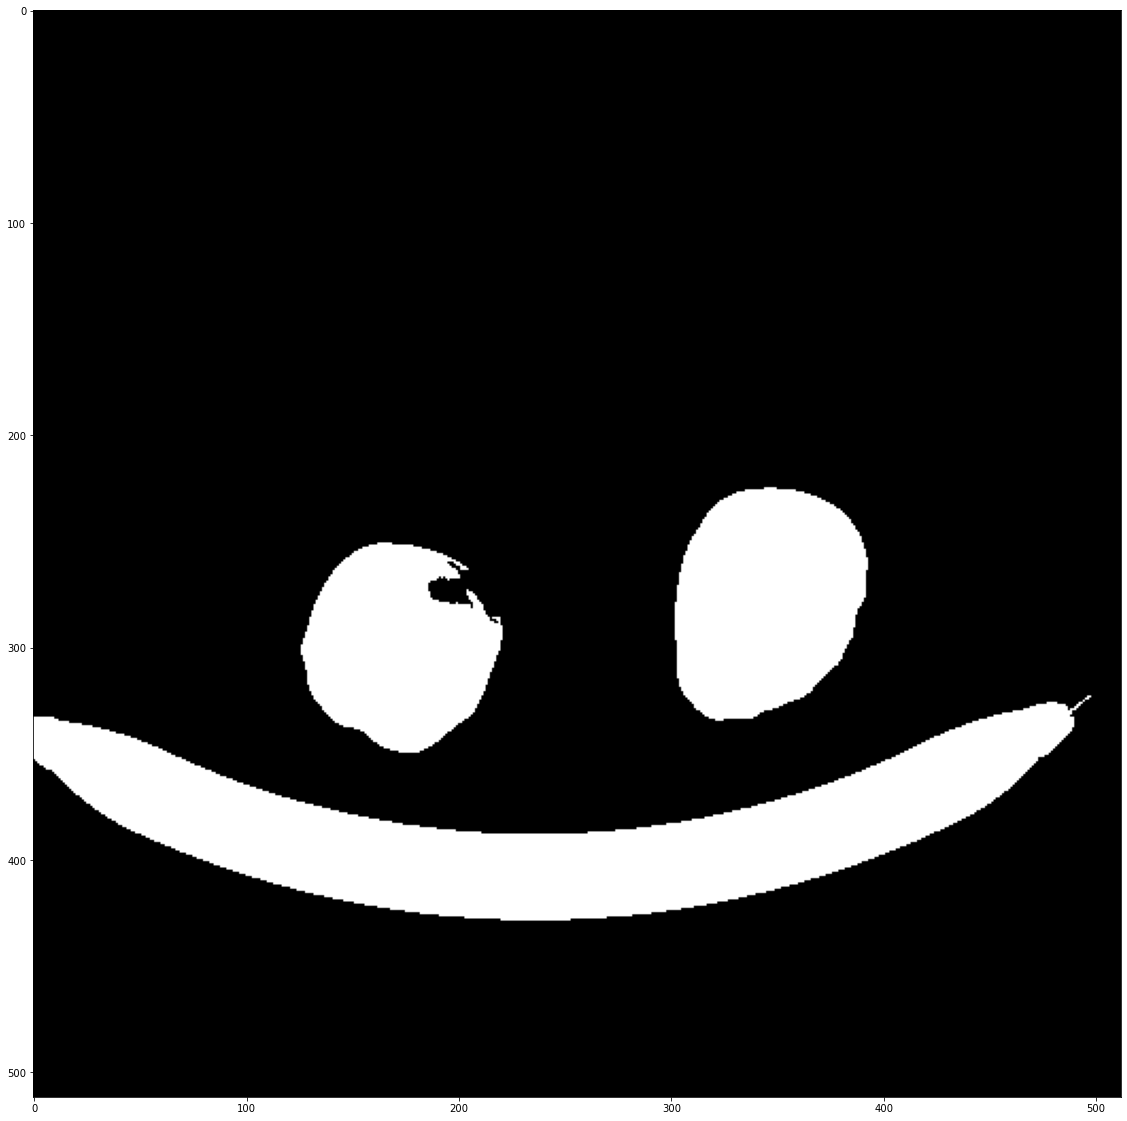

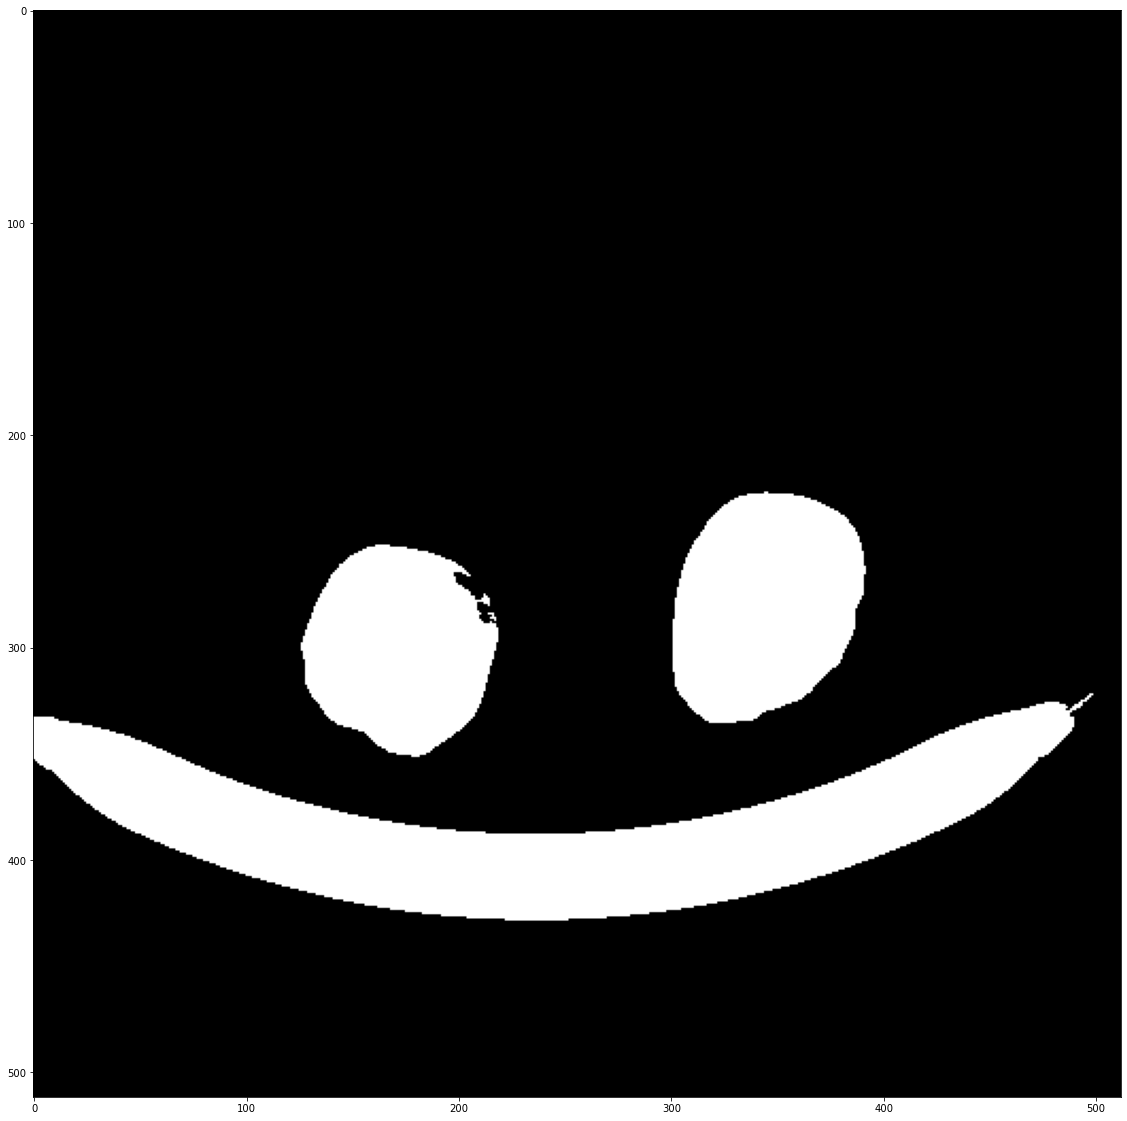

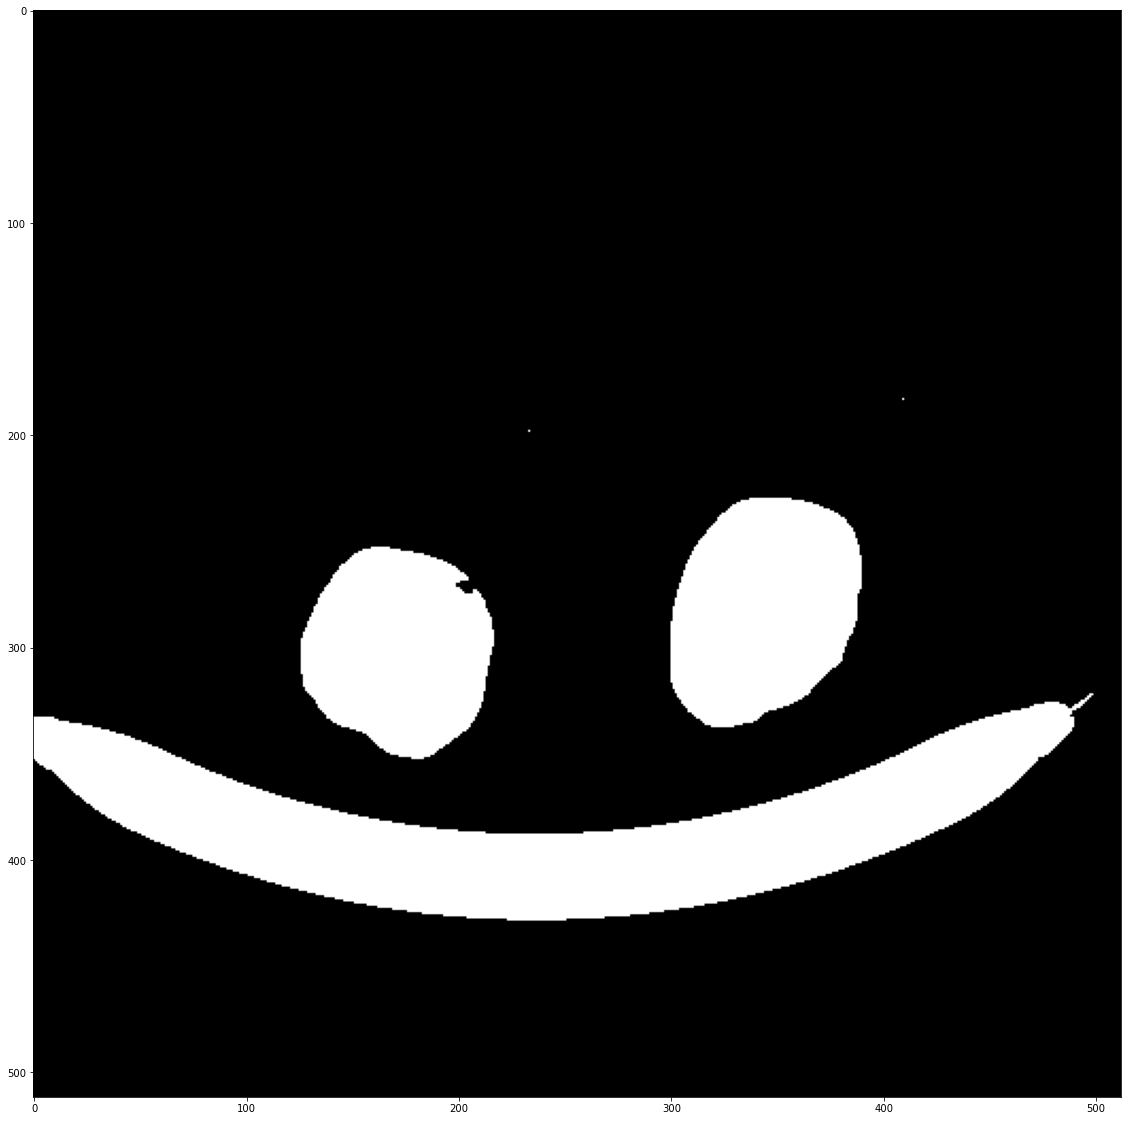

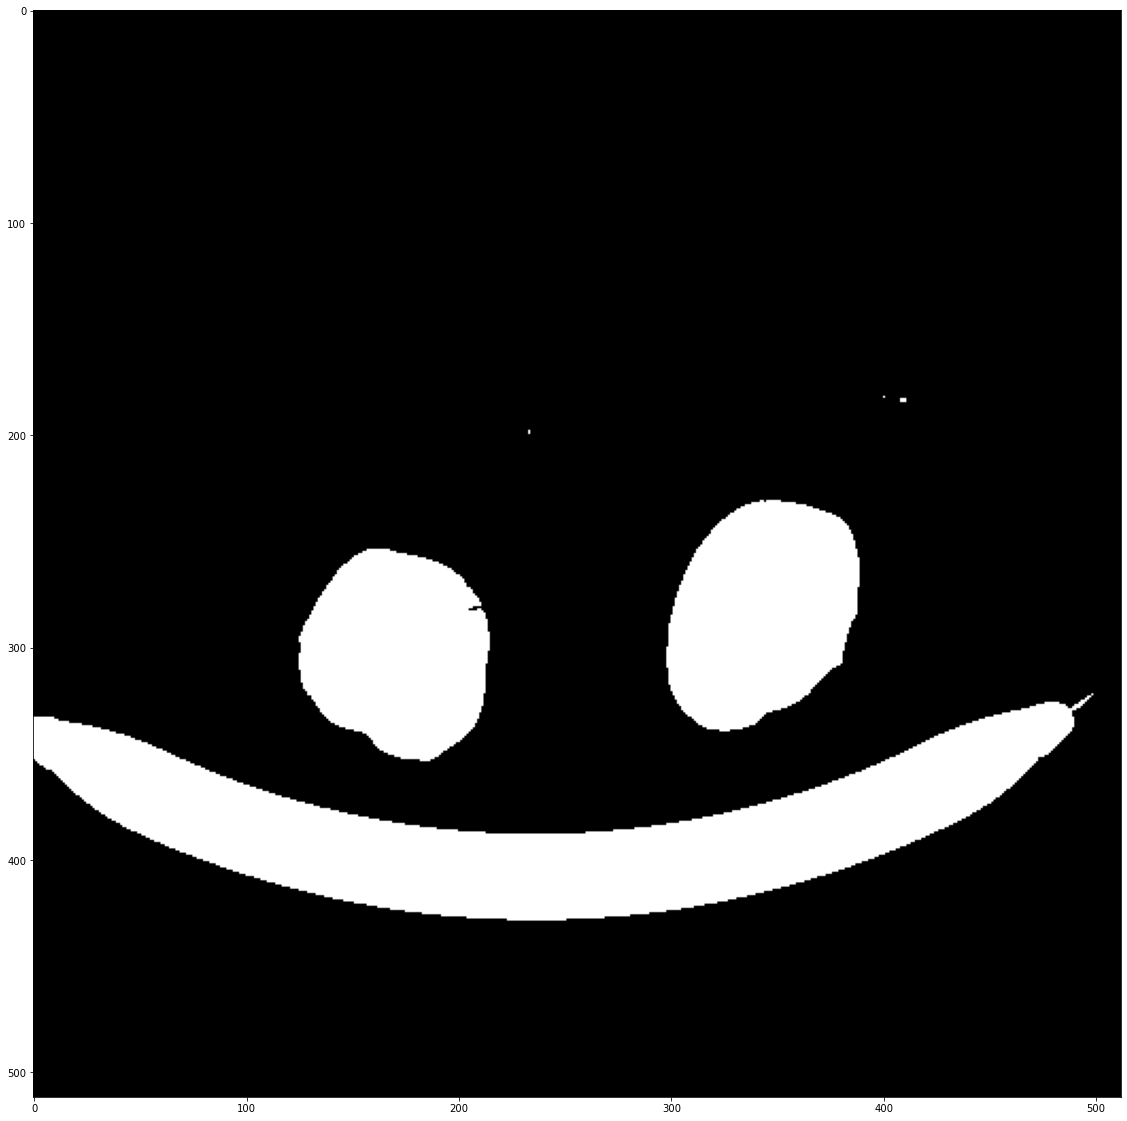

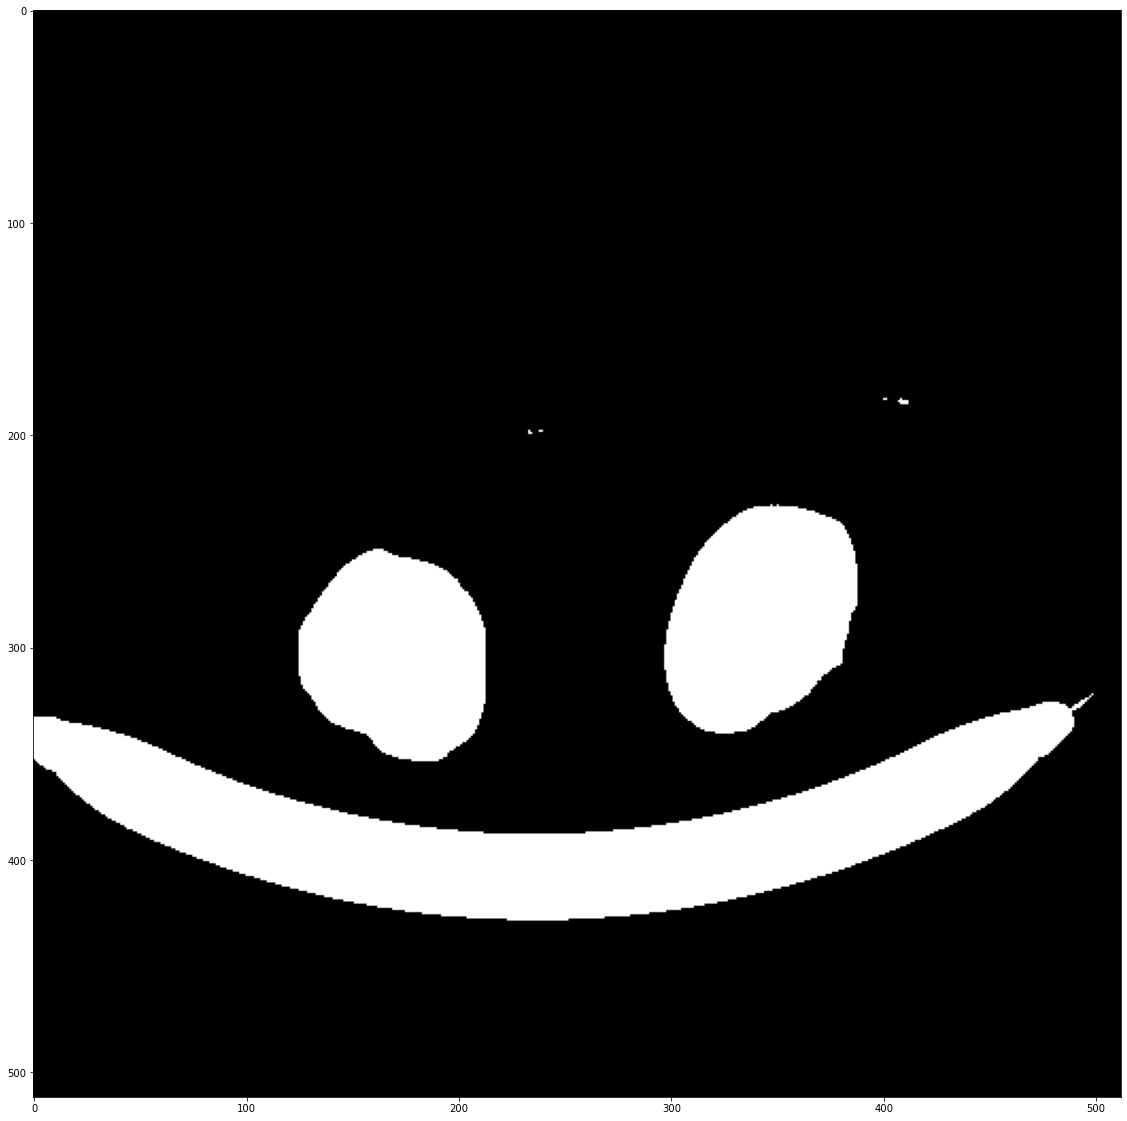

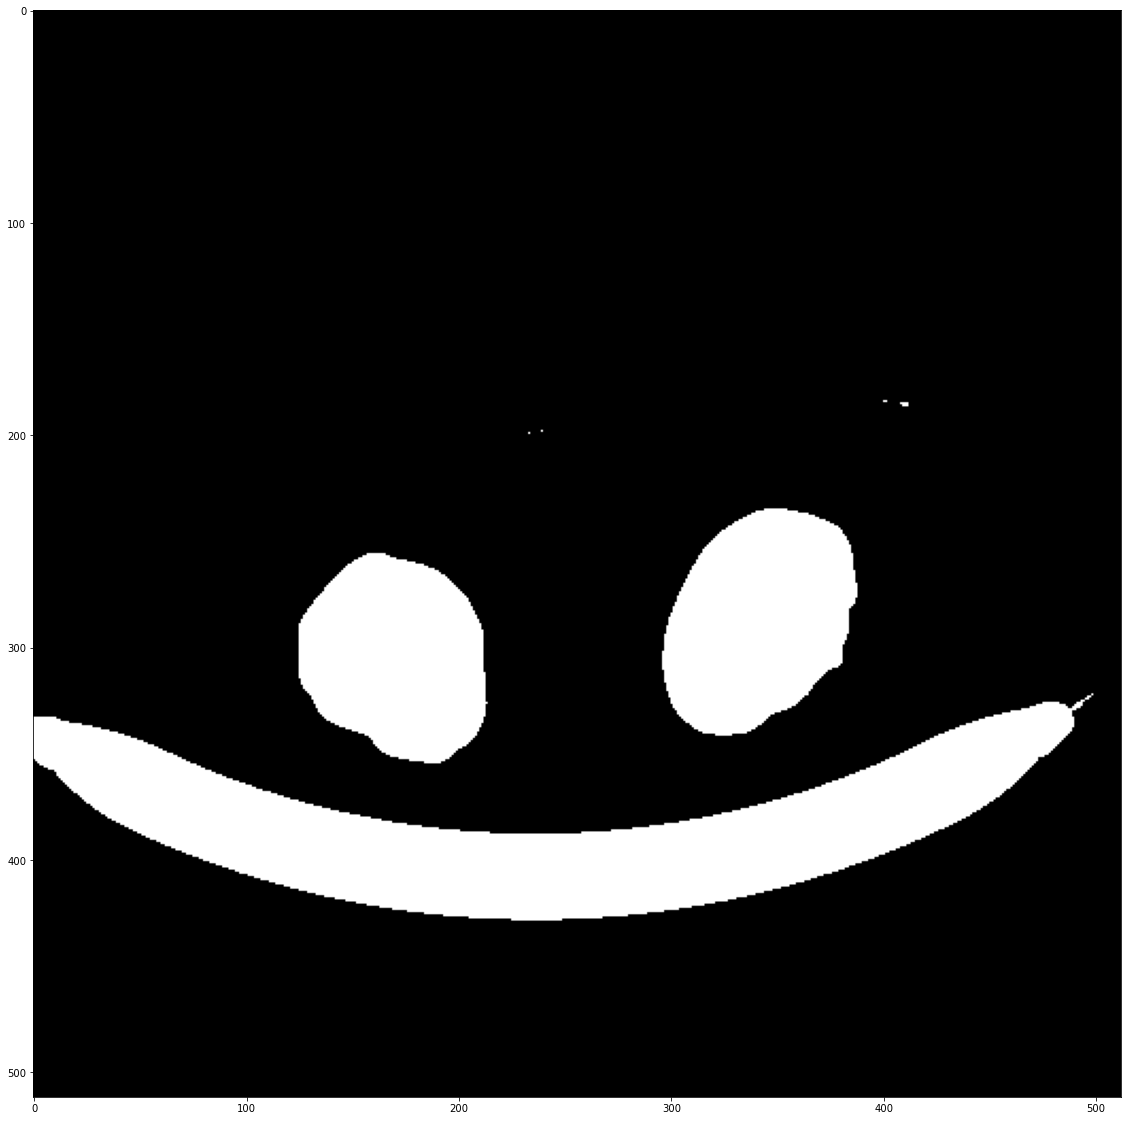

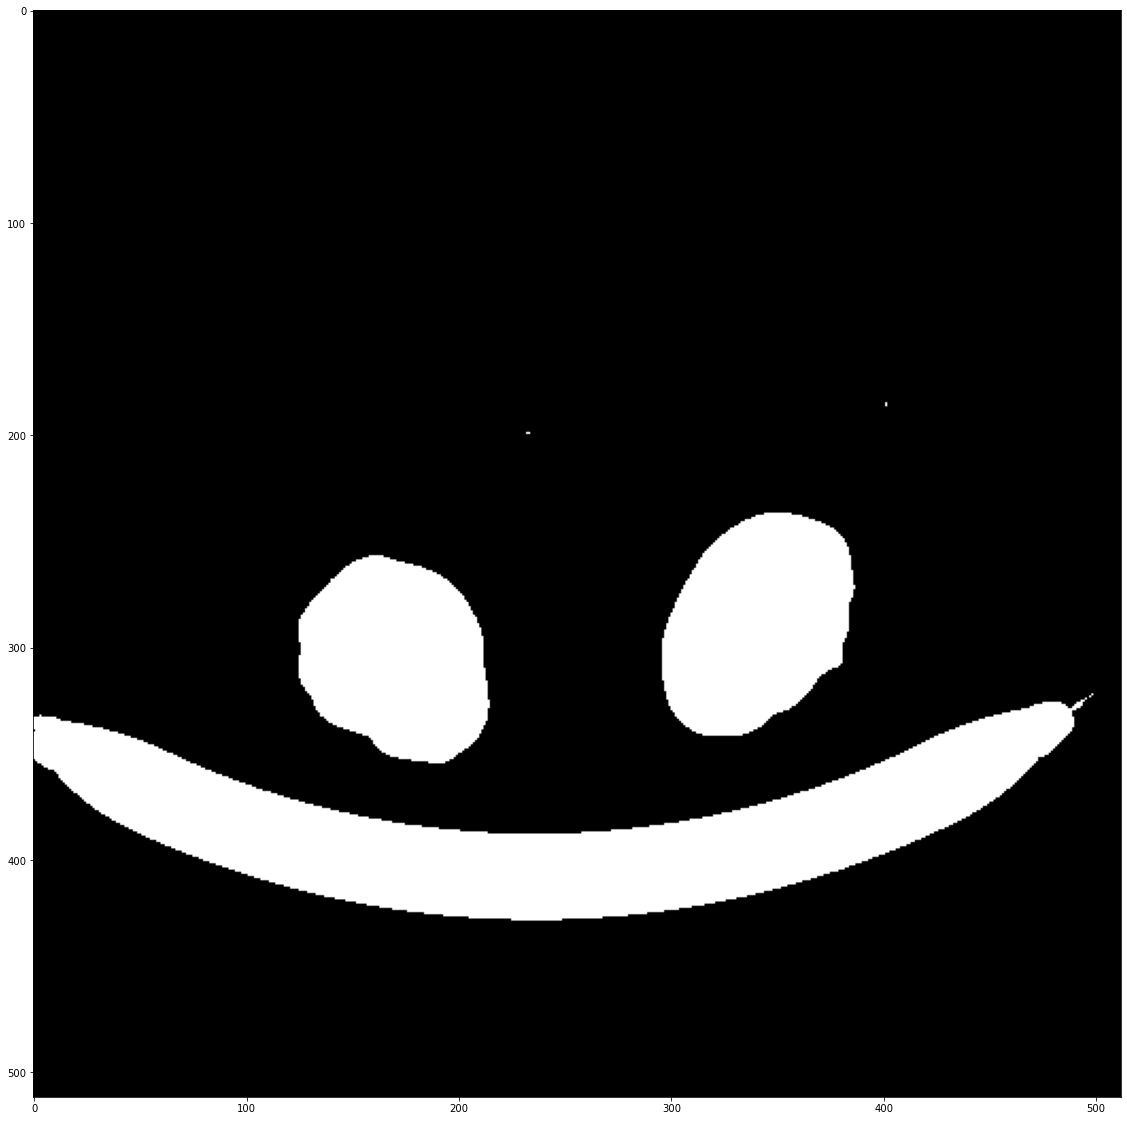

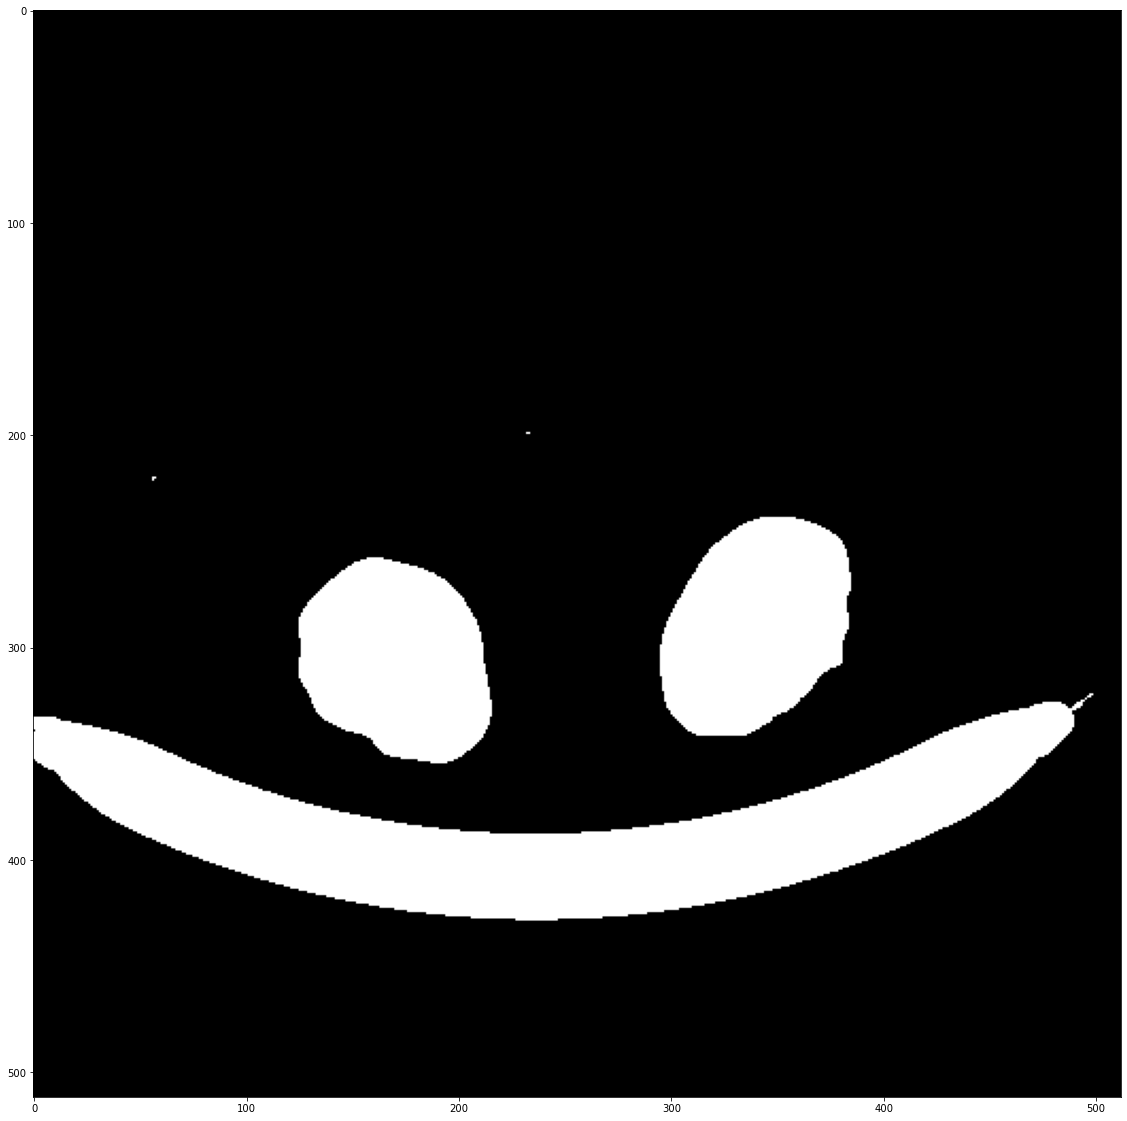

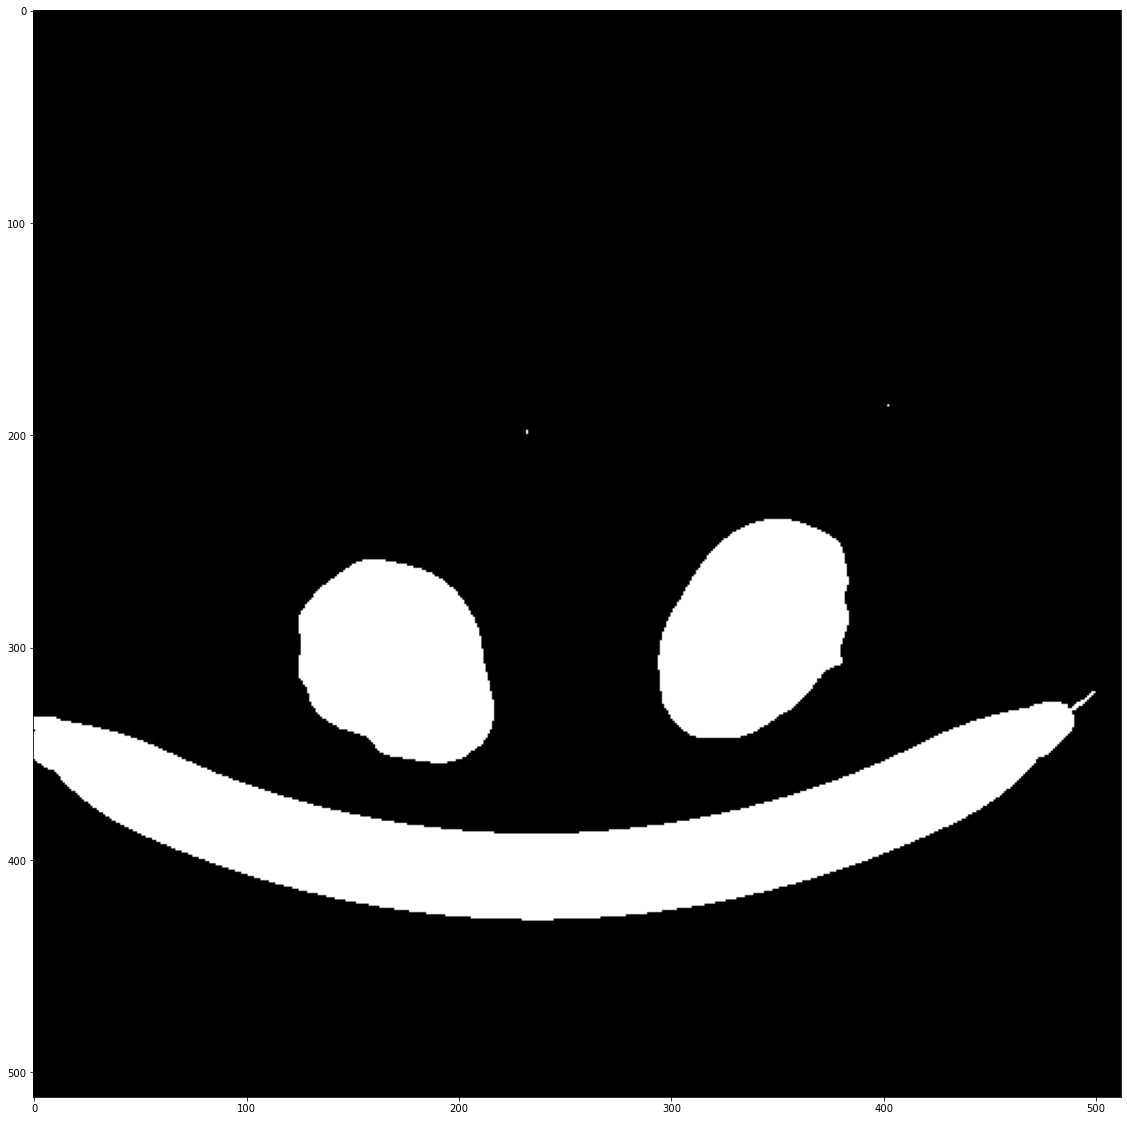

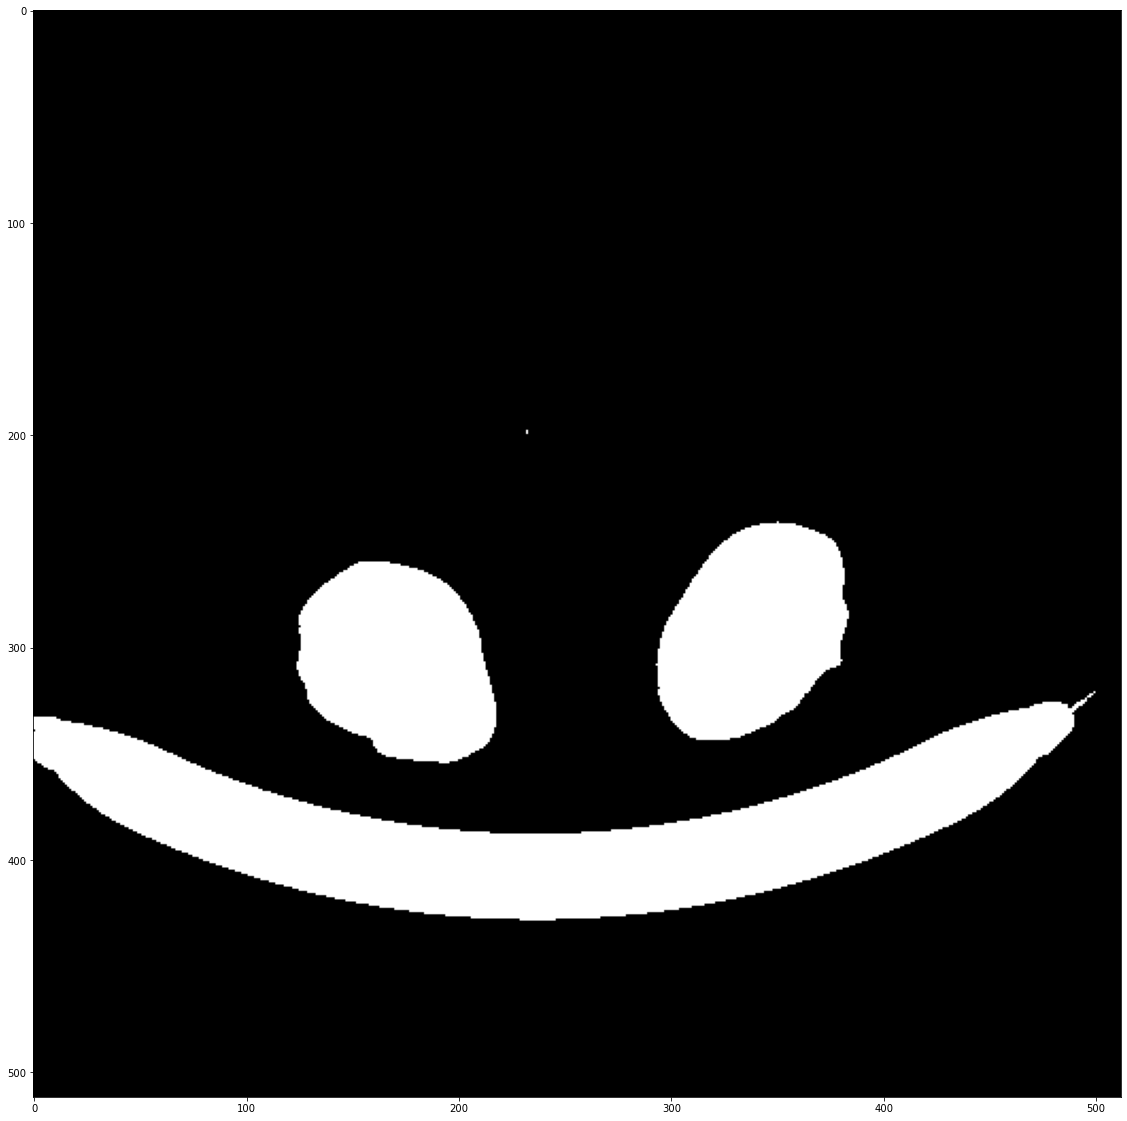

In [116]:
img_list=sorted(glob.glob('../data/img_default/01013843/*.png'))

for ti in range(len(img_list)):
# for ti in range(1):
    
    t_img= imread(img_list[ti], as_gray=True)
    t_img[t_img>0]=255
    
    hole=ndimage.binary_fill_holes(t_img).astype(int)
    
    img_nd[ti]=hole
    
    plt.figure(figsize=(20,20))
    plt.imshow(hole, cmap='gray')
    
print(img_nd.shape)    

In [125]:
import skimage.segmentation

In [129]:
skimage.segmentation.find_boundaries(img_nd[0], mode='outer').astype(np.uint8)

ValueError: Invalid integer data type 'f'.

In [114]:
RemoveUnconnectedSmallObject(img_nd)

TypeError: in method 'ImageSeriesReader_SetFileNames', argument 2 of type 'std::vector< std::string,std::allocator< std::string > > const &'

In [130]:
def grow(img, seed, t):
    """
    img: ndarray, ndim=3
        An image volume.
    
    seed: tuple, len=3
        Region growing starts from this point.
    t: int
        The image neighborhood radius for the inclusion criteria.
    """
    seg = np.zeros(img.shape, dtype=np.bool)
    checked = np.zeros_like(seg)
 
    seg[seed] = True
    checked[seed] = True
    needs_check = get_nbhd(seed, checked, img.shape)
 
    while len(needs_check) > 0:
        pt = needs_check.pop()
 
        # Its possible that the point was already checked and was
        # put in the needs_check stack multiple times.
        if checked[pt]: continue
 
        checked[pt] = True
 
        # Handle borders.
        imin = max(pt[0]-t, 0)
        imax = min(pt[0]+t, img.shape[0]-1)
        jmin = max(pt[1]-t, 0)
        jmax = min(pt[1]+t, img.shape[1]-1)
        kmin = max(pt[2]-t, 0)
        kmax = min(pt[2]+t, img.shape[2]-1)
 
        if img[pt] >= img[imin:imax+1, jmin:jmax+1, kmin:kmax+1].mean():
            # Include the voxel in the segmentation and
            # add its neighbors to be checked.
            seg[pt] = True
            needs_check += get_nbhd(pt, checked, img.shape)
 
    return seg

In [131]:
test= grow(img_nd,(0,250,250),10)

plt.imshow(test)

NameError: name 'get_nbhd' is not defined

In [87]:
import SimpleITK as sitk
import glob
import os
import matplotlib.pyplot as plt


from myshow import myshow, myshow3d
import numpy as np

from  scipy import ndimage

from skimage.io import imread, imshow
from skimage import *
import skimage
# from downloaddata import fetch_data as fdata
import gui

# Using an external viewer (ITK-SNAP or 3D Slicer) we identified a visually appealing window-level setting
T1_WINDOW_LEVEL = (40,400)

In [88]:
dcm_list=glob.glob('../data/dvt/01013843/*.dcm')
img_T1 = sitk.ReadImage(dcm_list)
# Rescale the intensities and map them to [0,255], these are the default values for the output
# We will use this image to display the results of segmentation
img_T1_255 = sitk.Cast(sitk.IntensityWindowing(img_T1, 
                                               windowMinimum=T1_WINDOW_LEVEL[1]-T1_WINDOW_LEVEL[0]/2.0, 
                                               windowMaximum=T1_WINDOW_LEVEL[1]+T1_WINDOW_LEVEL[0]/2.0), 
                       sitk.sitkUInt8)

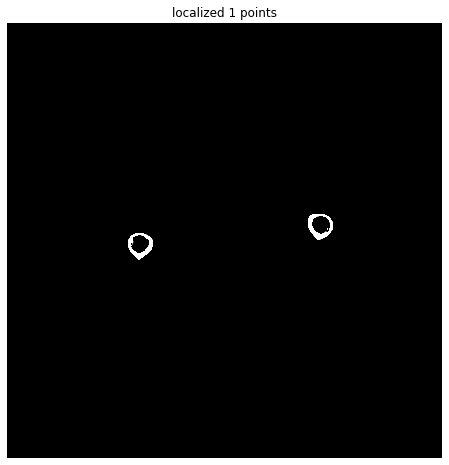

In [90]:
point_acquisition_interface = gui.PointDataAquisition(img_T1, window_level=T1_WINDOW_LEVEL)

#preselected seed point in the left ventricle  
point_acquisition_interface.set_point_indexes([(150,250,127)])

In [92]:
initial_seed_point_indexes=(150,250,127)

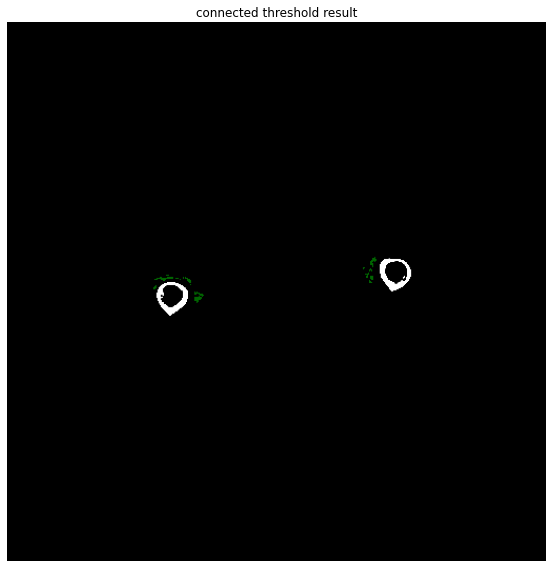

In [95]:
seg_explicit_thresholds = sitk.ConnectedThreshold(img_T1, seedList=[(150,250,127)], lower=50, upper=100)
# Overlay the segmentation onto the T1 image
gui.MultiImageDisplay(image_list = [sitk.LabelOverlay(img_T1_255, seg_explicit_thresholds)],                   
                      title_list = ['connected threshold result'])

In [ ]:
for tm in range(len())
    img = cv2.imread('seg_test.jpg')

    gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray1)
    img1 = img.copy()

    ret, thresh = cv2.threshold(gray1,127,255,0)

    contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))

    x, y, w, h = cv2.boundingRect(contours[0])
    print(x, y, w, h)

    dd=cv2.rectangle(img1,(x,y),(x+w,y+h), (0, 255, 0), 1)
    # for cnt in range(len(contours)):
    #     cv2.drawContours(img1, [contours[cnt]], 0,(255,0,0), 1)

    plt.figure(figsize=(20,20))
    plt.imshow(img1, cmap='gray')